### Depressão e seus fatores determinantes.

A depressão, um transtorno mental que afeta milhões de pessoas em todo o mundo, é caracterizada por sentimentos persistentes de tristeza, perda de interesse e energia, e alterações no sono, apetite e concentração. 
É importante destacar que a depressão não é causada por um único fator, mas sim por uma combinação complexa e individualizada de fatores biológicos, psicológicos e sociais. A influência de cada fator pode variar de pessoa para pessoa, e a vulnerabilidade à depressão pode mudar ao longo da vida.

<center><img alt="depressao" width="30%" src="https://raw.githubusercontent.com/AAndreo/Analise.Case.Depressao/main/Arquivos/depressao.jpg"></center>
<center><a href="https://www.freepik.com/free-vector/flat-illustration-person-with-mental-health-problems_16692683.htm#page=2&query=depression%20symptons&position=11&from_view=search&track=ais&uuid=1d70b88b-cd41-4628-b2dc-2b77662fccc9">Image by pikisuperstar</a> on Freepik</center>

* **Nosso desafio?**
    * Realizar a análise de dados sobre a depressão e seus fatores.
    
* **Qual é o objetivo?**
    * Buscar respostas para as seguintes perguntas:
        * Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?
        * Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

* **Como?**
    * Através da análise descritiva e inferencial dos dados, identificando padrões e tendências relevantes, realizando vários testes de hipóteses que buscam associações significativas entre as variáveis. Com isso conseguiremos uma visão mais completa dos dados, para que possamos interpretar as informações através de evidências, trazendo respostas e sugestões para futuras melhorias.

* ### Obtenção dos dados
Nossos dados foram obtidos atráves do (NHANES) Pesquisa Nacional de Exame de Saúde e Nutrição, que é um estudo abrangente e contínuo realizado pelo Centro Nacional de Estatísticas de Saúde (NCHS) dos Estados Unidos. Entre os vários tópicos que aborda, a NHANES coleta dados sobre a prevalência e os fatores de risco para a depressão na população americana.

* São estas as bases:
    * DEMO_PHQ.csv: banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006. [Disponível aqui.](https://drive.google.com/drive/folders/1__vLmkC9FiFK14DdBfIPyy1CWv1yacph?usp=sharing)
    * PAG_HEI.csv: banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006. [Disponível aqui.](https://drive.google.com/drive/folders/1__vLmkC9FiFK14DdBfIPyy1CWv1yacph?usp=sharing)

In [1259]:
# importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
from scipy.stats import f_oneway, sem, t, ttest_ind, chi2_contingency, norm, contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

* ### Dicionário de Dados

* DEMO_PHQ.csv: Banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006, contendo as seguintes variáveis:
    * SEQN : Identificador único do respondente
    * DPQ010 a DPQ090 : Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:      
        * DPQ010 : Pouco interesse ou pouco prazer em fazer as coisas?
        * DPQ020 : Se sentiu para baixo, deprimido(a) ou sem perspectiva?
        * DPQ030 : Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume?
        * DPQ040 : Se sentiu cansado(a) ou com pouca energia?
        * DPQ050 : Falta de apetite ou comeu demais?
        * DPQ060 : Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)?
        * DPQ070 : Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)?
        * DPQ080 : Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume?
        * DPQ090 : Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?
        * Valores para DPQ010 a DPQ090: 
          * 0 = Nenhuma vez
          * 1 = Menos de uma semana
          * 2 = Uma semana ou mais
          * 3 = Quase todos os dias
          * 7 = Se recusou a responder
          * 9 = Não sabe.
    * RIAGENDR : Gênero
        * Valores: 1 = Masculino, 2 = Feminino
    * RIDAGEYR : Idade em anos
    * RIDRETH1 : Raça/Etnia
        * Valores: 1 = Branco não-hispânico, 2 = Negro não-hispânico, 3 = Mexicano-americano, 4 = Outro, 5 = Outro-Hispânico
    * DMDEDUC : Escolaridade
        * Valores: 1 = Menor que 9o ano, 2 = 9-12o ano, 3 = Ensino médio, 4 = Ensino superior incompleto, 5 = Superior completo ou maior, 7 = Se recusou a responder, 9 = Não sabe.
    * INDFMINC : Renda anual familiar (US$)
        * Valores: 
            * 1 = 0-4999
            * 2 - 5000-9999
            * 3 = 10000-14999
            * 4 = 15000-19999
            * 5 = 20000-24999
            * 6 = 25000-34999
            * 7 = 35000-44999
            * 8 = 45000-54999
            * 9 = 55000-64999
            * 10 = 65000-74999
            * 11 = Maior ou igual a 75000
            * 12 = Maior que 20000
            * 13 = Menor que 20000
            * 77 = Se recusou a responder
            * 99 = Não sabe
            
* PAG_HEI.csv:  Banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006:             
     * PAG_MINW : Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG).
     * ADHERENCE : Grupo de aderência ao Physical Activity Guideline (PAG).
         * Valores: 
             * 1 = Baixo (< 150 min/semana)
             * 2 = Adequado (150-300 min/semana)
             * 3 = Acima (> 300 min/semana)
     * HEI2015C1_TOTALVEG : Healthy Eating Index - Componente 1 - Total de Vegetais
         * Valores: 0-5
     * HEI2015C2_GREEN_AND_BEAN Healthy Eating Index - Componente 2 - Verduras verdeescuras e leguminosas.
         * Valores: 0-5
     * HEI2015C3_TOTALFRUIT Healthy Eating Index - Componente 3 - Frutas totais.
         * Valores: 0-5     
     * HEI2015C4_WHOLEFRUIT Healthy Eating Index - Componente 4 - Frutas in natura.
         * Valores: 0-5     
     * HEI2015C5_WHOLEGRAIN Healthy Eating Index - Componente 5 - Grãos integrais.
         * Valores: 0-5     
     * HEI2015C6_TOTALDAIRY Healthy Eating Index - Componente 6 - Laticínios.
         * Valores: 0-5
     * HEI2015C7_TOTPROT Healthy Eating Index - Componente 7 - Proteínas.
         * Valores: 0-5     
     * HEI2015C8_SEAPLANT_PROT Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais.
         * Valores: 0-5     
     * HEI2015C9_FATTYACID Healthy Eating Index - Componente 9 - Ácido-graxo.
         * Valores: 0-10     
     * HEI2015C10_SODIUM Healthy Eating Index - Componente 10 - Sódio.
         * Valores: 0-10        
     * HEI2015C11_REFINEDGRAIN Healthy Eating Index - Componente 11 - Grãos refinados.
         * Valores: 0-10        
     * HEI2015C12_SFAT Healthy Eating Index - Componente 12 - Gordura saturada.
         * Valores: 0-10        
     * HEI2015C13_ADDSUG Healthy Eating Index - Componente 13 - Açúcares adicionados.
         * Valores: 0-10        
     * HEI2015_TOTAL_SCORE Healthy Eating Index - Escore total
         * Valores: 0-100     

        





* ### Analisando os dados de DEMO_PHQ

In [3]:
# Leitura do arquivo .csv
df_demo_phq =  pd.read_csv('DEMO_PHQ.csv')

In [4]:
# Mostra os 5 primeiros registros
df_demo_phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [5]:
# Tamanho do dataset
print(f'O dataset demo_phq possui {df_demo_phq.shape[0]} registros e {df_demo_phq.shape[1]} colunas.')

O dataset demo_phq possui 5334 registros e 15 colunas.


In [6]:
df_demo_phq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [4]:
# Verifica a existencia de dados nulos
def valores_ausentes(df):
    return df.isna().agg(['sum', lambda x : (x.sum() / df.shape[0]) * 100]).T.rename(columns={'sum':'valores ausentes','<lambda>':'porcentagem'})[df.isna().sum() > 0]

* #### Tratamento de valores ausentes

In [5]:
valores_ausentes(df_demo_phq)

,valores ausentes,porcentagem
DPQ010,498.0,9.336333
DPQ020,498.0,9.336333
DPQ030,498.0,9.336333
DPQ040,498.0,9.336333
DPQ050,498.0,9.336333
DPQ060,498.0,9.336333
DPQ070,498.0,9.336333
DPQ080,498.0,9.336333
DPQ090,498.0,9.336333
INDFMINC,47.0,0.881140


In [6]:
df_demo_phq[df_demo_phq['DPQ010'].isnull()].head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
14,31156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,43,4,4,7.0
20,31172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,20,3,2,3.0
21,31175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,75,4,1,11.0
58,31249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,18,1,3,2.0


In [7]:
df_demo_phq[df_demo_phq['INDFMINC'].isnull()].head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
147,31431,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,20,1,2,NaN
356,31839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,23,1,3,NaN
420,31983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22,1,2,NaN
446,32028,0.0,1.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,2,22,5,5,NaN
474,32085,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,28,1,3,NaN


In [8]:
df_demo_phq.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC'],
      dtype='object')

In [9]:
# Retirando as variáveis com valores ausentes do dataset
df_demo_phq.dropna(subset=['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090'], inplace=True)

In [10]:
# Substituindo os valores nulos de INDFMINC por 77 = Se recusou a responder
df_demo_phq['INDFMINC'] = np.where(df_demo_phq['INDFMINC'].isnull(), 77.0, df_demo_phq['INDFMINC'])

In [11]:
# Tamanho do dataset
print(f'O dataset demo_phq possui {df_demo_phq.shape[0]} registros e {df_demo_phq.shape[1]} colunas.')

O dataset demo_phq possui 4836 registros e 15 colunas.


* Conclusões
    * Podemos observar que o dataset possui valores nulos. No caso das features DPQ010 a DPQ090, que correspondem a respostas dadas na pesquisa, verificamos todas possuem o mesmo número de valores ausentes. Como elas serão usadas para realizar uma classificação do score obtido através da respectiva soma das respostas com valores entre 0 e 3, não é viável a substituição do valor nulo para outro valor especifico, por exemplo 7 = Se recusou a responder, pois não teria efeito na classificação. Dito isso, a abordeagem adotada será por apagar os registros com valores ausentes.
    * No caso da feature INDFMINC : Renda anual familiar (US$), como todas as outras informações estão preenchidas, adotarei por substituir os valores ausentes pelo valor 77 = Se recusou a responder.

In [12]:
df_demo_phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0


* #### Criando novas Features para auxiliar na análise de dados

    * variável DPQ_TOTAL_SCORE, correspondente ao escore do questionário PHQ-9, somando os valores das variáveis DPQ010 a DPQ090.
        * os valores 7 = Se recusou a responder e 9 = Não sabe, serão substituidos por 0, para não haver interferência no resultado total do score.
    * variável DPQ_TOTAL_SCORE_GRP com a classiﬁcação do escore DPQ_TOTAL_SCORE, assumindo os valores:
        * 0 se DPQ_TOTAL_SCORE < 5
        * 1 se 5 <= DPQ_TOTAL_SCORE < 10
        * 2 se  DPQ_TOTAL_SCORE >= 10
    * variável DPQ_TOTAL_SCORE_GRP_CATEGORIA - descrição da classiﬁcação do escore DPQ_TOTAL_SCORE:
        * 0 = sem sintomas
        * 1 = sintomas leves
        * 2 = sintomas moderados a severos
    * variável RIAGENDR_CATEGORIA - Gênero:
        * 1 = Masculino
        * 2 = Feminino
    * variável RIDRETH1_CATEGORIA - Raça/Etnia:
        * 1 = Branco não-hispânico
        * 2 = Negro não-hispânico
        * 3 = Mexicano-americano
        * 4 = Outro
        * 5 = Outro-Hispânico
    * variável DMDEDUC_CATEGORIA - Escolaridade:
        * 1 = Menor que 9o ano
        * 2 = 9-12o ano
        * 3 = Ensino médio
        * 4 = Ensino superior incompleto
        * 5 = Superior completo ou maior
        * 7 = Se recusou a responder
        * 9 = Não sabe
    * variável INDFMINC_FAIXA_RENDA - Renda anual familiar (US$):
        * 1 = 0-4999
        * 2 - 5000-9999
        * 3 = 10000-14999
        * 4 = 15000-19999
        * 5 = 20000-24999
        * 6 = 25000-34999
        * 7 = 35000-44999
        * 8 = 45000-54999
        * 9 = 55000-64999
        * 10 = 65000-74999
        * 11 = Maior ou igual a 75000
        * 12 = Maior que 20000
        * 13 = Menor que 20000
        * 77 = Se recusou a responder
        * 99 = Não sabe

In [13]:
features_dpq = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090']

In [14]:
# Alterando os valores 7 e 9 das features DPQ010 a DPQ090 para 0.
df_demo_phq[features_dpq] = df_demo_phq[features_dpq].replace({7 : 0, 9 : 0})

In [15]:
# Somando os valores das respostas e associando a DPQ_TOTAL_SCORE
df_demo_phq['DPQ_TOTAL_SCORE'] = df_demo_phq[features_dpq].sum(axis=1)

In [16]:
# variável DPQ_TOTAL_SCORE_GRP com a classiﬁcação do escore DPQ_TOTAL_SCORE
# 0 = (“sem sintomas”) se DPQ_TOTAL_SCORE < 5
# 1 = (“sintomas leves”) se 5 <= DPQ_TOTAL_SCORE < 10
# 2 = (“sintomas moderados a severos”) se  DPQ_TOTAL_SCORE >= 10
df_demo_phq['DPQ_TOTAL_SCORE_GRP'] = pd.cut(df_demo_phq['DPQ_TOTAL_SCORE'], bins=[0,4,9,27], labels=[0,1,2], include_lowest=True)

# variável DPQ_TOTAL_SCORE_GRP_CATEGORIA com a descrição da classiﬁcação do escore DPQ_TOTAL_SCORE_GRP:
# {0 : 'sem sintomas', 1 : 'sintomas leves', 2 : 'sintomas moderados a severos'}
df_demo_phq['DPQ_TOTAL_SCORE_GRP_CATEGORIA'] = pd.cut(df_demo_phq['DPQ_TOTAL_SCORE'], bins=[0,4,9,27], labels=['sem sintomas','sintomas leves','sintomas moderados a severos'], include_lowest=True)


In [17]:
# variável RIAGENDR_CATEGORIA - Gênero: com a classificação da variável RIAGENDR => 1 = Masculino, 2 = Feminino
df_demo_phq['RIAGENDR_CATEGORIA'] = pd.cut(df_demo_phq['RIAGENDR'], bins=[0,1,2], labels=['Masculino', 'Feminino'], include_lowest=True)

In [18]:
# variável RIDRETH1_CATEGORIA - Raça/Etnia: com a classificação da variável RIDRETH1
# 1 = Branco não-hispânico
# 2 = Negro não-hispânico
# 3 = Mexicano-americano
# 4 = Outro
# 5 = Outro-Hispânico
df_demo_phq['RIDRETH1_CATEGORIA'] = pd.cut(df_demo_phq['RIDRETH1'], bins=[0,1,2,3,4,5], labels=['Branco não-hispânico','Negro não-hispânico','Mexicano-americano','Outro','Outro-Hispânico'], include_lowest=True)

In [787]:
# variável DMDEDUC_CATEGORIA - Escolaridade: com a classificação da variável DMDEDUC
# 1 = Menor que 9o ano
# 2 = 9-12o ano
# 3 = Ensino médio
# 4 = Ensino superior incompleto
# 5 = Superior completo ou maior
# 9 = Não sabe
df_demo_phq['DMDEDUC_CATEGORIA'] = pd.cut(df_demo_phq['DMDEDUC'], bins=[0,1,2,3,4,5,9], labels=['Menor que 9o ano','9-12o ano','Ensino médio','Ensino superior incompleto','Superior completo ou maior','Não sabe'], include_lowest=True)

In [20]:
# variável INDFMINC_FAIXA_RENDA - Renda anual familiar (US$): com a classficação da variável INDFMINC
# 1 = 0-4999
# 2 - 5000-9999
# 3 = 10000-14999
# 4 = 15000-19999
# 5 = 20000-24999
# 6 = 25000-34999
# 7 = 35000-44999
# 8 = 45000-54999
# 9 = 55000-64999
# 10 = 65000-74999
# 11 = Maior ou igual a 75000
# 12 = Maior que 20000
# 13 = Menor que 20000
# 77 = Se recusou a responder
# 99 = Não sabe
df_demo_phq['INDFMINC_FAIXA_RENDA'] = pd.cut(df_demo_phq['INDFMINC'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,77,99], labels=['0-4999','5000-9999','10000-14999','15000-19999','20000-24999','25000-34999','35000-44999','45000-54999','55000-64999'
                                                                                        ,'65000-74999','Maior ou igual a 75000','Maior que 20000','Menor que 20000','Se recusou a responder','Não sabe'], include_lowest=True)

In [791]:
df_demo_phq

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,RIDRETH1,DMDEDUC,INDFMINC,DPQ_TOTAL_SCORE,DPQ_TOTAL_SCORE_GRP,DPQ_TOTAL_SCORE_GRP_CATEGORIA,RIAGENDR_CATEGORIA,RIDRETH1_CATEGORIA,DMDEDUC_CATEGORIA,INDFMINC_FAIXA_RENDA
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,11.0,0.0,0,sem sintomas,Feminino,Outro,Ensino superior incompleto,Maior ou igual a 75000
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,5,11.0,0.0,0,sem sintomas,Masculino,Mexicano-americano,Superior completo ou maior,Maior ou igual a 75000
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,12.0,0.0,0,sem sintomas,Masculino,Mexicano-americano,Ensino médio,Maior que 20000
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,2,3,11.0,4.0,0,sem sintomas,Feminino,Negro não-hispânico,Ensino médio,Maior ou igual a 75000
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3,4,11.0,6.0,1,sintomas leves,Masculino,Mexicano-americano,Ensino superior incompleto,Maior ou igual a 75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5,2,3.0,2.0,0,sem sintomas,Feminino,Outro-Hispânico,9-12o ano,10000-14999
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,1,1,8.0,10.0,2,sintomas moderados a severos,Feminino,Branco não-hispânico,Menor que 9o ano,45000-54999
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,4,2.0,2.0,0,sem sintomas,Masculino,Outro,Ensino superior incompleto,5000-9999
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,4,7.0,0.0,0,sem sintomas,Masculino,Mexicano-americano,Ensino superior incompleto,35000-44999


* ### Analisando os dados de PAG_HEI

In [23]:
df_pag_hei = pd.read_csv('PAG_HEI.csv')

In [24]:
df_pag_hei.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [25]:
# Tamanho do dataset
print(f'O dataset pag_hei possui {df_pag_hei.shape[0]} registros e {df_pag_hei.shape[1]} colunas.')

O dataset pag_hei possui 9424 registros e 17 colunas.


In [26]:
# informações sobre o dataset
df_pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

* #### Tratamento de valores ausentes

In [27]:
# Verificando valores ausentes
valores_ausentes(df_pag_hei)

,valores ausentes,porcentagem
PAG_MINW,2274.0,24.129881
ADHERENCE,2274.0,24.129881
HEI2015C1_TOTALVEG,875.0,9.284805
HEI2015C2_GREEN_AND_BEAN,875.0,9.284805
HEI2015C3_TOTALFRUIT,875.0,9.284805
HEI2015C4_WHOLEFRUIT,875.0,9.284805
HEI2015C5_WHOLEGRAIN,875.0,9.284805
HEI2015C6_TOTALDAIRY,875.0,9.284805
HEI2015C7_TOTPROT,875.0,9.284805
HEI2015C8_SEAPLANT_PROT,875.0,9.284805


In [28]:
df_pag_hei[df_pag_hei['HEI2015_TOTAL_SCORE'].isnull()].head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31136,713.625866,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,31146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,31188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,31189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Excluindo os registros onde HEI2015_TOTAL_SCORE tem valores nulos
df_pag_hei.dropna(subset=['HEI2015_TOTAL_SCORE'], inplace=True)

In [30]:
valores_ausentes(df_pag_hei)

,valores ausentes,porcentagem
PAG_MINW,1970.0,23.043631
ADHERENCE,1970.0,23.043631


In [31]:
df_pag_hei[df_pag_hei['PAG_MINW'].isnull()].head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
9,31138,NaN,NaN,3.389396,0.000000,5.000000,5.000000,1.558511,5.000000,4.079000,0.000000,7.149274,2.288504,5.801370,7.816354,7.899627,54.982037
11,31140,NaN,NaN,4.104926,5.000000,5.000000,5.000000,1.590798,5.000000,5.000000,0.000000,1.312880,6.917931,10.000000,1.990501,9.248842,60.165878
13,31142,NaN,NaN,1.951101,0.335345,5.000000,5.000000,0.312989,5.000000,4.902750,5.000000,3.686407,6.367837,5.355600,6.820297,7.299180,57.031505
16,31145,NaN,NaN,2.619064,0.000000,5.000000,0.307998,1.175133,3.542894,3.313116,1.966452,5.308435,6.206301,1.074147,8.405634,8.355203,47.274377


In [32]:
# Tamanho do dataset
print(f'O dataset pag_hei possui {df_pag_hei.shape[0]} registros e {df_pag_hei.shape[1]} colunas.')

O dataset pag_hei possui 8549 registros e 17 colunas.


In [33]:
# Substituindo os valores para as features HEI2015_TOTAL_SCORE e PAG_MINW
mediana = np.round(df_pag_hei['PAG_MINW'].median(),6)
df_pag_hei['PAG_MINW'] = df_pag_hei['PAG_MINW'].replace(np.nan, mediana)
df_pag_hei['ADHERENCE'] = df_pag_hei['ADHERENCE'].replace(np.nan, 2)

In [34]:
mediana

263.279446

In [35]:
# Verificando valores ausentes
valores_ausentes(df_pag_hei)

,valores ausentes,porcentagem


* Conclusões
    * Os registros que estão com os valores ausentes na feature HEI2015_TOTAL_SCORE, também estão com todos os valores ausentes nas features que fazem a composição dessa classificação. Portanto a abordagem que adotarei será apagar os registros.
    * AS features PAG_MINW e ADHERENCE apresentam alto percentual de registros com valores ausentes, 23% (1970 registros).
        * Para PAG_MINW vou utilizar a abordagem de substituir os valores nulos pela mediana do conjunto, pois com a presença forte de outliers, essa medida é menos afetada (resistente).
        * Para a feature ADHERENCE, que corresponde a classificação do score, atualizarei para 2 = Adequado (150-300 min/semana), adotando a mediana (263) como valor para PAG_MINW.

* #### Criando novas Features para auxiliar na análise de dados
    * variável ADHERENCE_CATEGORIA Grupo de aderência ao Physical Activity Guideline (PAG)
        * 1 = Baixo (< 150 min/semana)
        * 2 = Adequado (150-300min/semana)
        * 3 = Acima (> 300 min/semana)
    * variável HEI2015_TOTAL_SCORE_GRP - Classificação da variável HEI2015_TOTAL_SCORE -  fonte : [National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6719291/)
        * A = score 90 a 100
        * B = score 80 a 89
        * C = score 70 a 79
        * D = score 60 a 69
        * F = 0 to 59
        

In [36]:
# variável ADHERENCE_CATEGORIA - com a classificação da variável ADHERENCE
# 1 = Baixo (< 150 min/semana)
# 2 = Adequado (150-300min/semana)
# 3 = Acima (> 300 min/semana)
df_pag_hei['ADHERENCE_CATEGORIA'] = pd.cut(df_pag_hei['ADHERENCE'], bins=[0,1,2,3], labels=['Baixo (< 150 min/semana)', 'Adequado (150-300min/semana)', 'Acima (> 300 min/semana)'], include_lowest=True)

In [891]:
# variável HEI2015_TOTAL_SCORE_GRP - Classificação da variável HEI2015_TOTAL_SCORE
# A = score 90 a 100 B = score 80 a 89 C = score 70 a 79 D = score 60 a 69 F = 0 to 59
#df_pag_hei['HEI2015_TOTAL_SCORE_GRP'] = pd.cut(df_pag_hei['HEI2015_TOTAL_SCORE'], bins=[0,59,69,79,89,100], labels=['F','D','C','B','A'], include_lowest=True)
df_pag_hei['HEI2015_TOTAL_SCORE_GRP'] = pd.cut(df_pag_hei['HEI2015_TOTAL_SCORE'], bins=[0,60,70,80,90], labels=['F(0-59)','D(60-69)','C(70-79)','B(80-89)'], include_lowest=True)

In [255]:
df_pag_hei.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,ADHERENCE_CATEGORIA,HEI2015_TOTAL_SCORE_GRP
0,31128,263.279446,2.0,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262,Adequado (150-300min/semana),F(0-59)
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326,Adequado (150-300min/semana),F(0-59)
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,Adequado (150-300min/semana),F(0-59)
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,Acima (> 300 min/semana),D(60-69)
5,31133,0.000000,1.0,1.417400,0.0,2.083333,1.317204,0.000000,3.176179,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653,Baixo (< 150 min/semana),F(0-59)


* ### Combinação dos dois arquivos .csv

In [892]:
df = pd.merge(df_demo_phq, df_pag_hei, on='SEQN', how='inner')

In [893]:
df.to_csv('df_case_depressao.csv')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4737 entries, 0 to 4736
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   SEQN                           4737 non-null   int64   
 1   DPQ010                         4737 non-null   float64 
 2   DPQ020                         4737 non-null   float64 
 3   DPQ030                         4737 non-null   float64 
 4   DPQ040                         4737 non-null   float64 
 5   DPQ050                         4737 non-null   float64 
 6   DPQ060                         4737 non-null   float64 
 7   DPQ070                         4737 non-null   float64 
 8   DPQ080                         4737 non-null   float64 
 9   DPQ090                         4737 non-null   float64 
 10  RIAGENDR                       4737 non-null   int64   
 11  RIDAGEYR                       4737 non-null   int64   
 12  RIDRETH1                       473

In [194]:
# Tamanho do dataset
print(f'O dataset final possui {df.shape[0]} registros e {df.shape[1]} colunas.')

O dataset final possui 4737 registros e 40 colunas.


* ### Análise Exploratória (EDA) Univariada

    * Variáveis numéricas
        * DPQ_TOTAL_SCORE
        * RIDAGEYR 
        * PAG_MINW
        * HEI2015_TOTAL_SCORE 
    * Variáveis categóricas
        * RIAGENDR
        * RIDRETH1
        * DMDEDUC
        * INDFMINC
        * ADHERENCE
        * DPQ_TOTAL_SCORE_GRP
        * DPQ_TOTAL_SCORE_GRP_CATEGORIA

In [195]:
var_numericas = ['DPQ_TOTAL_SCORE','RIDAGEYR','PAG_MINW','HEI2015_TOTAL_SCORE']
var_categoricas = ['RIAGENDR','RIDRETH1','DMDEDUC','INDFMINC','ADHERENCE','DPQ_TOTAL_SCORE_GRP', 'HEI2015_TOTAL_SCORE_GRP']

* #### Variáveis numéricas

In [404]:
# RIDAGEYR : Idade em anos
df['RIDAGEYR'].describe()

count    4737.00000
mean       44.84315
std        19.85118
min        18.00000
25%        27.00000
50%        43.00000
75%        61.00000
max        85.00000
Name: RIDAGEYR, dtype: float64

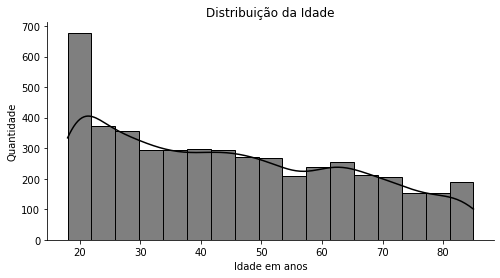

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df['RIDAGEYR'], kde=True, color='black')
plt.xlabel('Idade em anos')
plt.ylabel('Quantidade')
plt.title('Distribuição da Idade')
sns.despine()

Text(0.5, 1.0, 'Distribuição da Idade')

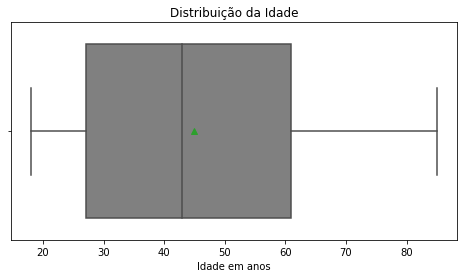

In [406]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='RIDAGEYR', color='gray', showmeans=True)
plt.xlabel('Idade em anos')
plt.title('Distribuição da Idade')

* O que podemos afirmar sobre a idade?
    * A média de idade é de quase 45 anos.
    * A idade mínima é de 18 e a máxima é de 85 anos.
    * O desvio padrão é de 19 anos.
    * Metade das pessoas tem até 43 anos.
    * Existe uma concentração de pessoas na faixa de 20 anos.
    * Temos uma distribuição homogênea dos dados.

In [407]:
# DPQ_TOTAL_SCORE, correspondente ao escore do questionário PHQ-9, somando os valores das variáveis DPQ010 a DPQ090
df['DPQ_TOTAL_SCORE'].describe()

count    4737.000000
mean        2.739920
std         3.743451
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: DPQ_TOTAL_SCORE, dtype: float64

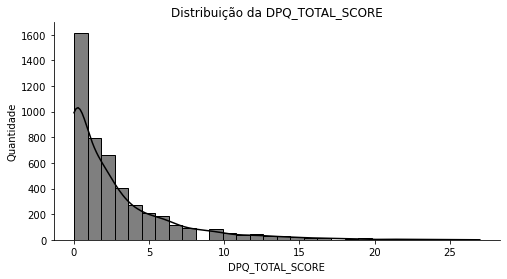

In [408]:
plt.figure(figsize=(8,4))
sns.histplot(df['DPQ_TOTAL_SCORE'],bins=30, kde=True, color='black')
#plt.xlabel('Escolaridade')
plt.ylabel('Quantidade')
plt.title('Distribuição da DPQ_TOTAL_SCORE')
sns.despine()

Text(0.5, 1.0, 'Distribuição da DPQ_TOTAL_SCORE')

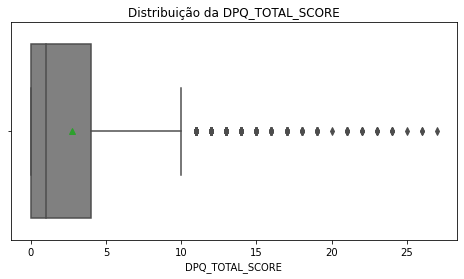

In [409]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='DPQ_TOTAL_SCORE', color='gray', showmeans=True)
plt.title('Distribuição da DPQ_TOTAL_SCORE')

* O que podemos afirmar sobre DPQ_TOTAL_SCORE?
    * Pelo histograma vemos que há uma distribuição dos dados assimétrica a direita.
    * A grande maioria das pessoas possui baixa pontuação, entre 0 e 4, representando 75% do total.
    * Metade das pessoas possuem pontuação entre 0 e 1.
    * A média é de aproximadamente 2,74.
    * A pontuação máxima registrada foi de 27.

In [411]:
# PAG_MINW : Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG).
df['PAG_MINW'].describe()

count     4737.000000
mean       484.863490
std        797.653077
min          0.000000
25%         41.570439
50%        221.709007
75%        581.986143
max      10777.829099
Name: PAG_MINW, dtype: float64

In [412]:
# Variancia
df['PAG_MINW'].var()

636250.4307898883

In [413]:
coef_var =  (df['PAG_MINW'].std()/df['PAG_MINW'].mean())*100
coef_var

164.51085568225847

In [414]:
# Alcance
alcance = df_pag_hei['PAG_MINW'].max() - df_pag_hei['PAG_MINW'].min()
alcance

13801.3856812933

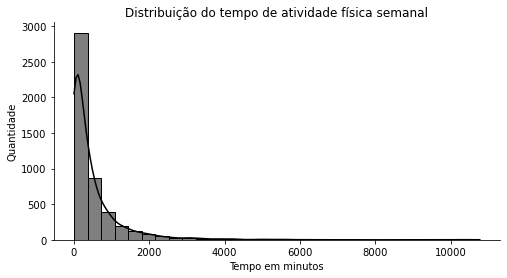

In [415]:
plt.figure(figsize=(8,4))
sns.histplot(df['PAG_MINW'],bins=30, kde=True, color='black')
plt.xlabel('Tempo em minutos')
plt.ylabel('Quantidade')
plt.title('Distribuição do tempo de atividade física semanal')
sns.despine()

Text(0.5, 1.0, 'Distribuição do tempo de atividade física semanal')

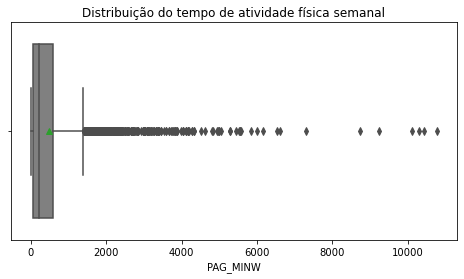

In [416]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='PAG_MINW', color='gray', showmeans=True)
plt.title('Distribuição do tempo de atividade física semanal')

* O que podemos afirmar sobre PAG_MINW?
    * Presença forte de outliers.
        * O maior valor registrado é de 10777 minutos (180 horas) semanais, sendo que a semana possui 10.080 minutos (168 horas). 
    * Pelo histograma vemos uma cauda longa deslocada a direita, monstrando que não é uma distribuição normal e que há poucos valores com Tempo total semanal muito alto.
    * O valor mínimo é 0.
    * 75% dos valores estão abaixo de 581.
    * 50% dos valores (mediana) estão abaixo de 221.
    * O desvio padrão é de quase 797. Isso mostra uma alta dispersão e quão distante os valores estão da média (484) do conjunto.

* #### Tratamento de outliers para PAG_MINW

In [417]:
# Calcular IQR e Limite superior
# IQR => Q3 - Q1
# Limite superior => Q3 + 1.5 * IQR
q3 = df['PAG_MINW'].quantile(.75)
iqr = df['PAG_MINW'].quantile(.75) - df['PAG_MINW'].quantile(.25)
ls = q3 + 1.5 * iqr

In [418]:
print(f'O limite superior para PAG_MINW sem outliers é de: {ls}.')

O limite superior para PAG_MINW sem outliers é de: 1392.6096997690531.


In [420]:
print(f'São {len(df[df["PAG_MINW"] > 1392.6096997690531])} registros com valor acima de {ls:.2f} , representando {(len(df[df["PAG_MINW"] > 1392.6096997690531])/df.shape[0]*100):.2f}% do total de registros no dataset')

São 391 registros com valor acima de 1392.61 , representando 8.25% do total de registros no dataset


In [421]:
df['PAG_MINW'] = np.where(df["PAG_MINW"] > 1392.6096997690531, 1392.6096997690531, df['PAG_MINW'])

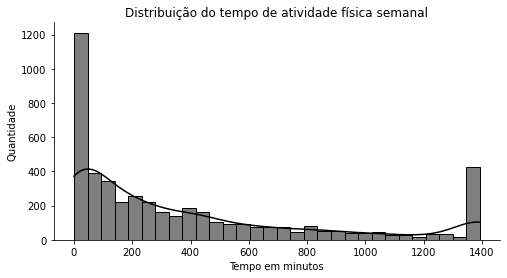

In [422]:
plt.figure(figsize=(8,4))
sns.histplot(df['PAG_MINW'],bins=30, kde=True, color='black')
plt.xlabel('Tempo em minutos')
plt.ylabel('Quantidade')
plt.title('Distribuição do tempo de atividade física semanal')
sns.despine()

Text(0.5, 1.0, 'Distribuição do tempo de atividade física semanal')

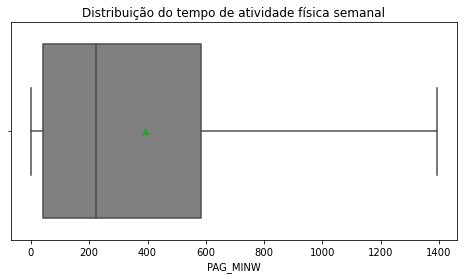

In [423]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='PAG_MINW', color='gray', showmeans=True)
plt.title('Distribuição do tempo de atividade física semanal')

In [424]:
df['PAG_MINW'].describe()

count    4737.000000
mean      391.706371
std       438.062921
min         0.000000
25%        41.570439
50%       221.709007
75%       581.986143
max      1392.609700
Name: PAG_MINW, dtype: float64

In [425]:
coef_var =  (df['PAG_MINW'].std()/df['PAG_MINW'].mean())*100
coef_var

111.83451513320999

O coeficiente de variancia é de 43.9%, ou seja, nosso desvio padrão representa 43.9% da nossa média.

Uma interpretação intuitiva para o desvio padrão é entendê-lo com um uma medida de erro caso aproximarmos (ou estimarmos) todos os valores da série dados pela sua média. Se nos basearmos somente pela média desses dados, entendendo que o desvio padrão é bastante alto, corremos o risco de interpretar mal esse dado. Daí a importancia das medidas que vimos até agora: mediana, moda e o próprio desvio padrão.

* Conclusão
    * Com o tratamento dos outliers, o novo limite superior para PAG_MINW é de 1392.609700.
    * Mesmo após o tratamento dos outliers, podemos verificar que o histograma ainda apresenta uma grande concentração de pessoas que praticam pouco tempo de atividade física semanal.

In [426]:
# HEI2015_TOTAL_SCORE : Índice de Alimentação Saudável
df['HEI2015_TOTAL_SCORE'].describe()

count    4737.000000
mean       49.923931
std        12.342940
min        16.059212
25%        40.929704
50%        49.478433
75%        58.062142
max        89.529383
Name: HEI2015_TOTAL_SCORE, dtype: float64

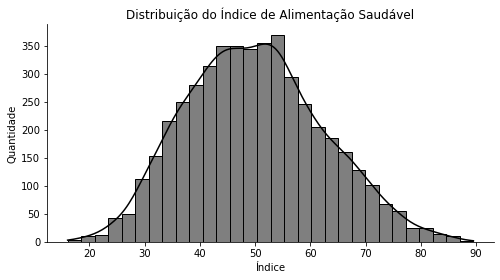

In [427]:
plt.figure(figsize=(8,4))
sns.histplot(df['HEI2015_TOTAL_SCORE'],bins=30, kde=True, color='black')
plt.xlabel('Índice')
plt.ylabel('Quantidade')
plt.title('Distribuição do Índice de Alimentação Saudável')
sns.despine()

Text(0.5, 1.0, 'Distribuição do Índice de Alimentação Saudável')

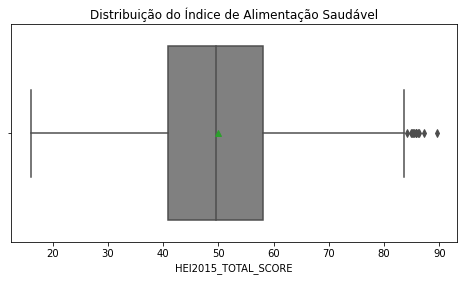

In [428]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='HEI2015_TOTAL_SCORE', color='gray', showmeans=True)
plt.title('Distribuição do Índice de Alimentação Saudável')

In [429]:
coef_var =  (df['HEI2015_TOTAL_SCORE'].std()/df['HEI2015_TOTAL_SCORE'].mean())*100
coef_var

24.72349477910707

* Hipótese
    * A variável HEI2015_TOTAL_SCORE possui uma distribuição dos dados próxima de uma normal?
        * H0 : Não é uma distribuição normal
        * Ha : É uma distribuição normal
        * Significancia (alpha) : 0,05

In [430]:
stats.kstest(df['HEI2015_TOTAL_SCORE'].values, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

* O que podemos afirmar sobre HEI2015_TOTAL_SCORE?
    * O histograma nos mostra que a distribuição dos dados se aproxima de uma normal.
    * Pelo teste KS obtemos o p-valor (0,00) menor que o valor de alpha (0,05). Portanto podemos rejeitar a hipótese nula H0.
    * A média 49.923931 e a mediana (50%) 49.478433 estão bem próximas.
    * O maior indice registrado foi de 89.529383.

* #### Variáveis categóricas

In [69]:
# função para exibir as frequencias das variaveis categoricas
def frequencia_cat(var):
    return var.agg(['value_counts',lambda x : (x.value_counts() / df.shape[0])]).reset_index().rename(columns={'index':var.name,'value_counts':'frequencia', '<lambda>':'frequencia relativa'})

In [70]:
# RIAGENDR : RIAGENDR_CATEGORIA - Gênero: 1 = Masculino 2 = Feminino
genero = frequencia_cat(df['RIAGENDR_CATEGORIA'])
genero

,RIAGENDR_CATEGORIA,frequencia,frequencia relativa
0,Feminino,2457,0.518683
1,Masculino,2280,0.481317


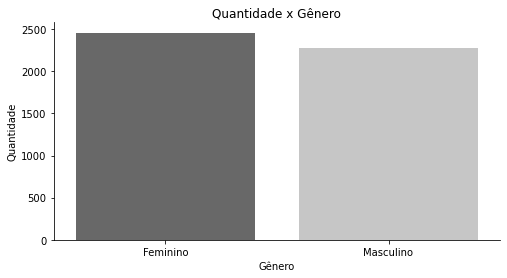

In [72]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='RIAGENDR_CATEGORIA', palette='Greys_r', order=genero['RIAGENDR_CATEGORIA'])
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.title('Quantidade x Gênero')
sns.despine()

* O que podemos afirmar sobre RIAGENDR?
    * As duas categorias estão com os dados balanceados.
    * A diferença entre as duas categorias é somente de 177 registros ou 0,037.

In [71]:
# RIDRETH1 : RIDRETH1_CATEGORIA - Raça/Etnia
etnia = frequencia_cat(df['RIDRETH1_CATEGORIA'])
etnia

,RIDRETH1_CATEGORIA,frequencia,frequencia relativa
0,Mexicano-americano,2297,0.484906
1,Outro,1117,0.235803
2,Branco não-hispânico,998,0.210682
3,Outro-Hispânico,181,0.038210
4,Negro não-hispânico,144,0.030399


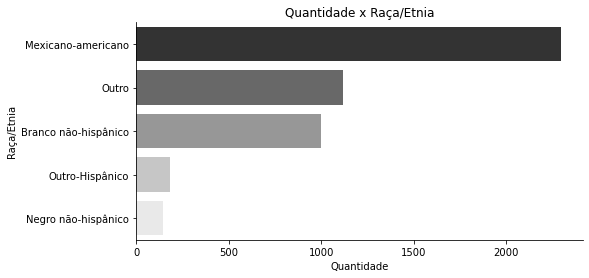

In [73]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='RIDRETH1_CATEGORIA', palette='Greys_r', orient='h', order=etnia['RIDRETH1_CATEGORIA'])
plt.xlabel('Quantidade')
plt.ylabel('Raça/Etnia')
plt.title('Quantidade x Raça/Etnia')
sns.despine()

* O que podemos afirmar sobre RIDRETH1?
    * Os dados estão desbalanceados.
    * A predominância é de pessoas Mexicano-americano, com 2297 registros ou 0,484906 do total.
    * As menores representações ficam entre os Negro não-hispânico e Outro-Hispânico, com somente 330 registros ou 0,068 do total.

In [794]:
# DMDEDUC : DMDEDUC_CATEGORIA - Escolaridade
escolaridade = frequencia_cat(df['DMDEDUC_CATEGORIA'])
escolaridade

,DMDEDUC_CATEGORIA,frequencia,frequencia relativa
0,Ensino superior incompleto,1349,0.284779
1,Ensino médio,1201,0.253536
2,Superior completo ou maior,865,0.182605
3,9-12o ano,816,0.172261
4,Menor que 9o ano,505,0.106608
5,Não sabe,1,0.000211


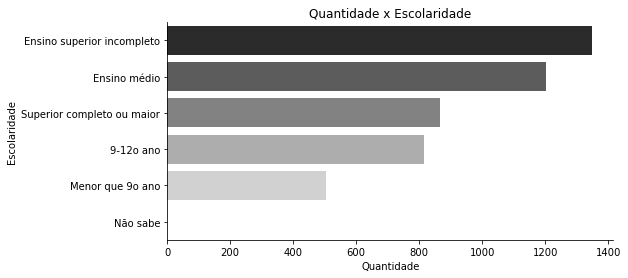

In [795]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='DMDEDUC_CATEGORIA', palette='Greys_r', orient='h', order=escolaridade['DMDEDUC_CATEGORIA'])
plt.xlabel('Quantidade')
plt.ylabel('Escolaridade')
plt.title('Quantidade x Escolaridade')
sns.despine()

* O que podemos afirmar sobre DMDEDUC?
    * A maior parte esta dividida entre pessoas com Ensino Superior incompleto e Ensino médio, com cerca de 53% do total.

In [76]:
# INDFMINC : INDFMINC_FAIXA_RENDA - Renda anual familiar (US$)
renda = frequencia_cat(df['INDFMINC_FAIXA_RENDA'])
renda

,INDFMINC_FAIXA_RENDA,frequencia,frequencia relativa
0,Maior ou igual a 75000,973,0.205404
1,25000-34999,608,0.128351
2,35000-44999,467,0.098586
3,45000-54999,437,0.092252
4,10000-14999,386,0.081486
5,20000-24999,366,0.077264
6,15000-19999,358,0.075575
7,55000-64999,268,0.056576
8,65000-74999,251,0.052987
9,5000-9999,250,0.052776


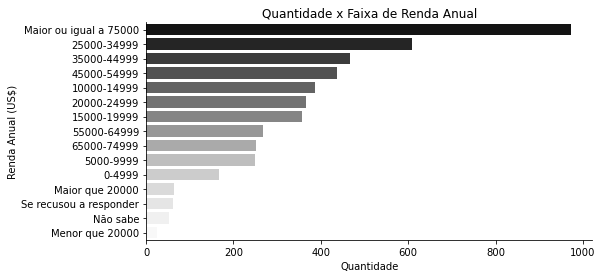

In [77]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='INDFMINC_FAIXA_RENDA', palette='Greys_r', orient='h', order=renda['INDFMINC_FAIXA_RENDA'])
plt.xlabel('Quantidade')
plt.ylabel('Renda Anual (US$)')
plt.title('Quantidade x Faixa de Renda Anual')
sns.despine()

* O que podemos afirmar sobre INDFMINC?
    * Grande parte das pessoas se concentram na faixa de renda anual entre 25.000-34.999 e Maior ou igual a 75.000, cerca de 32% do total.

In [78]:
# ADHERENCE : ADHERENCE_CATEGORIA - Grupo de aderência ao Physical Activity Guideline (PAG).
aderencia = frequencia_cat(df['ADHERENCE_CATEGORIA'])
aderencia

,ADHERENCE_CATEGORIA,frequencia,frequencia relativa
0,Acima (> 300 min/semana),2008,0.423897
1,Baixo (< 150 min/semana),1987,0.419464
2,Adequado (150-300min/semana),742,0.156639


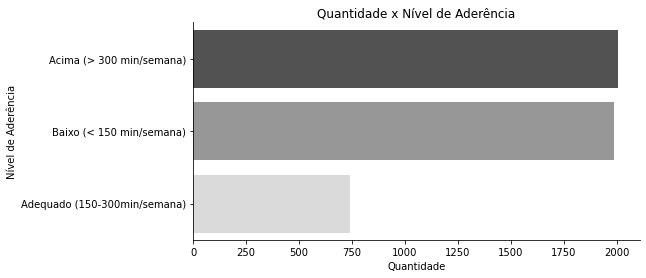

In [79]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='ADHERENCE_CATEGORIA', palette='Greys_r', orient='h', order=aderencia['ADHERENCE_CATEGORIA'])
plt.xlabel('Quantidade')
plt.ylabel('Nível de Aderência')
plt.title('Quantidade x Nível de Aderência')
sns.despine()

* O que podemos afirmar sobre ADHERENCE_CATEGORIA?
    * Cerca de 84% das pessoas estão concentradas no nível de adêrencia acima ou abaixo do adequado.

In [80]:
# DPQ_TOTAL_SCORE_GRP com a classiﬁcação do escore DPQ_TOTAL_SCORE
# DPQ_TOTAL_SCORE_GRP_CATEGORIA com a descrição da classiﬁcação do escore DPQ_TOTAL_SCORE_GRP
score = frequencia_cat(df['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])
score

,DPQ_TOTAL_SCORE_GRP_CATEGORIA,frequencia,frequencia relativa
0,sem sintomas,3749,0.791429
1,sintomas leves,693,0.146295
2,sintomas moderados a severos,295,0.062276


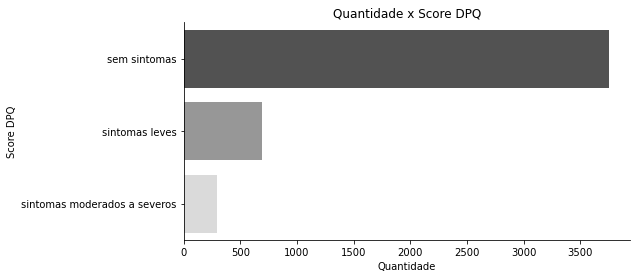

In [81]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='DPQ_TOTAL_SCORE_GRP_CATEGORIA', palette='Greys_r', orient='h', order=score['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])
plt.xlabel('Quantidade')
plt.ylabel('Score DPQ')
plt.title('Quantidade x Score DPQ')
sns.despine()

* O que podemos afirmar sobre DPQ_TOTAL_SCORE_GRP_CATEGORIA?
    * 79% das pessoas (3749 registros) pertencem a categoria "0 - sem sintomas".
    * As pessoas com sintomas moderados a severos são minoria, somente 6% do total.

* ### Análise Exploratória (EDA) Bivariada

* #### Relação entre as variáveis numéricas
    * Nesta etapa vamos levantar as seguintes questões.
        * A features RIDAGEYR (Idade), PAG_MINW (Tempo de atividade física semanal), HEI2015_TOTAL_SCORE (Índice de Alimentação Saudável), tem alguma relação entre si?
        
    * Para responder, iremos utilizar gráficos de dispersão, matriz de correlação e o teste de correlação de Pearson.
        * H0 : p = 0 => Não existe correlação significativa entre as variáveis. 
        * Ha : p &NotEqual; 0 => Existe correlação significativa entre as variáveis.
        * Nível de significância (alpha) : 0,05.

In [443]:
var_numericas

['DPQ_TOTAL_SCORE', 'RIDAGEYR', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']

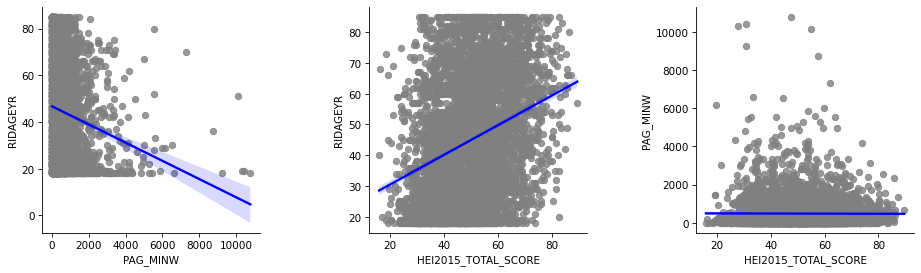

In [393]:
# Criando uma lista de tuplas com a combinação de 2 variáveis 
vars_regplot = ['RIDAGEYR', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']
tupla_cols = []
for i, col in enumerate(vars_regplot):
    cols = vars_regplot[i+1:len(vars_regplot)]
    for col1 in (cols):
        tupla_cols.append((col,col1))

fig, axs = plt.subplots(1, 3, figsize=(15,4),dpi=75)
fig.subplots_adjust(hspace=0.0, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 
for ax, i in zip(axs.flat, range(len(tupla_cols))):
  sns.regplot(x=tupla_cols[i][1], y=tupla_cols[i][0], data=df[var_numericas], line_kws=dict(color="b"), color='gray', ax=ax)
  sns.despine()


In [425]:
df[vars_regplot].corr()

,RIDAGEYR,PAG_MINW,HEI2015_TOTAL_SCORE
RIDAGEYR,1.000000,-0.156373,0.299829
PAG_MINW,-0.156373,1.000000,-0.004841
HEI2015_TOTAL_SCORE,0.299829,-0.004841,1.000000


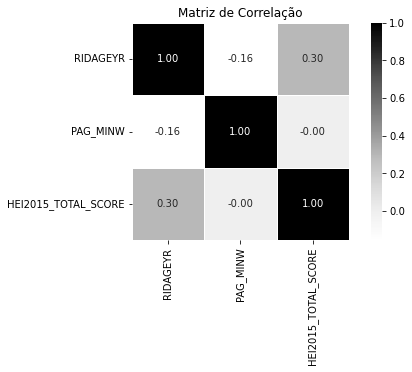

In [394]:
# Plotando o heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[vars_regplot].corr(), annot=True, cmap="Greys", fmt=".2f", square=True, linecolor='white', linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

* #### Realizando o teste de Coeficiente de correlação de Pearson

In [395]:
# Executando o teste de Pearson entre as variaveis numericas
for col in (tupla_cols):
  pearson_coef, p_value = stats.pearsonr(df[col[0]], df[col[1]])
  print(f'Correlação entre {col[0]} e {col[1]}: {pearson_coef:.2f} p_value: {p_value:.30f}')

Correlação entre RIDAGEYR e PAG_MINW: -0.16 p_value: 0.000000000000000000000000002583
Correlação entre RIDAGEYR e HEI2015_TOTAL_SCORE: 0.30 p_value: 0.000000000000000000000000000000
Correlação entre PAG_MINW e HEI2015_TOTAL_SCORE: -0.00 p_value: 0.739081789980458037092603262863


* Conclusões:
    * Correlação entre PAG_MINW (Tempo atividade física) e HEI2015_TOTAL_SCORE (Índice alimentação saudável)
        * o p-valor ficou acima do nível de significância (0,05), portanto não podemos rejeitar a hipótese nula. Não existe relação estatisticamente significativa entre as variáveis.
    * Correlação entre RIDAGEYR (Idade em anos) e PAG_MINW (Tempo atividade física)
    * Correlação entre RIDAGEYR (Idade em anos) e HEI2015_TOTAL_SCORE (Índice alimentação saudável)
        * Todos os p-valor ficaram abaixo do nivel de significância (0,05), portanto podemos rejeitar a hipótese nula e concluir que existe relação estatisticamente significativa entre as variáveis.
        * Porém todos valores dos coeficientes mostram uma correlação muito fraca entre as variáveis.

* #### Relação entre as variáveis categóricas
    * Nesta etapa vamos levantar as seguintes questões.
    * A features 
        * RIAGENDR (Gênero) 
        * RIDRETH1 ( Raça/Etnia)
        * DMDEDUC (Escolaridade)
        * INDFMINC (Renda anual familiar (US$))
        * ADHERENCE (Indice Atividade Aeróbica)
        * DPQ_TOTAL_SCORE_GRP (classiﬁcação do escore DPQ_TOTAL_SCORE) 
        * HEI2015_TOTAL_SCORE_GRP (classificação do escore HEI2015_TOTAL_SCORE), tem alguma associação entre si?
   * Para responder, iremos utilizar gráficos de barras e teste qui-quadrado de independência e Tamanho do efeito Cramér’s V.
       * Hipóteses
           * H0 : São independentes. Não existe uma associação entre as variáveis. 
           * Ha : Não são independentes. Existe uma associação entre as variáveis. 
           * Nível de significância (alpha) : 0,05.
   

In [1408]:
def grpby_2cat(*vars):
    """Função para agrupar as variaveis categoricas de interesse e retornar um dataframe.
    Args: *vars
        var1 : pandas series : variável categórica do dataframe.
        var2 : pandas series : variável categórica do dataframe.        
    """
    var1, var2 = vars
    return df.groupby([var1,var2]).agg(frequencia=(var2.name, lambda x : x.value_counts().sum()), frequencia_relativa=(var2.name , lambda x : (x.value_counts() / df.shape[0]).sum())).replace({np.nan : 0}).reset_index()

In [1409]:
def teste_chi2(*vars_cat):
    """Calcula o teste de hipoteses qui-quadrado - variáveis categóricas Associação : proporção : +2 categorias : 2 amostras.
    Args: *vars_cat
        var1 : pandas series : variável categórica do dataframe.
        var2 : pandas series : variável categórica do dataframe.        
    """
        
    var1, var2 = vars_cat
    table = pd.crosstab(var1, var2)
    alpha = 0.05
    
    print('***** Realizando a teste de hipóteses qui-quadrado *****')
    print('')
    
    # Hipóteses
    print('----- Hipóteses -----')
    print(f'H0 : a variável {var1.name} é independente da variável {var2.name}, não estão associadas.')
    print(f'Ha : a variável {var1.name} não é independente da variável {var2.name}, estão associadas.')
    print('---------------------')
    print('')
        
    # Executando o Teste qui-quadrado
    chi2, p_valor, _, _ = chi2_contingency(table)
    print(f"Valor do teste qui-quadrado: {chi2}")
    print(f"P_valor: {p_valor}")
    print('')
    print('----- Conclusão -----')
    if p_valor < alpha:
        print(f"- p_valor: {p_valor:.10f} < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis {var1.name} e {var2.name}. Elas não são independentes.")
        print(f"- A variável {var1.name} varia de acordo com a variável {var2.name}.")
        print(f"- Tamanho do Efeito - Cramér´s V: {contingency.association(table,method='cramer'):.10f}")        
    else:
        print(f"- p_valor: {p_valor:.10f} > alpha: 0.05 => Não rejeitamos a hipótese nula. Não existe uma associação entre as variáveis {var1.name} e {var2.name}. Elas são independentes.")
        print(f"- A variável {var1.name} não varia de acordo com a variável {var2.name}.")

In [336]:
tupla_cat = []
for i, col in enumerate(var_categoricas):
    cols = var_categoricas[i+1:len(var_categoricas)]
    for col1 in (cols):
        tupla_cat.append((col,col1))
tupla_cat        

[('RIAGENDR', 'RIDRETH1'),
 ('RIAGENDR', 'DMDEDUC'),
 ('RIAGENDR', 'INDFMINC'),
 ('RIAGENDR', 'ADHERENCE'),
 ('RIAGENDR', 'DPQ_TOTAL_SCORE_GRP'),
 ('RIAGENDR', 'HEI2015_TOTAL_SCORE_GRP'),
 ('RIDRETH1', 'DMDEDUC'),
 ('RIDRETH1', 'INDFMINC'),
 ('RIDRETH1', 'ADHERENCE'),
 ('RIDRETH1', 'DPQ_TOTAL_SCORE_GRP'),
 ('RIDRETH1', 'HEI2015_TOTAL_SCORE_GRP'),
 ('DMDEDUC', 'INDFMINC'),
 ('DMDEDUC', 'ADHERENCE'),
 ('DMDEDUC', 'DPQ_TOTAL_SCORE_GRP'),
 ('DMDEDUC', 'HEI2015_TOTAL_SCORE_GRP'),
 ('INDFMINC', 'ADHERENCE'),
 ('INDFMINC', 'DPQ_TOTAL_SCORE_GRP'),
 ('INDFMINC', 'HEI2015_TOTAL_SCORE_GRP'),
 ('ADHERENCE', 'DPQ_TOTAL_SCORE_GRP'),
 ('ADHERENCE', 'HEI2015_TOTAL_SCORE_GRP'),
 ('DPQ_TOTAL_SCORE_GRP', 'HEI2015_TOTAL_SCORE_GRP')]

* #### Verificando associação entre RIAGENDR (Gênero) e DMDEDUC (Escolaridade).

In [796]:
grp_escolaridade_genero = grpby_2cat(df['DMDEDUC_CATEGORIA'],df['RIAGENDR_CATEGORIA'])
grp_escolaridade_genero

,DMDEDUC_CATEGORIA,RIAGENDR_CATEGORIA,frequencia,frequencia_relativa
0,Menor que 9o ano,Masculino,284.0,0.059954
1,Menor que 9o ano,Feminino,221.0,0.046654
2,9-12o ano,Masculino,398.0,0.084019
3,9-12o ano,Feminino,418.0,0.088242
4,Ensino médio,Masculino,575.0,0.121385
5,Ensino médio,Feminino,626.0,0.132151
6,Ensino superior incompleto,Masculino,614.0,0.129618
7,Ensino superior incompleto,Feminino,735.0,0.155161
8,Superior completo ou maior,Masculino,409.0,0.086342
9,Superior completo ou maior,Feminino,456.0,0.096263


Text(0.5, 0.98, 'Escolaridade x Gênero')

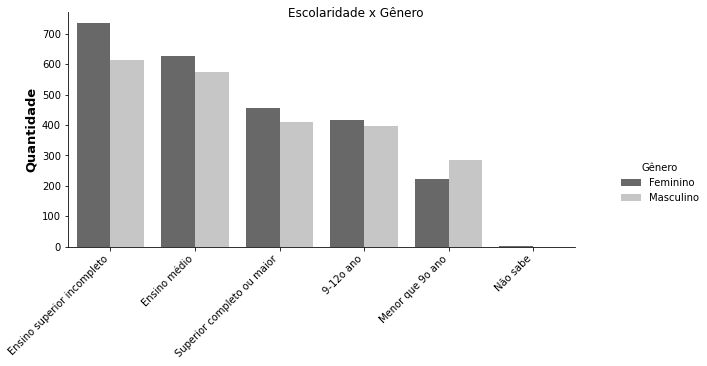

In [797]:
ordem = grp_escolaridade_genero.groupby(['DMDEDUC_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_escolaridade_genero.groupby(['RIAGENDR_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_escolaridade_genero, x='DMDEDUC_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='RIAGENDR_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
#g.set_xlabels('Raça/Etnia', fontsize=13, fontweight='bold')
#g.set_yticklabels(labels='')
#g.set_xticklabels(labels='')
g.set_xlabels('')
g._legend.set_title('Gênero')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Escolaridade x Gênero')

In [798]:
# Teste de associação entre as variaveis
teste_chi2(df['DMDEDUC'], df['RIAGENDR'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DMDEDUC é independente da variável RIAGENDR, não estão associadas.
Ha : a variável DMDEDUC não é independente da variável RIAGENDR, estão associadas.
---------------------

Valor do teste qui-quadrado: 18.33419730760906
P_valor: 0.0025554487609621823

----- Conclusão -----
- p_valor: 0.0025554488 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DMDEDUC e RIAGENDR. Elas não são independentes.
- A variável DMDEDUC varia de acordo com a variável RIAGENDR.
- Tamanho do Efeito - Cramér´s V: 0.0622127298


* #### Verificando associação entre RIAGENDR (Gênero) e INDFMINC (Renda anual familiar (US$).

In [52]:
grp_renda_anual_genero = grpby_2cat(df['INDFMINC_FAIXA_RENDA'], df['RIAGENDR_CATEGORIA'])
grp_renda_anual_genero

,INDFMINC_FAIXA_RENDA,RIAGENDR_CATEGORIA,frequencia,frequencia_relativa
0,0-4999,Masculino,67,0.014144
1,0-4999,Feminino,100,0.021110
2,5000-9999,Masculino,113,0.023855
3,5000-9999,Feminino,137,0.028921
4,10000-14999,Masculino,164,0.034621
5,10000-14999,Feminino,222,0.046865
6,15000-19999,Masculino,172,0.036310
7,15000-19999,Feminino,186,0.039265
8,20000-24999,Masculino,177,0.037365
9,20000-24999,Feminino,189,0.039899


Text(0.5, 0.98, 'Renda anual familiar (US$) x Gênero')

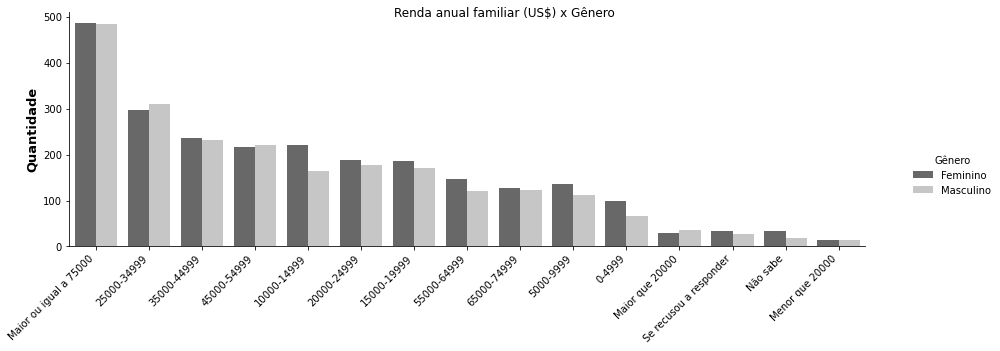

In [239]:
ordem = grp_renda_anual_genero.groupby(['INDFMINC_FAIXA_RENDA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_renda_anual_genero.groupby(['RIAGENDR_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_renda_anual_genero, x='INDFMINC_FAIXA_RENDA', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='RIAGENDR_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
#g.set_xlabels('Raça/Etnia', fontsize=13, fontweight='bold')
#g.set_yticklabels(labels='')
#g.set_xticklabels(labels='')
g.set_xlabels('')
g._legend.set_title('Gênero')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Renda anual familiar (US$) x Gênero')

In [334]:
# Teste de associação entre as variaveis
teste_chi2(df['INDFMINC'], df['RIAGENDR'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável INDFMINC é independente da variável RIAGENDR, não estão associadas.
Ha : a variável INDFMINC não é independente da variável RIAGENDR, estão associadas.
---------------------

Valor do teste qui-quadrado: 20.12538920685519
P_valor: 0.12623749350636912

----- Conclusão -----
- p_valor: 0.1262374935 > alpha: 0.05 => Não rejeitamos a hipótese nula. Não existe uma associação entre as variáveis INDFMINC e RIAGENDR. Elas são independentes.
- A variável INDFMINC não varia de acordo com a variável RIAGENDR.


* #### Verificando associação entre RIAGENDR (Gênero) e ADHERENCE (Atividade Aeróbica).

In [55]:
grp_renda_anual_aderencia_pag = grpby_2cat(df['ADHERENCE_CATEGORIA'], df['RIAGENDR_CATEGORIA'])
grp_renda_anual_aderencia_pag

,ADHERENCE_CATEGORIA,RIAGENDR_CATEGORIA,frequencia,frequencia_relativa
0,Baixo (< 150 min/semana),Masculino,871,0.183872
1,Baixo (< 150 min/semana),Feminino,1116,0.235592
2,Adequado (150-300min/semana),Masculino,335,0.070720
3,Adequado (150-300min/semana),Feminino,407,0.085919
4,Acima (> 300 min/semana),Masculino,1074,0.226726
5,Acima (> 300 min/semana),Feminino,934,0.197171


Text(0.5, 0.98, 'Atividade Aeróbica x Gênero')

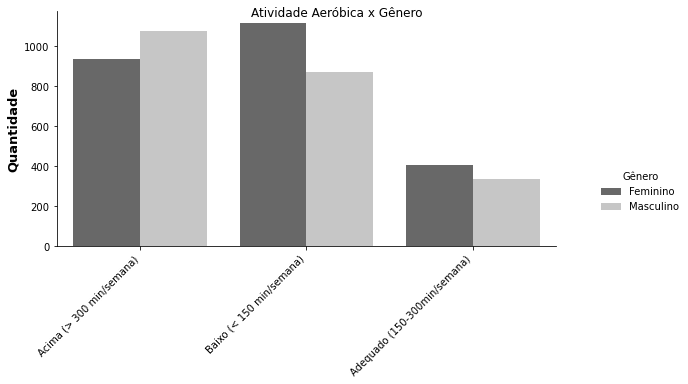

In [237]:
ordem = grp_renda_anual_aderencia_pag.groupby(['ADHERENCE_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_renda_anual_aderencia_pag.groupby(['RIAGENDR_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_renda_anual_aderencia_pag, x='ADHERENCE_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='RIAGENDR_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
#g.set_xlabels('Raça/Etnia', fontsize=13, fontweight='bold')
#g.set_yticklabels(labels='')
#g.set_xticklabels(labels='')
g.set_xlabels('')
g._legend.set_title('Gênero')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Atividade Aeróbica x Gênero')

In [333]:
# Teste de associação entre as variaveis
teste_chi2(df['ADHERENCE'], df['RIAGENDR'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável ADHERENCE é independente da variável RIAGENDR, não estão associadas.
Ha : a variável ADHERENCE não é independente da variável RIAGENDR, estão associadas.
---------------------

Valor do teste qui-quadrado: 40.39906126372318
P_valor: 1.6883221161722022e-09

----- Conclusão -----
- p_valor: 0.0000000017 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis ADHERENCE e RIAGENDR. Elas não são independentes.
- A variável ADHERENCE varia de acordo com a variável RIAGENDR.
- Tamanho do Efeito - Cramér´s V: 0.0923493716


* #### Verificando associação entre RIAGENDR (Gênero) e DPQ_TOTAL_SCORE_GRP (classiﬁcação escore do questionário PHQ-9).

In [91]:
grp_escore_aderencia_pag = grpby_2cat(df['DPQ_TOTAL_SCORE_GRP_CATEGORIA'], df['RIAGENDR_CATEGORIA'])
grp_escore_aderencia_pag

,DPQ_TOTAL_SCORE_GRP_CATEGORIA,RIAGENDR_CATEGORIA,frequencia,frequencia_relativa
0,sem sintomas,Masculino,1888,0.398564
1,sem sintomas,Feminino,1861,0.392865
2,sintomas leves,Masculino,272,0.057420
3,sintomas leves,Feminino,421,0.088875
4,sintomas moderados a severos,Masculino,120,0.025332
5,sintomas moderados a severos,Feminino,175,0.036943


Text(0.5, 0.98, 'Escore do questionário PHQ-9 x Gênero')

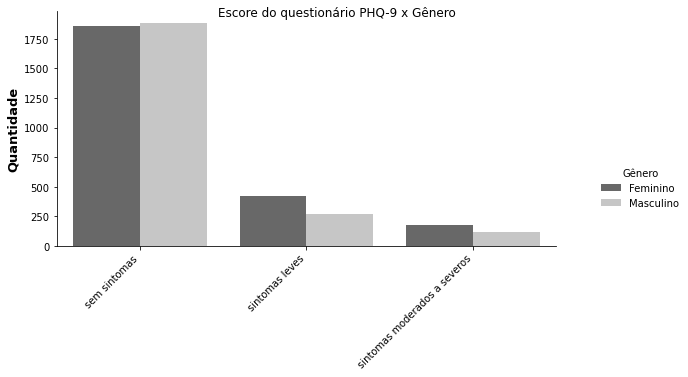

In [236]:
ordem = grp_escore_aderencia_pag.groupby(['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_escore_aderencia_pag.groupby(['RIAGENDR_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_escore_aderencia_pag, x='DPQ_TOTAL_SCORE_GRP_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='RIAGENDR_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Gênero')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Escore do questionário PHQ-9 x Gênero')

In [316]:
# Teste de associação entre as variaveis
teste_chi2(df['DPQ_TOTAL_SCORE_GRP'], df['RIAGENDR'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DPQ_TOTAL_SCORE_GRP é independente da variável RIAGENDR, não estão associadas.
Ha : a variável DPQ_TOTAL_SCORE_GRP não é independente da variável RIAGENDR, estão associadas.
---------------------

Valor do teste qui-quadrado: 35.921236956179065
P_valor: 1.5841726217987697e-08

----- Conclusão -----
- p_valor: 0.0000000158 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DPQ_TOTAL_SCORE_GRP e RIAGENDR. Elas não são independentes.
- A variável DPQ_TOTAL_SCORE_GRP varia de acordo com a variável RIAGENDR.
- Tamanho do Efeito - Cramér´s V: 0.0870811086


* #### Verificando associação entre RIDRETH1 (Raça/Etnia) e DMDEDUC (Escolaridade).

In [799]:
grp_raca_escolaridade = grpby_2cat(df['DMDEDUC_CATEGORIA'], df['RIDRETH1_CATEGORIA'])
grp_raca_escolaridade

,DMDEDUC_CATEGORIA,RIDRETH1_CATEGORIA,frequencia,frequencia_relativa
0,Menor que 9o ano,Branco não-hispânico,307.0,0.064809
1,Menor que 9o ano,Negro não-hispânico,30.0,0.006333
2,Menor que 9o ano,Mexicano-americano,115.0,0.024277
3,Menor que 9o ano,Outro,45.0,0.009500
4,Menor que 9o ano,Outro-Hispânico,8.0,0.001689
5,9-12o ano,Branco não-hispânico,245.0,0.051720
6,9-12o ano,Negro não-hispânico,37.0,0.007811
7,9-12o ano,Mexicano-americano,242.0,0.051087
8,9-12o ano,Outro,274.0,0.057843
9,9-12o ano,Outro-Hispânico,18.0,0.003800


Text(0.5, 0.98, 'Escolaridade x Raça/Etnia')

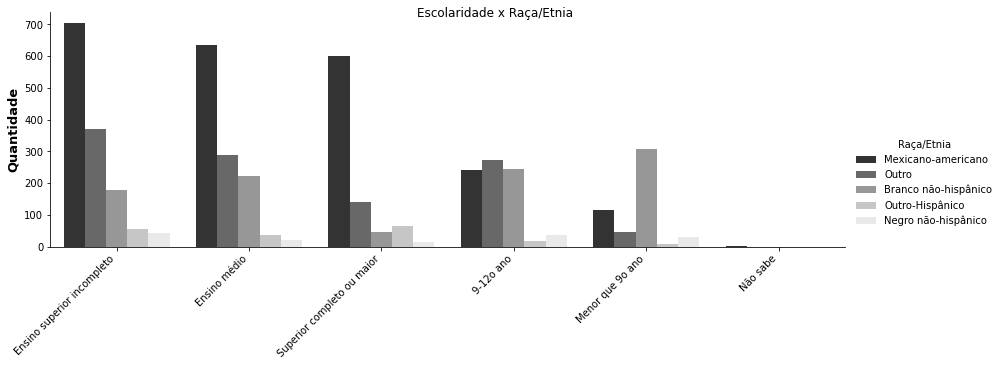

In [800]:
ordem = grp_raca_escolaridade.groupby(['DMDEDUC_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_raca_escolaridade.groupby(['RIDRETH1_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_raca_escolaridade, x='DMDEDUC_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='RIDRETH1_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Raça/Etnia')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Escolaridade x Raça/Etnia')

In [801]:
# Teste de associação entre as variaveis
teste_chi2(df['DMDEDUC'], df['RIDRETH1'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DMDEDUC é independente da variável RIDRETH1, não estão associadas.
Ha : a variável DMDEDUC não é independente da variável RIDRETH1, estão associadas.
---------------------

Valor do teste qui-quadrado: 958.6587039561939
P_valor: 2.5355078154043927e-190

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DMDEDUC e RIDRETH1. Elas não são independentes.
- A variável DMDEDUC varia de acordo com a variável RIDRETH1.
- Tamanho do Efeito - Cramér´s V: 0.2249315220


* #### Verificando associação entre RIDRETH1 (Raça/Etnia) e INDFMINC (Renda anual familiar (US$)).

In [164]:
grp_raca_renda = grpby_2cat(df['INDFMINC_FAIXA_RENDA'], df['RIDRETH1_CATEGORIA'])
grp_raca_renda

,INDFMINC_FAIXA_RENDA,RIDRETH1_CATEGORIA,frequencia,frequencia_relativa
0,0-4999,Branco não-hispânico,31.0,0.006544
1,0-4999,Negro não-hispânico,4.0,0.000844
2,0-4999,Mexicano-americano,40.0,0.008444
3,0-4999,Outro,81.0,0.017099
4,0-4999,Outro-Hispânico,11.0,0.002322
...,...,...,...,...
70,Não sabe,Branco não-hispânico,20.0,0.004222
71,Não sabe,Negro não-hispânico,2.0,0.000422
72,Não sabe,Mexicano-americano,16.0,0.003378
73,Não sabe,Outro,14.0,0.002955


Text(0.5, 0.98, 'Renda x Raça/Etnia')

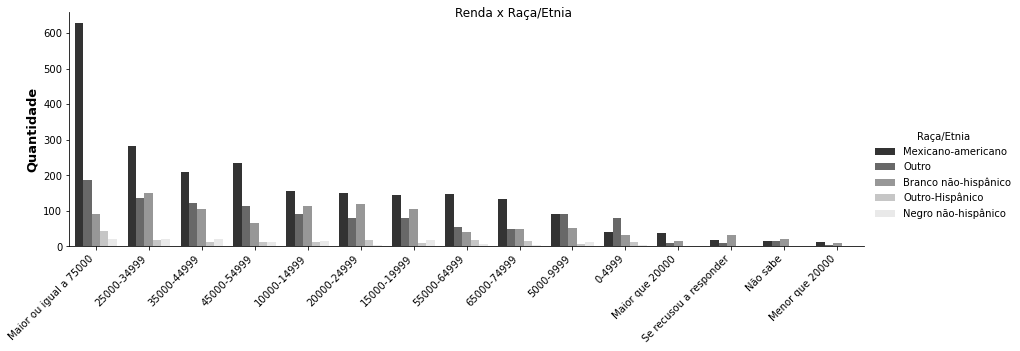

In [235]:
ordem = grp_raca_renda.groupby(['INDFMINC_FAIXA_RENDA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_raca_renda.groupby(['RIDRETH1_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_raca_renda, x='INDFMINC_FAIXA_RENDA', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='RIDRETH1_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Raça/Etnia')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Renda x Raça/Etnia')

In [318]:
# Teste de associação entre as variaveis
teste_chi2(df['INDFMINC'], df['RIDRETH1'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável INDFMINC é independente da variável RIDRETH1, não estão associadas.
Ha : a variável INDFMINC não é independente da variável RIDRETH1, estão associadas.
---------------------

Valor do teste qui-quadrado: 404.3451176348368
P_valor: 2.9989500135431675e-54

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis INDFMINC e RIDRETH1. Elas não são independentes.
- A variável INDFMINC varia de acordo com a variável RIDRETH1.
- Tamanho do Efeito - Cramér´s V: 0.1460812289


* #### Verificando associação entre RIDRETH1 (Raça/Etnia) e ADHERENCE (Atividade Aeróbica).

In [168]:
grp_raca_pag = grpby_2cat(df['ADHERENCE_CATEGORIA'], df['RIDRETH1_CATEGORIA'])
grp_raca_pag

,ADHERENCE_CATEGORIA,RIDRETH1_CATEGORIA,frequencia,frequencia_relativa
0,Baixo (< 150 min/semana),Branco não-hispânico,512,0.108085
1,Baixo (< 150 min/semana),Negro não-hispânico,47,0.009922
2,Baixo (< 150 min/semana),Mexicano-americano,872,0.184083
3,Baixo (< 150 min/semana),Outro,498,0.105130
4,Baixo (< 150 min/semana),Outro-Hispânico,58,0.012244
5,Adequado (150-300min/semana),Branco não-hispânico,153,0.032299
6,Adequado (150-300min/semana),Negro não-hispânico,25,0.005278
7,Adequado (150-300min/semana),Mexicano-americano,371,0.078320
8,Adequado (150-300min/semana),Outro,160,0.033777
9,Adequado (150-300min/semana),Outro-Hispânico,33,0.006966


Text(0.5, 0.98, 'Atividade Aeróbica x Raça/Etnia')

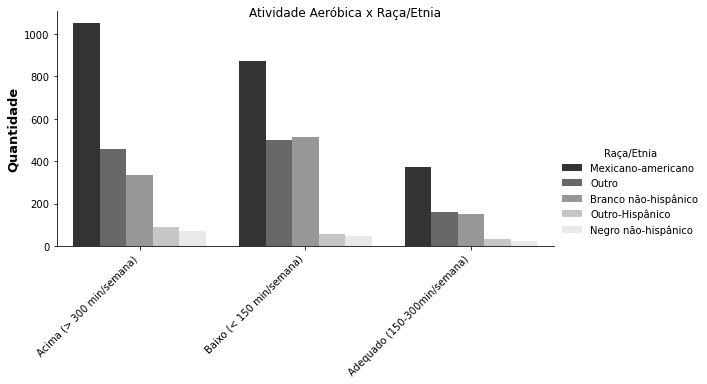

In [231]:
ordem = grp_raca_pag.groupby(['ADHERENCE_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_raca_pag.groupby(['RIDRETH1_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_raca_pag, x='ADHERENCE_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='RIDRETH1_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Raça/Etnia')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Atividade Aeróbica x Raça/Etnia')

In [319]:
# Teste de associação entre as variaveis
teste_chi2(df['ADHERENCE'], df['RIDRETH1'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável ADHERENCE é independente da variável RIDRETH1, não estão associadas.
Ha : a variável ADHERENCE não é independente da variável RIDRETH1, estão associadas.
---------------------

Valor do teste qui-quadrado: 71.80119089608313
P_valor: 2.150262133532247e-12

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis ADHERENCE e RIDRETH1. Elas não são independentes.
- A variável ADHERENCE varia de acordo com a variável RIDRETH1.
- Tamanho do Efeito - Cramér´s V: 0.0870560852


* #### Verificando associação entre RIDRETH1 (Raça/Etnia) e DPQ_TOTAL_SCORE_GRP (classiﬁcação do escore DPQ_TOTAL_SCORE).

In [171]:
grp_raca_dpq_score = grpby_2cat(df['DPQ_TOTAL_SCORE_GRP_CATEGORIA'], df['RIDRETH1_CATEGORIA'])
grp_raca_dpq_score

,DPQ_TOTAL_SCORE_GRP_CATEGORIA,RIDRETH1_CATEGORIA,frequencia,frequencia_relativa
0,sem sintomas,Branco não-hispânico,791,0.166983
1,sem sintomas,Negro não-hispânico,104,0.021955
2,sem sintomas,Mexicano-americano,1844,0.389276
3,sem sintomas,Outro,875,0.184716
4,sem sintomas,Outro-Hispânico,135,0.028499
5,sintomas leves,Branco não-hispânico,142,0.029977
6,sintomas leves,Negro não-hispânico,31,0.006544
7,sintomas leves,Mexicano-americano,334,0.070509
8,sintomas leves,Outro,150,0.031666
9,sintomas leves,Outro-Hispânico,36,0.007600


Text(0.5, 0.98, 'Score DPQ x Raça/Etnia')

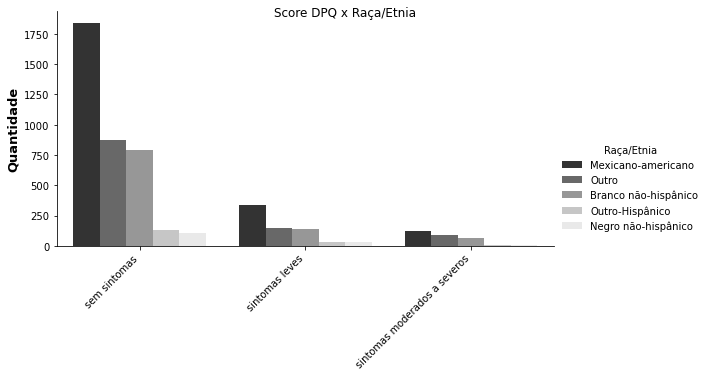

In [230]:
ordem = grp_raca_dpq_score.groupby(['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_raca_dpq_score.groupby(['RIDRETH1_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_raca_dpq_score, x='DPQ_TOTAL_SCORE_GRP_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='RIDRETH1_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Raça/Etnia')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Score DPQ x Raça/Etnia')

In [320]:
# Teste de associação entre as variaveis
teste_chi2(df['DPQ_TOTAL_SCORE_GRP'], df['RIDRETH1'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DPQ_TOTAL_SCORE_GRP é independente da variável RIDRETH1, não estão associadas.
Ha : a variável DPQ_TOTAL_SCORE_GRP não é independente da variável RIDRETH1, estão associadas.
---------------------

Valor do teste qui-quadrado: 22.698937496369975
P_valor: 0.003773062569836905

----- Conclusão -----
- p_valor: 0.0037730626 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DPQ_TOTAL_SCORE_GRP e RIDRETH1. Elas não são independentes.
- A variável DPQ_TOTAL_SCORE_GRP varia de acordo com a variável RIDRETH1.
- Tamanho do Efeito - Cramér´s V: 0.0489481266


* #### Verificando associação entre DMDEDUC (Escolaridade) e ADHERENCE (Atividade Aeróbica).

In [802]:
grp_escolaridade_pag = grpby_2cat(df['ADHERENCE_CATEGORIA'], df['DMDEDUC_CATEGORIA'])
grp_escolaridade_pag

,ADHERENCE_CATEGORIA,DMDEDUC_CATEGORIA,frequencia,frequencia_relativa
0,Baixo (< 150 min/semana),Menor que 9o ano,324.0,0.068398
1,Baixo (< 150 min/semana),9-12o ano,406.0,0.085708
2,Baixo (< 150 min/semana),Ensino médio,522.0,0.110196
3,Baixo (< 150 min/semana),Ensino superior incompleto,486.0,0.102597
4,Baixo (< 150 min/semana),Superior completo ou maior,248.0,0.052354
5,Baixo (< 150 min/semana),Não sabe,1.0,0.000211
6,Adequado (150-300min/semana),Menor que 9o ano,63.0,0.013300
7,Adequado (150-300min/semana),9-12o ano,114.0,0.024066
8,Adequado (150-300min/semana),Ensino médio,174.0,0.036732
9,Adequado (150-300min/semana),Ensino superior incompleto,241.0,0.050876


Text(0.5, 0.98, 'Atividade Aeróbica x Escolaridade')

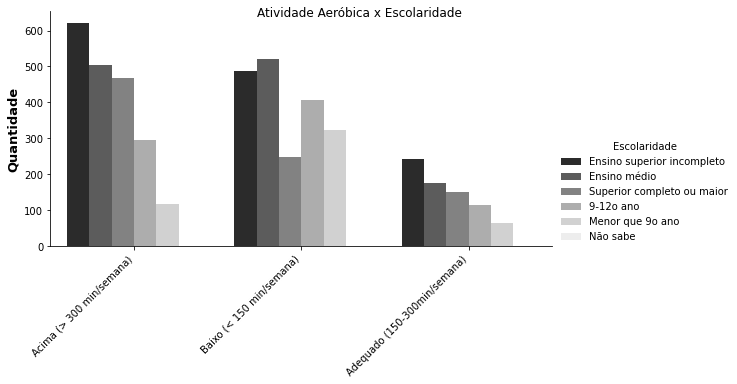

In [803]:
ordem = grp_escolaridade_pag.groupby(['ADHERENCE_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_escolaridade_pag.groupby(['DMDEDUC_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_escolaridade_pag, x='ADHERENCE_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='DMDEDUC_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Escolaridade')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Atividade Aeróbica x Escolaridade')

In [804]:
# Teste de associação entre as variaveis
teste_chi2(df['ADHERENCE'], df['DMDEDUC'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável ADHERENCE é independente da variável DMDEDUC, não estão associadas.
Ha : a variável ADHERENCE não é independente da variável DMDEDUC, estão associadas.
---------------------

Valor do teste qui-quadrado: 214.67288893514643
P_valor: 1.3915097431219661e-40

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis ADHERENCE e DMDEDUC. Elas não são independentes.
- A variável ADHERENCE varia de acordo com a variável DMDEDUC.
- Tamanho do Efeito - Cramér´s V: 0.1505296009


* #### Verificando associação entre DMDEDUC (Escolaridade) e DPQ_TOTAL_SCORE_GRP (classiﬁcação do escore DPQ_TOTAL_SCORE).

In [805]:
grp_escolaridade_dpq = grpby_2cat(df['DPQ_TOTAL_SCORE_GRP_CATEGORIA'], df['DMDEDUC_CATEGORIA'])
grp_escolaridade_dpq

,DPQ_TOTAL_SCORE_GRP_CATEGORIA,DMDEDUC_CATEGORIA,frequencia,frequencia_relativa
0,sem sintomas,Menor que 9o ano,381.0,0.080431
1,sem sintomas,9-12o ano,603.0,0.127296
2,sem sintomas,Ensino médio,942.0,0.198860
3,sem sintomas,Ensino superior incompleto,1071.0,0.226092
4,sem sintomas,Superior completo ou maior,751.0,0.158539
5,sem sintomas,Não sabe,1.0,0.000211
6,sintomas leves,Menor que 9o ano,74.0,0.015622
7,sintomas leves,9-12o ano,149.0,0.031455
8,sintomas leves,Ensino médio,178.0,0.037577
9,sintomas leves,Ensino superior incompleto,197.0,0.041588


Text(0.5, 0.98, ' Score DPQ x Escolaridade')

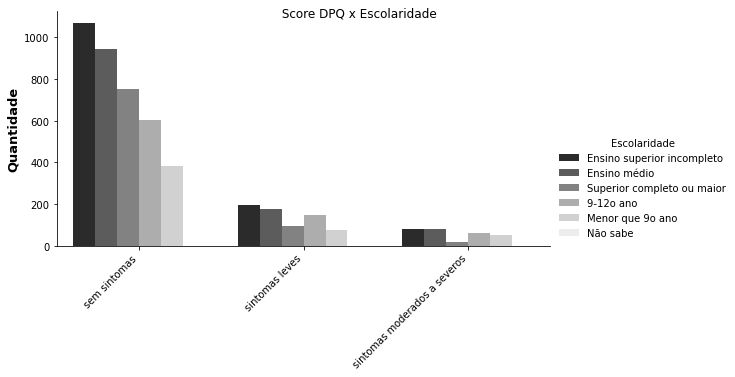

In [806]:
ordem = grp_escolaridade_dpq.groupby(['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_escolaridade_dpq.groupby(['DMDEDUC_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_escolaridade_dpq, x='DPQ_TOTAL_SCORE_GRP_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='DMDEDUC_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Escolaridade')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle(' Score DPQ x Escolaridade')

In [807]:
# Teste de associação entre as variaveis
teste_chi2(df['DPQ_TOTAL_SCORE_GRP'], df['DMDEDUC'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DPQ_TOTAL_SCORE_GRP é independente da variável DMDEDUC, não estão associadas.
Ha : a variável DPQ_TOTAL_SCORE_GRP não é independente da variável DMDEDUC, estão associadas.
---------------------

Valor do teste qui-quadrado: 63.30370415050582
P_valor: 8.545456117852704e-10

----- Conclusão -----
- p_valor: 0.0000000009 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DPQ_TOTAL_SCORE_GRP e DMDEDUC. Elas não são independentes.
- A variável DPQ_TOTAL_SCORE_GRP varia de acordo com a variável DMDEDUC.
- Tamanho do Efeito - Cramér´s V: 0.0817424916


* #### Verificando associação entre INDFMINC (Renda anual familiar (US$)) e ADHERENCE (Atividade Aeróbica).

In [215]:
grp_renda_pag = grpby_2cat(df['ADHERENCE_CATEGORIA'], df['INDFMINC_FAIXA_RENDA'])
grp_renda_pag

,ADHERENCE_CATEGORIA,INDFMINC_FAIXA_RENDA,frequencia,frequencia_relativa
0,Baixo (< 150 min/semana),0-4999,59,0.012455
1,Baixo (< 150 min/semana),5000-9999,121,0.025544
2,Baixo (< 150 min/semana),10000-14999,202,0.042643
3,Baixo (< 150 min/semana),15000-19999,180,0.037999
4,Baixo (< 150 min/semana),20000-24999,179,0.037788
5,Baixo (< 150 min/semana),25000-34999,270,0.056998
6,Baixo (< 150 min/semana),35000-44999,199,0.042010
7,Baixo (< 150 min/semana),45000-54999,157,0.033143
8,Baixo (< 150 min/semana),55000-64999,100,0.021110
9,Baixo (< 150 min/semana),65000-74999,94,0.019844


Text(0.5, 0.98, 'Atividade Aeróbica x Renda')

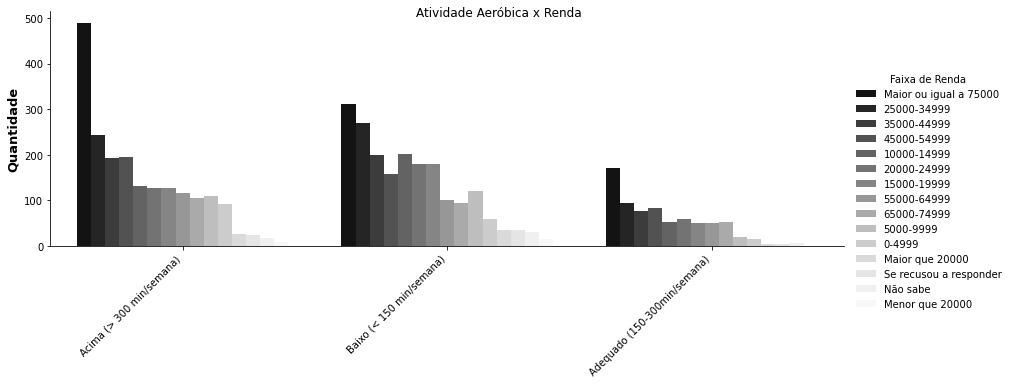

In [220]:
ordem = grp_renda_pag.groupby(['ADHERENCE_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_renda_pag.groupby(['INDFMINC_FAIXA_RENDA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_renda_pag, x='ADHERENCE_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='INDFMINC_FAIXA_RENDA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Faixa de Renda')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Atividade Aeróbica x Renda')

In [323]:
# Teste de associação entre as variaveis
teste_chi2(df['ADHERENCE'], df['INDFMINC'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável ADHERENCE é independente da variável INDFMINC, não estão associadas.
Ha : a variável ADHERENCE não é independente da variável INDFMINC, estão associadas.
---------------------

Valor do teste qui-quadrado: 142.14478404291256
P_valor: 3.144924309439417e-17

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis ADHERENCE e INDFMINC. Elas não são independentes.
- A variável ADHERENCE varia de acordo com a variável INDFMINC.
- Tamanho do Efeito - Cramér´s V: 0.1224894752


* #### Verificando associação entre INDFMINC (Renda anual familiar (US$)) e DPQ_TOTAL_SCORE_GRP (classiﬁcação do escore DPQ_TOTAL_SCORE).

In [241]:
grp_renda_dpq = grpby_2cat(df['DPQ_TOTAL_SCORE_GRP_CATEGORIA'], df['INDFMINC_FAIXA_RENDA'])
grp_renda_dpq

,DPQ_TOTAL_SCORE_GRP_CATEGORIA,INDFMINC_FAIXA_RENDA,frequencia,frequencia_relativa
0,sem sintomas,0-4999,122,0.025755
1,sem sintomas,5000-9999,174,0.036732
2,sem sintomas,10000-14999,266,0.056154
3,sem sintomas,15000-19999,259,0.054676
4,sem sintomas,20000-24999,282,0.059531
5,sem sintomas,25000-34999,498,0.105130
6,sem sintomas,35000-44999,386,0.081486
7,sem sintomas,45000-54999,357,0.075364
8,sem sintomas,55000-64999,224,0.047287
9,sem sintomas,65000-74999,200,0.042221


Text(0.5, 0.98, 'Score DPQ x Renda')

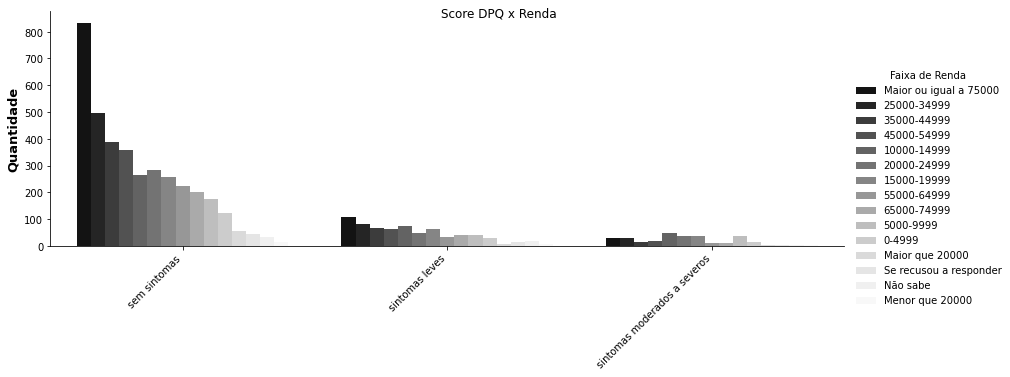

In [242]:
ordem = grp_renda_dpq.groupby(['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_renda_dpq.groupby(['INDFMINC_FAIXA_RENDA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_renda_dpq, x='DPQ_TOTAL_SCORE_GRP_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='INDFMINC_FAIXA_RENDA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Faixa de Renda')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Score DPQ x Renda')

In [324]:
# Teste de associação entre as variaveis
teste_chi2(df['DPQ_TOTAL_SCORE_GRP'], df['INDFMINC'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DPQ_TOTAL_SCORE_GRP é independente da variável INDFMINC, não estão associadas.
Ha : a variável DPQ_TOTAL_SCORE_GRP não é independente da variável INDFMINC, estão associadas.
---------------------

Valor do teste qui-quadrado: 167.3210935853497
P_valor: 8.658151822393324e-22

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DPQ_TOTAL_SCORE_GRP e INDFMINC. Elas não são independentes.
- A variável DPQ_TOTAL_SCORE_GRP varia de acordo com a variável INDFMINC.
- Tamanho do Efeito - Cramér´s V: 0.1328950047


* #### Verificando associação entre ADHERENCE (Atividade aeróbica) e DPQ_TOTAL_SCORE_GRP (classiﬁcação do escore DPQ_TOTAL_SCORE).

In [246]:
grp_aerobica_dpq = grpby_2cat(df['DPQ_TOTAL_SCORE_GRP_CATEGORIA'], df['ADHERENCE_CATEGORIA'])
grp_aerobica_dpq

,DPQ_TOTAL_SCORE_GRP_CATEGORIA,ADHERENCE_CATEGORIA,frequencia,frequencia_relativa
0,sem sintomas,Baixo (< 150 min/semana),1487,0.313912
1,sem sintomas,Adequado (150-300min/semana),604,0.127507
2,sem sintomas,Acima (> 300 min/semana),1658,0.350011
3,sintomas leves,Baixo (< 150 min/semana),321,0.067764
4,sintomas leves,Adequado (150-300min/semana),102,0.021533
5,sintomas leves,Acima (> 300 min/semana),270,0.056998
6,sintomas moderados a severos,Baixo (< 150 min/semana),179,0.037788
7,sintomas moderados a severos,Adequado (150-300min/semana),36,0.007600
8,sintomas moderados a severos,Acima (> 300 min/semana),80,0.016888


Text(0.5, 0.98, 'Score DPQ x Atividade aeróbica')

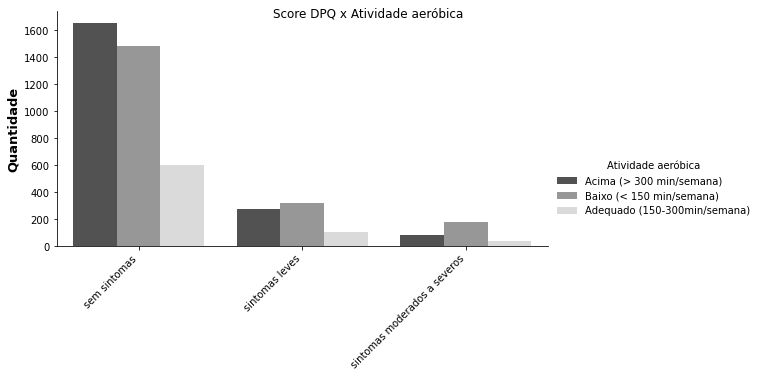

In [248]:
ordem = grp_aerobica_dpq.groupby(['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_aerobica_dpq.groupby(['ADHERENCE_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_aerobica_dpq, x='DPQ_TOTAL_SCORE_GRP_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='ADHERENCE_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Atividade aeróbica')
g.set_xticklabels(rotation=45, ha='right') 
g.fig.suptitle('Score DPQ x Atividade aeróbica')

In [325]:
# Teste de associação entre as variaveis
teste_chi2(df['DPQ_TOTAL_SCORE_GRP'], df['ADHERENCE'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DPQ_TOTAL_SCORE_GRP é independente da variável ADHERENCE, não estão associadas.
Ha : a variável DPQ_TOTAL_SCORE_GRP não é independente da variável ADHERENCE, estão associadas.
---------------------

Valor do teste qui-quadrado: 56.7525838429235
P_valor: 1.3942157255561456e-11

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DPQ_TOTAL_SCORE_GRP e ADHERENCE. Elas não são independentes.
- A variável DPQ_TOTAL_SCORE_GRP varia de acordo com a variável ADHERENCE.
- Tamanho do Efeito - Cramér´s V: 0.0773973568


* #### Verificando associação entre HEI2015_TOTAL_SCORE_GRP (classiﬁcação do escore HEI2015_TOTAL_SCORE - alimentação saudável) e RIDRETH1 (raça/etnia).

In [894]:
grp_alimentacao_etnia = grpby_2cat(df['HEI2015_TOTAL_SCORE_GRP'], df['RIDRETH1_CATEGORIA'])
grp_alimentacao_etnia

,HEI2015_TOTAL_SCORE_GRP,RIDRETH1_CATEGORIA,frequencia,frequencia_relativa
0,F(0-59),Branco não-hispânico,786,0.165928
1,F(0-59),Negro não-hispânico,108,0.022799
2,F(0-59),Mexicano-americano,1770,0.373654
3,F(0-59),Outro,937,0.197805
4,F(0-59),Outro-Hispânico,147,0.031032
5,D(60-69),Branco não-hispânico,163,0.034410
6,D(60-69),Negro não-hispânico,29,0.006122
7,D(60-69),Mexicano-americano,352,0.074309
8,D(60-69),Outro,126,0.026599
9,D(60-69),Outro-Hispânico,23,0.004855


Text(0.5, 0.98, 'Alimentação saudável x Raça/Etnia')

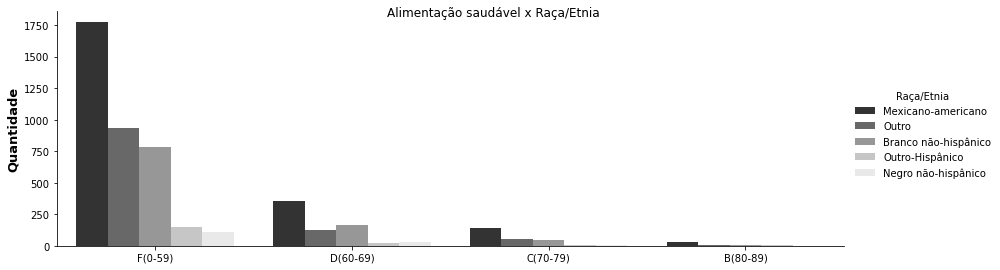

In [895]:
ordem = grp_alimentacao_etnia.groupby(['HEI2015_TOTAL_SCORE_GRP'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_alimentacao_etnia.groupby(['RIDRETH1_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_alimentacao_etnia, x='HEI2015_TOTAL_SCORE_GRP', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='RIDRETH1_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Raça/Etnia')
g.fig.suptitle('Alimentação saudável x Raça/Etnia')

In [896]:
# Teste de associação entre as variaveis
teste_chi2(df['HEI2015_TOTAL_SCORE_GRP'], df['RIDRETH1'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável HEI2015_TOTAL_SCORE_GRP é independente da variável RIDRETH1, não estão associadas.
Ha : a variável HEI2015_TOTAL_SCORE_GRP não é independente da variável RIDRETH1, estão associadas.
---------------------

Valor do teste qui-quadrado: 38.18150503675282
P_valor: 0.0001434121848670452

----- Conclusão -----
- p_valor: 0.0001434122 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis HEI2015_TOTAL_SCORE_GRP e RIDRETH1. Elas não são independentes.
- A variável HEI2015_TOTAL_SCORE_GRP varia de acordo com a variável RIDRETH1.
- Tamanho do Efeito - Cramér´s V: 0.0518339376


* #### Verificando associação entre HEI2015_TOTAL_SCORE_GRP (classiﬁcação do escore HEI2015_TOTAL_SCORE - alimentação saudável) e RIAGENDR (Gênero).

In [897]:
grp_alimentacao_genero = grpby_2cat(df['HEI2015_TOTAL_SCORE_GRP'], df['RIAGENDR_CATEGORIA'])
grp_alimentacao_genero

,HEI2015_TOTAL_SCORE_GRP,RIAGENDR_CATEGORIA,frequencia,frequencia_relativa
0,F(0-59),Masculino,1866,0.393920
1,F(0-59),Feminino,1882,0.397298
2,D(60-69),Masculino,304,0.064176
3,D(60-69),Feminino,389,0.082119
4,C(70-79),Masculino,95,0.020055
5,C(70-79),Feminino,155,0.032721
6,B(80-89),Masculino,15,0.003167
7,B(80-89),Feminino,31,0.006544


Text(0.5, 0.98, 'Alimentação saudável x Gênero')

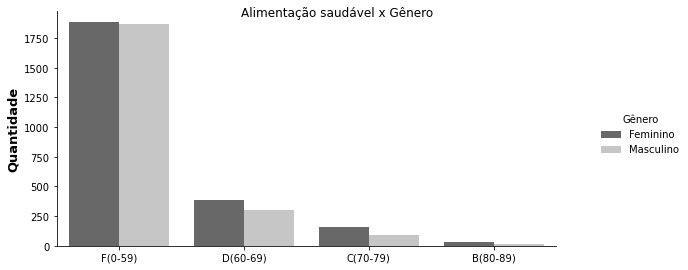

In [898]:
ordem = grp_alimentacao_genero.groupby(['HEI2015_TOTAL_SCORE_GRP'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_alimentacao_genero.groupby(['RIAGENDR_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_alimentacao_genero, x='HEI2015_TOTAL_SCORE_GRP', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='RIAGENDR_CATEGORIA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Gênero')
g.fig.suptitle('Alimentação saudável x Gênero')

In [899]:
# Teste de associação entre as variaveis
teste_chi2(df['HEI2015_TOTAL_SCORE_GRP'], df['RIAGENDR'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável HEI2015_TOTAL_SCORE_GRP é independente da variável RIAGENDR, não estão associadas.
Ha : a variável HEI2015_TOTAL_SCORE_GRP não é independente da variável RIAGENDR, estão associadas.
---------------------

Valor do teste qui-quadrado: 23.878865435694756
P_valor: 2.647764047658813e-05

----- Conclusão -----
- p_valor: 0.0000264776 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis HEI2015_TOTAL_SCORE_GRP e RIAGENDR. Elas não são independentes.
- A variável HEI2015_TOTAL_SCORE_GRP varia de acordo com a variável RIAGENDR.
- Tamanho do Efeito - Cramér´s V: 0.0709994773


* #### Verificando associação entre HEI2015_TOTAL_SCORE_GRP (classiﬁcação do escore HEI2015_TOTAL_SCORE - alimentação saudável) e DPQ_TOTAL_SCORE_GRP (classificação dpq09).

In [900]:
grp_alimentacao_dpq = grpby_2cat(df['DPQ_TOTAL_SCORE_GRP_CATEGORIA'], df['HEI2015_TOTAL_SCORE_GRP'])
grp_alimentacao_dpq

,DPQ_TOTAL_SCORE_GRP_CATEGORIA,HEI2015_TOTAL_SCORE_GRP,frequencia,frequencia_relativa
0,sem sintomas,F(0-59),2930,0.618535
1,sem sintomas,D(60-69),567,0.119696
2,sem sintomas,C(70-79),213,0.044965
3,sem sintomas,B(80-89),39,0.008233
4,sintomas leves,F(0-59),568,0.119907
5,sintomas leves,D(60-69),91,0.019210
6,sintomas leves,C(70-79),28,0.005911
7,sintomas leves,B(80-89),6,0.001267
8,sintomas moderados a severos,F(0-59),250,0.052776
9,sintomas moderados a severos,D(60-69),35,0.007389


Text(0.5, 0.98, 'DPQ score x Alimentação saudável HEI')

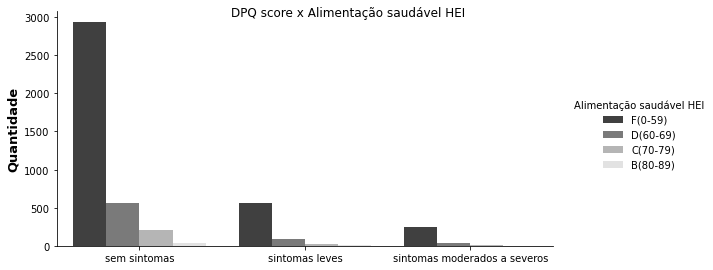

In [901]:
ordem = grp_alimentacao_dpq.groupby(['DPQ_TOTAL_SCORE_GRP_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_alimentacao_dpq.groupby(['HEI2015_TOTAL_SCORE_GRP'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_alimentacao_dpq, x='DPQ_TOTAL_SCORE_GRP_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='HEI2015_TOTAL_SCORE_GRP', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Alimentação saudável HEI')
g.fig.suptitle('DPQ score x Alimentação saudável HEI')

In [902]:
# Teste de associação entre as variaveis
teste_chi2(df['DPQ_TOTAL_SCORE_GRP'], df['HEI2015_TOTAL_SCORE_GRP'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DPQ_TOTAL_SCORE_GRP é independente da variável HEI2015_TOTAL_SCORE_GRP, não estão associadas.
Ha : a variável DPQ_TOTAL_SCORE_GRP não é independente da variável HEI2015_TOTAL_SCORE_GRP, estão associadas.
---------------------

Valor do teste qui-quadrado: 12.979544280023644
P_valor: 0.04336193780822523

----- Conclusão -----
- p_valor: 0.0433619378 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DPQ_TOTAL_SCORE_GRP e HEI2015_TOTAL_SCORE_GRP. Elas não são independentes.
- A variável DPQ_TOTAL_SCORE_GRP varia de acordo com a variável HEI2015_TOTAL_SCORE_GRP.
- Tamanho do Efeito - Cramér´s V: 0.0370137453


* #### Verificando associação entre HEI2015_TOTAL_SCORE_GRP (classiﬁcação do escore HEI2015_TOTAL_SCORE - alimentação saudável) e ADHERENCE (Atividade aeróbica).

In [903]:
grp_alimentacao_atividade = grpby_2cat(df['ADHERENCE_CATEGORIA'], df['HEI2015_TOTAL_SCORE_GRP'])
grp_alimentacao_atividade

,ADHERENCE_CATEGORIA,HEI2015_TOTAL_SCORE_GRP,frequencia,frequencia_relativa
0,Baixo (< 150 min/semana),F(0-59),1612,0.340300
1,Baixo (< 150 min/semana),D(60-69),287,0.060587
2,Baixo (< 150 min/semana),C(70-79),83,0.017522
3,Baixo (< 150 min/semana),B(80-89),5,0.001056
4,Adequado (150-300min/semana),F(0-59),589,0.124340
5,Adequado (150-300min/semana),D(60-69),107,0.022588
6,Adequado (150-300min/semana),C(70-79),39,0.008233
7,Adequado (150-300min/semana),B(80-89),7,0.001478
8,Acima (> 300 min/semana),F(0-59),1547,0.326578
9,Acima (> 300 min/semana),D(60-69),299,0.063120


Text(0.5, 0.98, 'Atividade aeróbica x Alimentação saudável HEI')

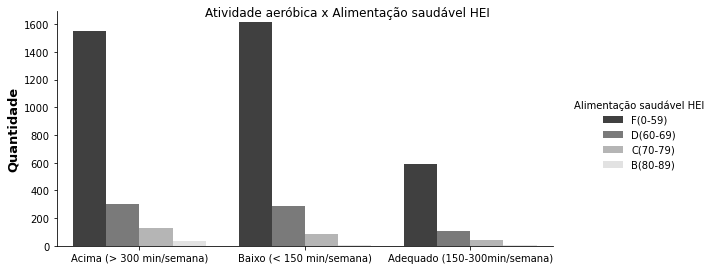

In [904]:
ordem = grp_alimentacao_atividade.groupby(['ADHERENCE_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_alimentacao_atividade.groupby(['HEI2015_TOTAL_SCORE_GRP'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_alimentacao_atividade, x='ADHERENCE_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=2, palette='Greys_r', hue='HEI2015_TOTAL_SCORE_GRP', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Alimentação saudável HEI')
g.fig.suptitle('Atividade aeróbica x Alimentação saudável HEI')

In [905]:
# Teste de associação entre as variaveis
teste_chi2(df['ADHERENCE'], df['HEI2015_TOTAL_SCORE_GRP'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável ADHERENCE é independente da variável HEI2015_TOTAL_SCORE_GRP, não estão associadas.
Ha : a variável ADHERENCE não é independente da variável HEI2015_TOTAL_SCORE_GRP, estão associadas.
---------------------

Valor do teste qui-quadrado: 32.79493536697689
P_valor: 1.1482722062338865e-05

----- Conclusão -----
- p_valor: 0.0000114827 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis ADHERENCE e HEI2015_TOTAL_SCORE_GRP. Elas não são independentes.
- A variável ADHERENCE varia de acordo com a variável HEI2015_TOTAL_SCORE_GRP.
- Tamanho do Efeito - Cramér´s V: 0.0588351276


* #### Verificando associação entre HEI2015_TOTAL_SCORE_GRP (classiﬁcação do escore HEI2015_TOTAL_SCORE - alimentação saudável) e INDFMINC (Renda anual).

In [906]:
grp_alimentacao_renda = grpby_2cat(df['HEI2015_TOTAL_SCORE_GRP'], df['INDFMINC_FAIXA_RENDA'])
grp_alimentacao_renda

,HEI2015_TOTAL_SCORE_GRP,INDFMINC_FAIXA_RENDA,frequencia,frequencia_relativa
0,F(0-59),0-4999,151.0,0.031877
1,F(0-59),5000-9999,202.0,0.042643
2,F(0-59),10000-14999,312.0,0.065864
3,F(0-59),15000-19999,294.0,0.062065
4,F(0-59),20000-24999,290.0,0.061220
5,F(0-59),25000-34999,495.0,0.104497
6,F(0-59),35000-44999,391.0,0.082542
7,F(0-59),45000-54999,341.0,0.071986
8,F(0-59),55000-64999,215.0,0.045387
9,F(0-59),65000-74999,205.0,0.043276


Text(0.5, 0.98, 'Alimentação saudável x Renda')

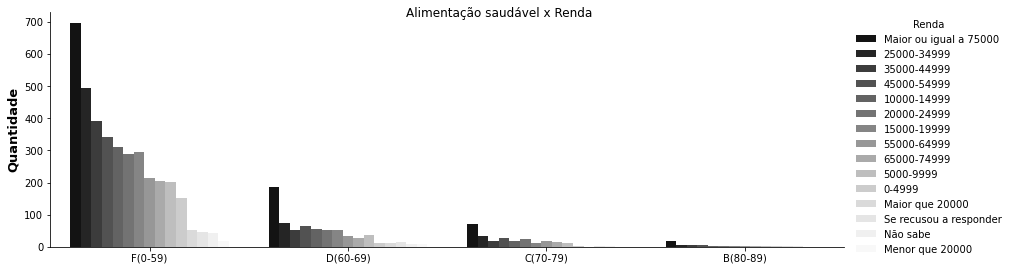

In [907]:
ordem = grp_alimentacao_renda.groupby(['HEI2015_TOTAL_SCORE_GRP'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_alimentacao_renda.groupby(['INDFMINC_FAIXA_RENDA'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_alimentacao_renda, x='HEI2015_TOTAL_SCORE_GRP', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='INDFMINC_FAIXA_RENDA', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Renda')
g.fig.suptitle('Alimentação saudável x Renda')

In [908]:
# Teste de associação entre as variaveis
teste_chi2(df['HEI2015_TOTAL_SCORE_GRP'], df['INDFMINC'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável HEI2015_TOTAL_SCORE_GRP é independente da variável INDFMINC, não estão associadas.
Ha : a variável HEI2015_TOTAL_SCORE_GRP não é independente da variável INDFMINC, estão associadas.
---------------------

Valor do teste qui-quadrado: 96.21838433254928
P_valor: 3.876851910204441e-06

----- Conclusão -----
- p_valor: 0.0000038769 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis HEI2015_TOTAL_SCORE_GRP e INDFMINC. Elas não são independentes.
- A variável HEI2015_TOTAL_SCORE_GRP varia de acordo com a variável INDFMINC.
- Tamanho do Efeito - Cramér´s V: 0.0822842491


* #### Verificando associação entre HEI2015_TOTAL_SCORE_GRP (classiﬁcação do escore HEI2015_TOTAL_SCORE - alimentação saudável) e DMDEDUC (Escolaridade).

In [911]:
grp_alimentacao_escolaridade = grpby_2cat(df['DMDEDUC_CATEGORIA'],df['HEI2015_TOTAL_SCORE_GRP'])
grp_alimentacao_escolaridade

,DMDEDUC_CATEGORIA,HEI2015_TOTAL_SCORE_GRP,frequencia,frequencia_relativa
0,Menor que 9o ano,F(0-59),375.0,0.079164
1,Menor que 9o ano,D(60-69),98.0,0.020688
2,Menor que 9o ano,C(70-79),27.0,0.005700
3,Menor que 9o ano,B(80-89),5.0,0.001056
4,9-12o ano,F(0-59),702.0,0.148195
5,9-12o ano,D(60-69),86.0,0.018155
6,9-12o ano,C(70-79),25.0,0.005278
7,9-12o ano,B(80-89),3.0,0.000633
8,Ensino médio,F(0-59),1011.0,0.213426
9,Ensino médio,D(60-69),132.0,0.027866


Text(0.5, 0.98, 'Escolaridade x Alimentação saudável')

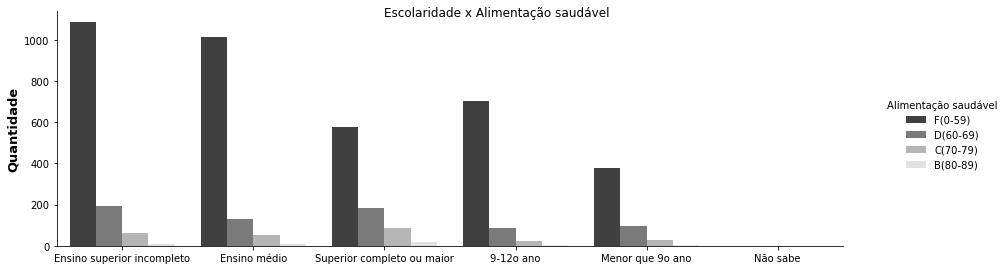

In [914]:
ordem = grp_alimentacao_escolaridade.groupby(['DMDEDUC_CATEGORIA'])['frequencia'].sum().sort_values(ascending=False).index.values
hue_ordem = grp_alimentacao_escolaridade.groupby(['HEI2015_TOTAL_SCORE_GRP'])['frequencia'].sum().sort_values(ascending=False).index.values
g = sns.catplot(data=grp_alimentacao_escolaridade, x='DMDEDUC_CATEGORIA', y='frequencia',kind='bar', height=4, aspect=3, palette='Greys_r', hue='HEI2015_TOTAL_SCORE_GRP', order=ordem, hue_order=hue_ordem)
g.set_ylabels('Quantidade', fontsize=13, fontweight='bold')
g.set_xlabels('')
g._legend.set_title('Alimentação saudável')
g.fig.suptitle('Escolaridade x Alimentação saudável')

In [915]:
# Teste de associação entre as variaveis
teste_chi2( df['DMDEDUC'], df['HEI2015_TOTAL_SCORE_GRP'])

***** Realizando a teste de hipóteses qui-quadrado *****

----- Hipóteses -----
H0 : a variável DMDEDUC é independente da variável HEI2015_TOTAL_SCORE_GRP, não estão associadas.
Ha : a variável DMDEDUC não é independente da variável HEI2015_TOTAL_SCORE_GRP, estão associadas.
---------------------

Valor do teste qui-quadrado: 148.47002278727354
P_valor: 4.854763729303501e-24

----- Conclusão -----
- p_valor: 0.0000000000 < alpha: 0.05 => Rejeitamos a hipótese nula. Existe uma associação entre as variáveis DMDEDUC e HEI2015_TOTAL_SCORE_GRP. Elas não são independentes.
- A variável DMDEDUC varia de acordo com a variável HEI2015_TOTAL_SCORE_GRP.
- Tamanho do Efeito - Cramér´s V: 0.1022132195


* #### Resumo da associação entre as variáveis categóricas
    * A variável DMDEDUC (escolaridade) 
        * varia de acordo com a variável RIAGENDR (gênero). Tamanho do efeito observado muito fraco.
        * varia de acordo com a variável RIDRETH1 (raça/etnia). Tamanho do efeito observado moderado.
        * varia de acordo com a variável HEI2015_TOTAL_SCORE_GRP (classificação alimentação saudável). Tamanho do efeito observado fraco.
    * A variável INDFMINC (renda anual) 
        * não varia de acordo com a variável RIAGENDR (gênero).
        * varia de acordo com a variável RIDRETH1 (raça/etnia). Tamanho do efeito observado fraco.
    * A variável ADHERENCE (atividade aeróbica) 
        * varia de acordo com a variável RIAGENDR (gênero).Tamanho do efeito observado muito fraco.    
        * varia de acordo com a variável RIDRETH1 (raça/etnia). Tamanho do efeito observado muito fraco.    
        * varia de acordo com a variável DMDEDUC (escolaridade). Tamanho do efeito observado fraco.     
        * varia de acordo com a variável INDFMINC (renda anual). Tamanho do efeito observado fraco.        
    * A variável DPQ_TOTAL_SCORE_GRP (classificação do escore PHQ-9) 
        * varia de acordo com a variável RIAGENDR (gênero). Tamanho do efeito observado muito fraco.    
        * varia de acordo com a variável RIDRETH1 (raça/etnia). Tamanho do efeito observado muito fraco.   
        * varia de acordo com a variável DMDEDUC (escolaridade). Tamanho do efeito observado muito fraco.  
        * varia de acordo com a variável INDFMINC (renda anual). Tamanho do efeito observado fraco.        
        * varia de acordo com a variável ADHERENCE (atividade aeróbica). Tamanho do efeito observado muito fraco.   
        * varia de acordo com a variável HEI2015_TOTAL_SCORE_GRP (classificação alimentação saudável). Tamanho do efeito observado muito fraco.        
    * A variável HEI2015_TOTAL_SCORE_GRP (classificação alimentação saudável) 
        * varia de acordo com a variável INDFMINC (renda anual). Tamanho do efeito observado muito fraco.
        * varia de acordo com a variável HEI2015_TOTAL_SCORE_GRP (classificação alimentação saudável). Tamanho do efeito observado muito fraco.  
        * varia de acordo com a variável RIAGENDR (gênero). Tamanho do efeito observado muito fraco.
        * varia de acordo com a variável RIDRETH1 (raça/etnia). Tamanho do efeito observado muito fraco.        
        
        
* Com essas informações iniciais já podemos fazer algumas observações sobre a variável DPQ_TOTAL_SCORE_GRP, que é a classificação do índice de depressão sobre o escore total do questionário PHQ-9, somando as variáveis DPQ010 a DPQ090.
    * Indices de depressão tem associação significativa com alimentação saudável e atividade aeróbica semanal, apesar do efeito observado ser bem pequeno.
    * A renda anual familiar também se mostra um fator associado.
        
        
        
        
        
        

In [268]:
df['HEI2015_TOTAL_SCORE'].describe()

count    4737.000000
mean       49.923931
std        12.342940
min        16.059212
25%        40.929704
50%        49.478433
75%        58.062142
max        89.529383
Name: HEI2015_TOTAL_SCORE, dtype: float64

* #### Relação entre variáveis numéricas e variáveis categóricas

In [919]:
varn = ['RIDAGEYR', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']

In [920]:
varc = ['RIAGENDR_CATEGORIA', 'RIDRETH1_CATEGORIA', 'DMDEDUC_CATEGORIA', 'INDFMINC_FAIXA_RENDA', 'ADHERENCE_CATEGORIA', 'DPQ_TOTAL_SCORE_GRP_CATEGORIA']

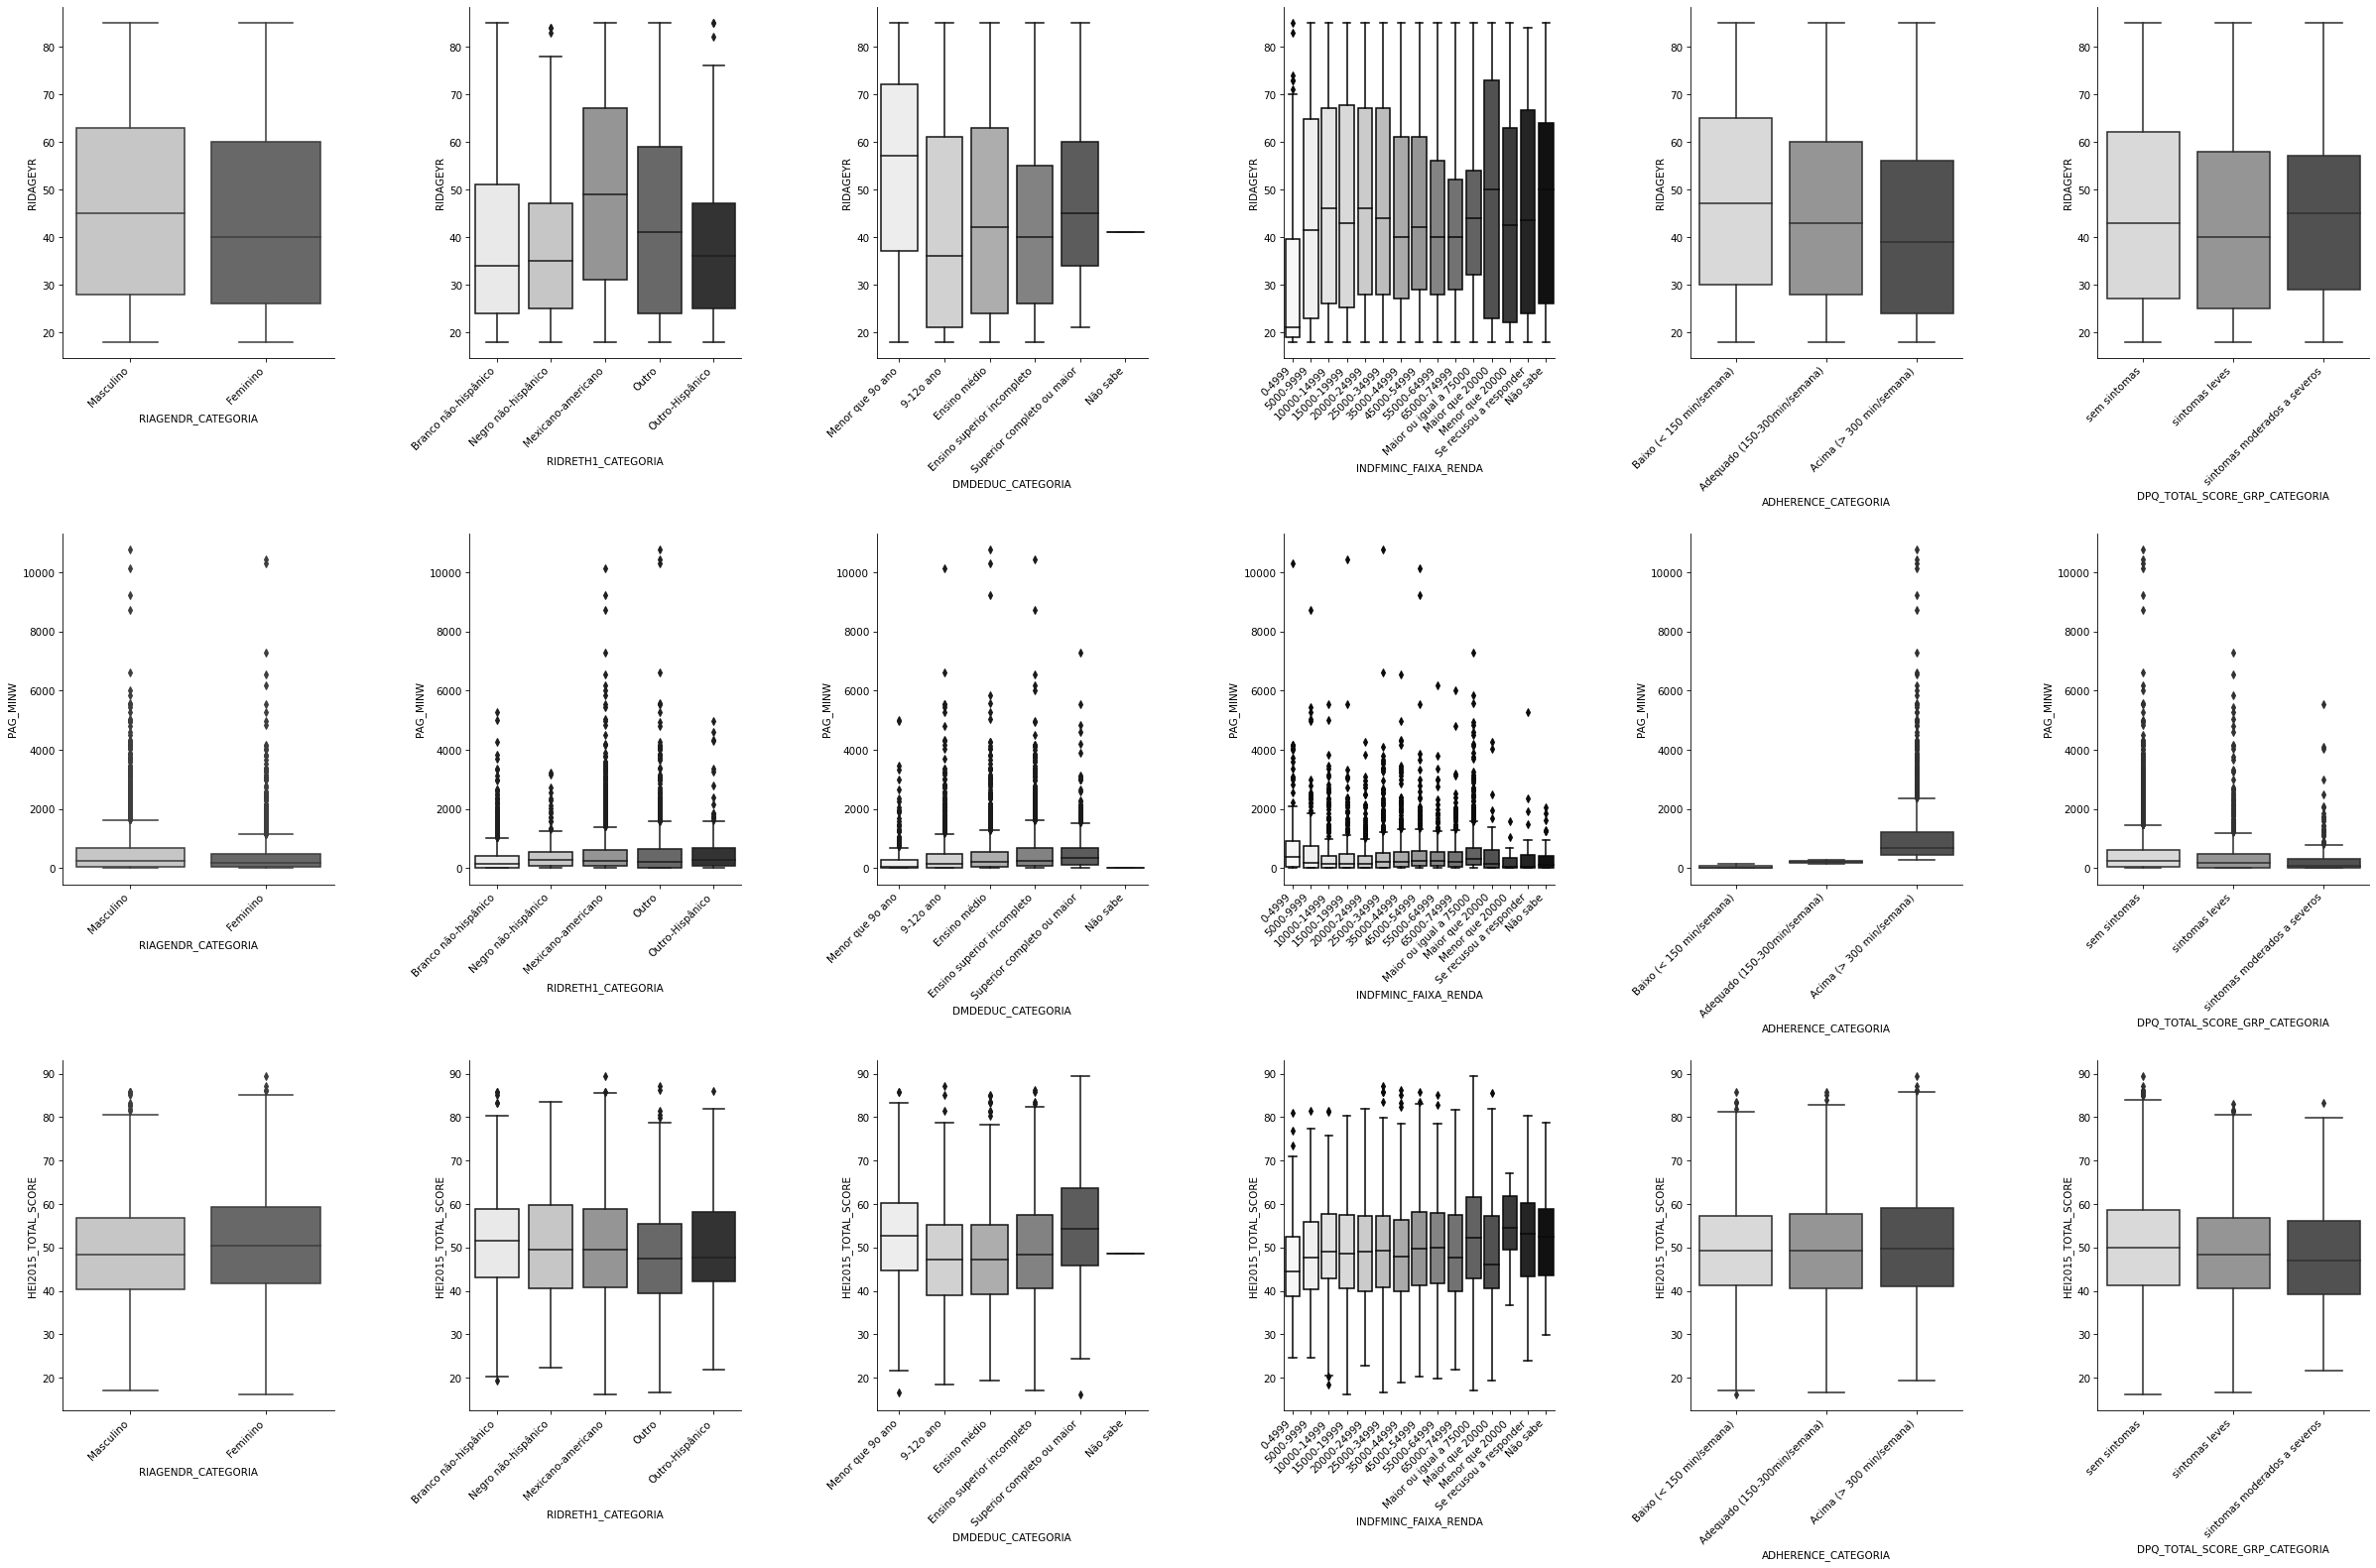

In [921]:
# Criando uma lista de tuplas com a combinação de 2 variáveis 
tupla_boxplot = []
for n in (varn):
    for c in (varc):
        tupla_boxplot.append((n,c))

fig, axs = plt.subplots(len(varn), len(varc), figsize=(40,25),dpi=75)
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 
for ax, i in zip(axs.flat, range(len(tupla_boxplot))):
  sns.boxplot(x=tupla_boxplot[i][1], y=tupla_boxplot[i][0], data=df, palette='Greys', ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
  sns.despine()

* Observando os gráficos acima, conseguiriamos responder a algumas hipóteses?
    * A média de idade é superior para pessoas com sintomas moderados a severos de depressão?
    * Existe diferença entre a média do índice de alimentação saudável de mulheres e homens?
    * Pessoas sem sintomas de depressão tem uma média superior de atividade física semanal?
* Praticamente em todos os gráficos, os grupos se sobrepõem, fato que dificulta muito obtermos as repostas. Para isso teremos que realizar testes de hipóteses para diferença entre médias, para comprovarmos com certeza essas questões.

* #### Relação entre a variável dependente (alvo) DPQ_TOTAL_SCORE e as variáveis independentes.

* #### Variáveis numéricas

* Para responder, iremos utilizar gráficos de dispersão, matriz de correlação e o teste de correlação de Pearson.
    * H0 : p = 0 => Não existe correlação significativa entre as variáveis. 
    * Ha : p &NotEqual; 0 => Existe correlação significativa entre as variáveis.
    * Nível de significância (alpha) : 0,05.

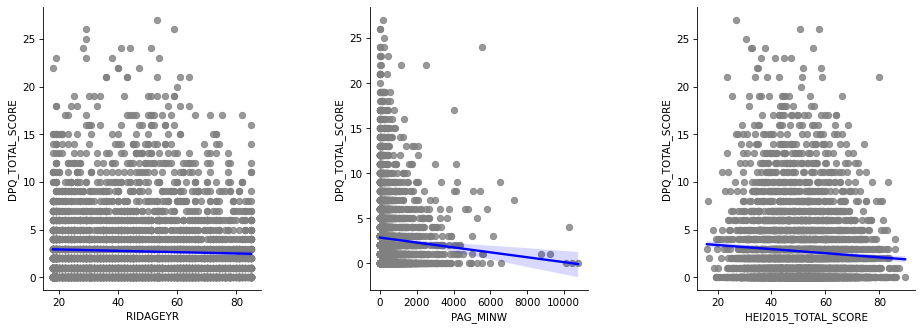

In [917]:
# Criando uma lista de tuplas com a combinação de 2 variáveis 
vars = ['RIDAGEYR', 'PAG_MINW', 'HEI2015_TOTAL_SCORE']
tupla_cols = []
col = 'DPQ_TOTAL_SCORE'
for col1 in (vars):
    tupla_cols.append((col,col1))

fig, axs = plt.subplots(1, len(vars), figsize=(15,5),dpi=75)
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 
for ax, i in zip(axs.flat, range(len(tupla_cols))):
  sns.regplot(x=tupla_cols[i][1], y=tupla_cols[i][0], data=df[var_numericas], line_kws=dict(color="b"), color='gray', ax=ax)
  sns.despine()


In [427]:
df[var_numericas].corr()['DPQ_TOTAL_SCORE']

DPQ_TOTAL_SCORE        1.000000
RIDAGEYR              -0.037373
PAG_MINW              -0.058016
HEI2015_TOTAL_SCORE   -0.070768
Name: DPQ_TOTAL_SCORE, dtype: float64

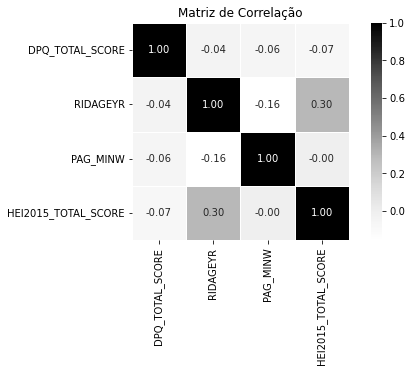

In [432]:
# Plotando o heatmap
data = df[var_numericas].corr()['DPQ_TOTAL_SCORE'].to_frame
plt.figure(figsize=(8, 4))
sns.heatmap(df[var_numericas].corr(), annot=True, cmap="Greys", fmt=".2f", square=True, linecolor='white', linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

* #### Realizando o teste de Coeficiente de correlação de Pearson

In [433]:
# Executando o teste de Pearson entre as variaveis numericas
for col in (tupla_cols):
  pearson_coef, p_value = stats.pearsonr(df[col[0]], df[col[1]])
  print(f'Correlação entre {col[0]} e {col[1]}: {pearson_coef:.2f} p_value: {p_value:.30f}')

Correlação entre DPQ_TOTAL_SCORE e RIDAGEYR: -0.04 p_value: 0.010097390089120068454309198103
Correlação entre DPQ_TOTAL_SCORE e PAG_MINW: -0.06 p_value: 0.000064603480667398100563067476
Correlação entre DPQ_TOTAL_SCORE e HEI2015_TOTAL_SCORE: -0.07 p_value: 0.000001085532371276234839455976


* Conclusões:
    * Os gráficos de dispersão e matriz de correlação, mostram uma correlação negativa entre alvo e variáveis independentes, sendo comprovado pelos valores dos coeficientes.
    * Todos os p-valor ficaram abaixo do nivel de significância (0,05), portanto podemos rejeitar a hipótese nula e concluir que existe relação estatisticamente significativa entre as variáveis.
    * Porém todos valores dos coeficientes mostram uma correlação muito fraca entre as variáveis.

* #### Variáveis categóricas

In [815]:
varn = ['DPQ_TOTAL_SCORE']
varc = ['RIAGENDR_CATEGORIA', 'RIDRETH1_CATEGORIA', 'DMDEDUC_CATEGORIA', 'INDFMINC_FAIXA_RENDA', 'ADHERENCE_CATEGORIA', 'HEI2015_TOTAL_SCORE_GRP']

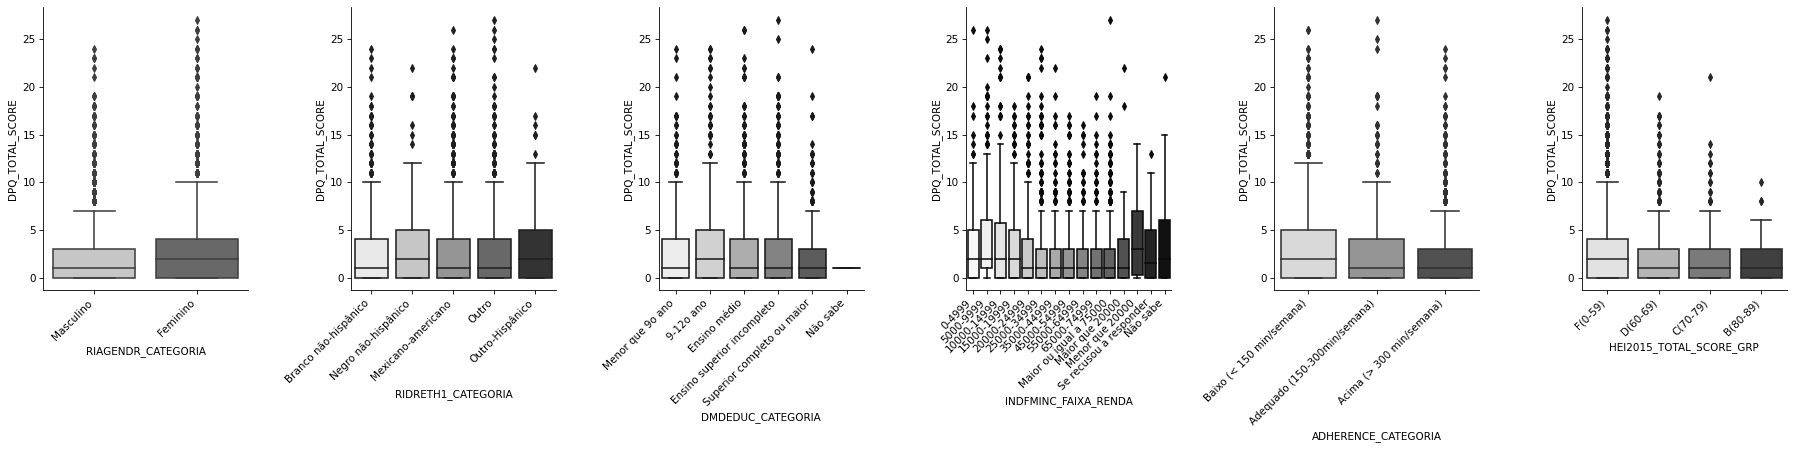

In [916]:
# Criando uma lista de tuplas com a combinação de 2 variáveis 
tupla_boxplot = []
for n in (varn):
    for c in (varc):
        tupla_boxplot.append((n,c))

fig, axs = plt.subplots(len(varn), len(varc), figsize=(30,5),dpi=75)
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 
for ax, i in zip(axs.flat, range(len(tupla_boxplot))):
  sns.boxplot(x=tupla_boxplot[i][1], y=tupla_boxplot[i][0], data=df, palette='Greys', ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
  sns.despine()

* Conclusões
    * Através dos gráficos, não conseguiremos comprovar por exemplo, se as mulheres tem em média, um índice maior de depressão que os homens, se uma pessoa descendente de uma determinada etnia, esta mais propensa a índices maiores de depressão, além de outras hipóteses. A sobreposição dos grupos impede obtermos as repostas. Para isso teremos que realizar testes de hipóteses para diferença entre médias, para comprovarmos com certeza essas questões.

* #### Realizando os Testes de Hipóteses

In [1410]:
def difmedia_2amostras(**kargs):
    """Realiza o teste de hipóteses T para diferença das médias entre dua amostras.
    kargs:
         var1: pandas series : variável categórica do dataframe.
         var2: pandas series : variável categórica do dataframe.
         var3: string : nome data variável alvo do dataframe.    
    """
    alpha = 0.05
    l_keys = list(kargs.keys())
    l_values = list(kargs.values())
    
    print('***** Realizando o teste de hipóteses t : Média - 2 amostras *****')
    print('* Premissas:')
    print('- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.')
    print('- Grupos com variâncias diferentes.')
    print('')

    # Hipóteses
    print('----- Hipóteses ----------------------------------------------------------------')
    print(f'H0 : A média do {kargs["var"]} entre {l_keys[0]} e {l_keys[1]}, são iguais.')
    print(f'Ha : A média do {kargs["var"]} entre {l_keys[0]} e {l_keys[1]}, são diferentes.')
    print('--------------------------------------------------------------------------------')
    print('')

    # Teste de hipóteses T - média - 2 amostras
    t = pg.ttest(l_values[0],l_values[1], paired=False, correction = True).round(15)
    
    print('----- Resultados -----')
    print(f"Valor do estatística T: {t['T'][0]}")
    print(f"P_valor: {t['p-val'][0]}")
    print(f'Intervalo de confiança para diferença das médias: {t["CI95%"][0]}')
    print('')
    print('----- Conclusão -----')
    if t['p-val'][0] < alpha: 
        print(f"- p_valor: {t['p-val'][0]} < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias do {kargs['var']} entre {l_keys[0]} e {l_keys[1]}.")
    else:
        print(f"- p_valor: {t['p-val'][0]} > α: 0.05 => Não rejeitamos a hipótese nula. Não existe diferença estatisticamente significativa das médias do {kargs['var']} entre {l_keys[0]} e {l_keys[1]}.")
    # Intervalo de confiança 
    if tt['CI95%'][0][0] <= 0 <= tt['CI95%'][0][1]: print(f'- Intervalo de confiança {t["CI95%"][0]} passa pelo zero. As amostras são estatisticamente iguais.')
    else:
        print(f'- Intervalo de confiança {t["CI95%"][0]} não passa pelo zero. As amostras são estatisticamente diferentes.')
        
    # Médias dos grupos
    print(f'- Média do {kargs["var"]} para {l_keys[0]}: {l_values[0].mean()}')
    print(f'- Média do {kargs["var"]} para {l_keys[1]}: {l_values[1].mean()}')
        

In [1411]:
def anova(**kargs):
    """Realiza o teste de hipóteses ANOVA ou ANOVA Welch para diferença entre as médias de duas amostras e um fator.
    kargs:
         dv : string : nome da variável dependente do dataframe.
         fator : string : nome data variável independente do dataframe.
         data : nome do dataframe.
         var_iguais : boolean : True => teste ANOVA, False => teste ANOVA Welch.
    """
    
    if kargs['var_iguais']:
        variancias = 'iguais'
        teste = 'ANOVA'
        # Teste de hipóteste ANOVA oneway
        anova = pg.anova(dv=kargs["dv"], between=kargs["fator"], data=kargs["data"], detailed=False)
    else:
        variancias = 'diferentes'
        teste = 'ANOVA WELCH'
        # Teste de hipóteste ANOVA Welch
        anova = pg.welch_anova(dv=kargs["dv"], between=kargs["fator"], data=kargs["data"])        
    
    print(f'***** Realizando o teste de hipóteses {teste} : Médias : +2 amostras : 1 fator *****')
    print('* Premissas:')
    print('- Amostras aleatórias.')
    print('- Grupos independentes.')
    print('- Variável dependente é continua.')
    print('- Variável independente é categórica.')
    print('- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.')
    print(f'- Grupos com variâncias {variancias}.')
    print('')

    # Hipóteses
    print('----- Hipóteses -----------------------------------------------------------------------')
    print(f'H0 : As médias da {kargs["dv"]} entre as amostras da {kargs["fator"]} são iguais.')
    print(f'Ha : As médias da {kargs["dv"]} entre as amostras da {kargs["fator"]} não são iguais.')
    print('---------------------------------------------------------------------------------------')
    print('')
    
    print('----- Resultados -----')
    print(f"Valor do estatística F: {anova['F'][0]}")
    print(f"P_valor: {anova['p-unc'][0]}")
    print('')
    print('----- Conclusão -----')
    if anova['p-unc'][0] < alpha: 
        print(f"- p_valor: {anova['p-unc'][0]} < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias da {kargs['dv']} entre as amostras da {kargs['fator']}.")
    else:
        print(f"- p_valor: {anova['p-unc'][0]} > α: 0.05 => Não rejeitamos a hipótese nula. Não existe diferença estatisticamente significativa das médias do {kargs['dv']} entre as amostras da {kargs['fator']}.")

In [1412]:
def variancia(**kargs):
    """Realiza o teste de hipóteses Bartlett de igualdade de variâncias.
    kargs:
         dv : string : nome da variável dependente do dataframe.
         fator : string : nome data variável independente do dataframe.
         data : nome do dataframe.
    """
    print('***** Realizando o teste de hipóteses Bartlett de igualdade de variâncias. *****')
    print('* Premissas:')
    print('- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.')
    print('')
    # Hipóteses
    print('----- Hipóteses -------------------------------------------------------------------------')
    print(f'H0 : As variâncias de todas as amostras da {kargs["fator"]} são iguais.')
    print(f'Ha : As variâncias para um par ou mais das amostras da {kargs["fator"]} não são iguais.')
    print('-----------------------------------------------------------------------------------------')
    print('')
    # Teste de Bartlett
    bartlett = pg.homoscedasticity(data=kargs['data'], dv=kargs['dv'], group=kargs['fator'], method="bartlett", alpha=.05)

    print('----- Resultados -----')
    print(f"Valor do estatística T: {bartlett['T'][0]}")
    print(f"P_valor: {bartlett['pval'][0]}")
    print('')
    print('----- Conclusão -----')
    if bartlett['pval'][0] < alpha: 
        print(f"- p_valor: {bartlett['pval'][0]} < α: 0.05 => Rejeitamos a hipótese nula. As variâncias das amostras da {kargs['fator']} não são iguais.")
    else:
        print(f"- p_valor: {bartlett['pval'][0]} > α: 0.05 => Não rejeitamos a hipótese nula. As variâncias das amostras da {kargs['fator']} são iguais.")
    

In [1413]:
def posthoc(**kargs):
    """Realiza o teste de hipóteses Tukey para explorar a diferença entre as médias de vários grupos (pares).
    kargs:
         dv : string : nome da variável dependente do dataframe.
         fator : string : nome data variável independente do dataframe.
         data : nome do dataframe.
    """
    if kargs['var_iguais']:
        print('***** Post-Hoc ANOVA - Realizando o teste de hipóteses Tukey para explorar a diferença entre as médias de vários grupos (pares). *****')
        print('* Premissas:')
        print('- Amostras aleatórias.')
        print('- Grupos independentes.')
        print('- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.')
        print('- Grupos com variâncias iguais.')
        print('- Tamanhos de amostras de todos os grupos são iguais.')   
        
        # Teste de hipóteste tukey
        data = pg.pairwise_tukey(data=kargs["data"], dv=kargs["dv"], between=kargs["fator"]) 
        data.rename(columns={'p-tukey':'p-valor'}, inplace=True) 
    else:
        print('***** Post-Hoc ANOVA - Realizando o teste de hipóteses Não paramétrico - Games Howell para explorar a diferença entre as médias de vários grupos (pares). *****')
        print('* Premissas:')        
        print('Não assume variâncias, tamanhos amostrais e amostras normais.')
        
        # Teste de hipóteste Games Howell
        data = pg.pairwise_gameshowell(data=kargs["data"], dv=kargs["dv"], between=kargs["fator"])
        data.rename(columns={'pval':'p-valor'}, inplace=True) 
              
    print('')
    # Hipóteses
    print('----- Hipóteses ---------------------------------------------------------------------------------')
    print(f'H0 : As médias da {kargs["dv"]} entre os pares das amostras da {kargs["fator"]} são iguais.')
    print(f'Ha : As médias da {kargs["dv"]} entre os pares das amostras da {kargs["fator"]} não são iguais.')    
    print('-------------------------------------------------------------------------------------------------')
    print('')    
    print('----- Resultados -----')
    print('- Pares de amostras com médias estatisticamente iguais - p_valor > α: 0.05 - Não rejeitamos H0')
   # print('--------------------------------------------------------------------------------------------------------')
    display(data[data['p-valor'] > 0.05][['A','mean(A)','B','mean(B)','p-valor']])
    print('')
    print('- Pares de amostras com médias estatisticamente diferentes - p_valor < α: 0.05 - Rejeitamos H0')
   # print('--------------------------------------------------------------------------------------------------------')
    display(data[data['p-valor'] < 0.05][['A','mean(A)','B','mean(B)','p-valor']])
   # print('--------------------------------------------------------------------------------------------------------')   

In [1414]:
def kruskal(**kargs):
    """Realiza o teste de hipóteses Não paramétrico - Kruskal-Wallis : Diferença entre Médias : +2 amostras : 1 fator.
    kargs:
         dv : string : nome da variável dependente do dataframe.
         fator : string : nome data variável independente do dataframe.
         data : nome do dataframe.
    """    
    print(f'***** Realizando o teste de hipóteses Não paramétrico - Kruskal-Wallis : Médias : +2 amostras : 1 fator *****')
    print('* Premissas:')
    print('- Variável dependente é continua ou ordinal.')
    print('- Variável independente é categórica.')    
    print('')

    # Hipóteses
    print('----- Hipóteses -----------------------------------------------------------------------')
    print(f'H0 : As médias da {kargs["dv"]} entre as amostras da {kargs["fator"]} são iguais.')
    print(f'Ha : As médias da {kargs["dv"]} entre as amostras da {kargs["fator"]} não são iguais.')
    print('---------------------------------------------------------------------------------------')
    print('')
    
    # Teste de hipóteste ANOVA Welch
    kruskal = pg.kruskal(dv=kargs["dv"], between=kargs["fator"], data=kargs["data"])    
    
    print('----- Resultados -----')
    print(f"Valor do estatística H: {kruskal['H'][0]}")
    print(f"P_valor: {kruskal['p-unc'][0]}")
    print('')
    print('----- Conclusão -----')
    if kruskal['p-unc'][0] < alpha: 
        print(f"- p_valor: {kruskal['p-unc'][0]} < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias da {kargs['dv']} entre as amostras da {kargs['fator']}.")
    else:
        print(f"- p_valor: {kruskal['p-unc'][0]} > α: 0.05 => Não rejeitamos a hipótese nula. Não existe diferença estatisticamente significativa das médias do {kargs['dv']} entre as amostras da {kargs['fator']}.")

* Hipóteses
    * <i>H</i><sub>0</sub> : A média entre as amostras são iguais.
    * <i>H</i><sub>a</sub> : A média entre as amostras são diferentes.
    * &alpha; = 0,05
    * Normalmente distribuidas n => 30
    * Variâncias não são iguais.

* #### DPQ_TOTAL_SCORE e RIAGENDR_CATEGORIA

In [705]:
df['RIAGENDR_CATEGORIA'].value_counts()

Feminino     2457
Masculino    2280
Name: RIAGENDR_CATEGORIA, dtype: int64

In [706]:
# variancias das amostras
df.groupby('RIAGENDR_CATEGORIA')['DPQ_TOTAL_SCORE'].var()

RIAGENDR_CATEGORIA
Masculino    11.955421
Feminino     15.602849
Name: DPQ_TOTAL_SCORE, dtype: float64

In [616]:
# Amostras m = masculino, f = feminino
m = df[df['RIAGENDR_CATEGORIA'] == 'Masculino']['DPQ_TOTAL_SCORE']
f = df[df['RIAGENDR_CATEGORIA'] == 'Feminino']['DPQ_TOTAL_SCORE']

In [853]:
# Verificar as variancias populacionais dos grupos.
variancia(data=df, dv='DPQ_TOTAL_SCORE', fator='RIAGENDR_CATEGORIA')

***** Realizando o teste de hipóteses Bartlett de igualdade de variâncias. *****
* Premissas:
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.

----- Hipóteses -------------------------------------------------------------------------
H0 : As variâncias de todas as amostras da RIAGENDR_CATEGORIA são iguais.
Ha : As variâncias para um par ou mais das amostras da RIAGENDR_CATEGORIA não são iguais.
-----------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística T: 41.63514832599215
P_valor: 1.0999782175803439e-10
----- Conclusão -----
- p_valor: 1.0999782175803439e-10 < α: 0.05 => Rejeitamos a hipótese nula. As variâncias das amostras da RIAGENDR_CATEGORIA não são iguais.


* Pelo teste, foi comprovado que as variâncias das amostras não são iguais. 

In [879]:
# Teste de hipóteses T - variâncias diferentes.
difmedia_2amostras(homens=m, mulheres=f, var='DPQ_TOTAL_SCORE')

***** Realizando o teste de hipóteses t : Média - 2 amostras *****
* Premissas:
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.
- Grupos com variâncias diferentes.

----- Hipóteses ----------------------------------------------------------------
H0 : A média do DPQ_TOTAL_SCORE entre homens e mulheres, são iguais.
Ha : A média do DPQ_TOTAL_SCORE entre homens e mulheres, são diferentes.
--------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística T: -7.64130854620411
P_valor: 2.6e-14
Intervalo de confiança para diferença das médias: [-1.03 -0.61]

----- Conclusão -----
- p_valor: 2.6e-14 < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias do DPQ_TOTAL_SCORE entre homens e mulheres.
- Intervalo de confiança [-1.03 -0.61] não passa pelo zero. As amostras são estatisticamente diferentes.
- Média do DPQ_TOTAL_SCORE para homens: 2.3131578947368423
- Média d

* O grupo de mulheres tem a média mais alta para o índice de depressão DPQ_TOTAL_SCORE.

* #### DPQ_TOTAL_SCORE e RIDRETH1_CATEGORIA

In [623]:
df['RIDRETH1_CATEGORIA'].value_counts()

Mexicano-americano      2297
Outro                   1117
Branco não-hispânico     998
Outro-Hispânico          181
Negro não-hispânico      144
Name: RIDRETH1_CATEGORIA, dtype: int64

In [621]:
df.groupby('RIDRETH1_CATEGORIA')['DPQ_TOTAL_SCORE'].var()

RIDRETH1_CATEGORIA
Branco não-hispânico    13.812813
Negro não-hispânico     18.737325
Mexicano-americano      12.366254
Outro                   16.871658
Outro-Hispânico         14.147698
Name: DPQ_TOTAL_SCORE, dtype: float64

In [859]:
# Verificar as variancias populacionais dos grupos -> Devem ser iguais
variancia(data=df, dv='DPQ_TOTAL_SCORE', fator='RIDRETH1_CATEGORIA')

***** Realizando o teste de hipóteses Bartlett de igualdade de variâncias. *****
* Premissas:
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.

----- Hipóteses -------------------------------------------------------------------------
H0 : As variâncias de todas as amostras da RIDRETH1_CATEGORIA são iguais.
Ha : As variâncias para um par ou mais das amostras da RIDRETH1_CATEGORIA não são iguais.
-----------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística T: 44.413145825129796
P_valor: 5.265249211712705e-09

----- Conclusão -----
- p_valor: 5.265249211712705e-09 < α: 0.05 => Rejeitamos a hipótese nula. As variâncias das amostras da RIDRETH1_CATEGORIA não são iguais.


* Pelo teste, foi comprovado que as variâncias das amostras não são iguais. Portanto não podemos utilizar o teste ANOVA clássico. Usaremos o ANOVA de Welch.

In [876]:
# Teste ANOVA welch
anova(dv='DPQ_TOTAL_SCORE', fator='RIDRETH1_CATEGORIA', data=df, var_iguais=False)

***** Realizando o teste de hipóteses ANOVA WELCH : Médias : +2 amostras : 1 fator *****
* Premissas:
- Amostras aleatórias.
- Grupos independentes.
- Variável dependente é continua.
- Variável independente é categórica.
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.
- Grupos com variâncias diferentes.

----- Hipóteses -----------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre as amostras da RIDRETH1_CATEGORIA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre as amostras da RIDRETH1_CATEGORIA não são iguais.
---------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística F: 2.3092839125498097
P_valor: 0.05668945083385808

----- Conclusão -----
- p_valor: 0.05668945083385808 > α: 0.05 => Não rejeitamos a hipótese nula. Não existe diferença estatisticamente significativa das médias do DPQ_TOTAL_SCORE entre as amostras da RIDRETH1_CATEGORIA.

In [868]:
# Posthoc Anova - Verificar quais pares de amostras tem as médias estatisticamente diferentes.
posthoc(dv='DPQ_TOTAL_SCORE', fator='RIDRETH1_CATEGORIA', data=df, var_iguais=False)

***** Post-Hoc ANOVA - Realizando o teste de hipóteses Não paramétrico - Games Howell para explorar a diferença entre as médias de vários grupos (pares). *****
* Premissas:
Não assume variâncias, tamanhos amostrais e amostras normais.

----- Hipóteses ---------------------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da RIDRETH1_CATEGORIA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da RIDRETH1_CATEGORIA não são iguais.
-------------------------------------------------------------------------------------------------

----- Resultados -----
- Pares de amostras com médias estatisticamente iguais - p_valor > α: 0.05 - Não rejeitamos H0


,A,mean(A),B,mean(B),p-valor
0,Branco não-hispânico,2.749499,Negro não-hispânico,3.437500,0.369225
1,Branco não-hispânico,2.749499,Mexicano-americano,2.600784,0.820666
2,Branco não-hispânico,2.749499,Outro,2.899731,0.903231
3,Branco não-hispânico,2.749499,Outro-Hispânico,2.911602,0.983705
4,Negro não-hispânico,3.437500,Mexicano-americano,2.600784,0.159291
5,Negro não-hispânico,3.437500,Outro,2.899731,0.621311
6,Negro não-hispânico,3.437500,Outro-Hispânico,2.911602,0.778355
7,Mexicano-americano,2.600784,Outro,2.899731,0.225362
8,Mexicano-americano,2.600784,Outro-Hispânico,2.911602,0.819042
9,Outro,2.899731,Outro-Hispânico,2.911602,0.999999



- Pares de amostras com médias estatisticamente diferentes - p_valor < α: 0.05 - Rejeitamos H0


,A,mean(A),B,mean(B),p-valor


* #### DPQ_TOTAL_SCORE e DMDEDUC_CATEGORIA

In [818]:
df['DMDEDUC_CATEGORIA'].value_counts()

Ensino superior incompleto    1349
Ensino médio                  1201
Superior completo ou maior     865
9-12o ano                      816
Menor que 9o ano               505
Não sabe                         1
Name: DMDEDUC_CATEGORIA, dtype: int64

In [823]:
df.groupby('DMDEDUC_CATEGORIA')['DPQ_TOTAL_SCORE'].var()

DMDEDUC_CATEGORIA
Menor que 9o ano              17.399481
9-12o ano                     17.109839
Ensino médio                  14.832086
Ensino superior incompleto    14.055628
Superior completo ou maior     7.184923
Não sabe                            NaN
Name: DPQ_TOTAL_SCORE, dtype: float64

* Não podemos utilizar Bartlett e ANOVA Welch, pois ambos requerem que os dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo. O grupo 'Não sabe', tem somente 1 registro.
* Como alternativa usaremos um teste **não paramétrico** Kruskal–Wallis, para comprovar se existem diferenças estatisticamente significativas entre dois ou mais grupos.

In [880]:
# Teste não parametrico Kruskal–Wallis
kruskal(data=df, dv='DPQ_TOTAL_SCORE', fator='DMDEDUC_CATEGORIA')

***** Realizando o teste de hipóteses Não paramétrico - Kruskal-Wallis : Médias : +2 amostras : 1 fator *****
* Premissas:
- Variável dependente é continua ou ordinal.
- Variável independente é categórica.

----- Hipóteses -----------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre as amostras da DMDEDUC_CATEGORIA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre as amostras da DMDEDUC_CATEGORIA não são iguais.
---------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística H: 24.82357333800258
P_valor: 0.00015069807766292505

----- Conclusão -----
- p_valor: 0.00015069807766292505 < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias da DPQ_TOTAL_SCORE entre as amostras da DMDEDUC_CATEGORIA.


In [870]:
# Posthoc Anova - Verificar quais pares de amostras tem as médias estatisticamente diferentes.
posthoc(dv='DPQ_TOTAL_SCORE', fator='DMDEDUC_CATEGORIA', data=df, var_iguais=False)

***** Post-Hoc ANOVA - Realizando o teste de hipóteses Não paramétrico - Games Howell para explorar a diferença entre as médias de vários grupos (pares). *****
* Premissas:
Não assume variâncias, tamanhos amostrais e amostras normais.

----- Hipóteses ---------------------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da DMDEDUC_CATEGORIA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da DMDEDUC_CATEGORIA não são iguais.
-------------------------------------------------------------------------------------------------

----- Resultados -----
- Pares de amostras com médias estatisticamente iguais - p_valor > α: 0.05 - Não rejeitamos H0


,A,mean(A),B,mean(B),p-valor
0,Menor que 9o ano,3.114851,9-12o ano,3.180147,0.999779
1,Menor que 9o ano,3.114851,Ensino médio,2.845962,0.815555
2,Menor que 9o ano,3.114851,Ensino superior incompleto,2.704225,0.379355
5,9-12o ano,3.180147,Ensino médio,2.845962,0.446043
6,9-12o ano,3.180147,Ensino superior incompleto,2.704225,0.078506
9,Ensino médio,2.845962,Ensino superior incompleto,2.704225,0.936295



- Pares de amostras com médias estatisticamente diferentes - p_valor < α: 0.05 - Rejeitamos H0


,A,mean(A),B,mean(B),p-valor
3,Menor que 9o ano,3.114851,Superior completo ou maior,2.016185,2.116760e-06
7,9-12o ano,3.180147,Superior completo ou maior,2.016185,2.287418e-10
10,Ensino médio,2.845962,Superior completo ou maior,2.016185,1.337675e-07
12,Ensino superior incompleto,2.704225,Superior completo ou maior,2.016185,7.947819e-06


* #### DPQ_TOTAL_SCORE e INDFMINC_FAIXA_RENDA

In [871]:
df['INDFMINC_FAIXA_RENDA'].value_counts()

Maior ou igual a 75000    973
25000-34999               608
35000-44999               467
45000-54999               437
10000-14999               386
20000-24999               366
15000-19999               358
55000-64999               268
65000-74999               251
5000-9999                 250
0-4999                    167
Maior que 20000            65
Se recusou a responder     62
Não sabe                   53
Menor que 20000            26
Name: INDFMINC_FAIXA_RENDA, dtype: int64

In [872]:
df.groupby('INDFMINC_FAIXA_RENDA')['DPQ_TOTAL_SCORE'].var()

INDFMINC_FAIXA_RENDA
0-4999                    17.370103
5000-9999                 28.135598
10000-14999               23.411110
15000-19999               15.639587
20000-24999               17.582611
25000-34999               13.850036
35000-44999                9.592606
45000-54999                9.756597
55000-64999                9.142755
65000-74999               10.770900
Maior ou igual a 75000     8.242583
Maior que 20000           15.497596
Menor que 20000           20.715385
Se recusou a responder    12.495241
Não sabe                  16.906386
Name: DPQ_TOTAL_SCORE, dtype: float64

In [873]:
# Verificar as variancias populacionais dos grupos -> Devem ser iguais
variancia(data=df, dv='DPQ_TOTAL_SCORE', fator='INDFMINC_FAIXA_RENDA')

***** Realizando o teste de hipóteses Bartlett de igualdade de variâncias. *****
* Premissas:
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.

----- Hipóteses -------------------------------------------------------------------------
H0 : As variâncias de todas as amostras da INDFMINC_FAIXA_RENDA são iguais.
Ha : As variâncias para um par ou mais das amostras da INDFMINC_FAIXA_RENDA não são iguais.
-----------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística T: 355.2622130486118
P_valor: 3.238977033385825e-67

----- Conclusão -----
- p_valor: 3.238977033385825e-67 < α: 0.05 => Rejeitamos a hipótese nula. As variâncias das amostras da INDFMINC_FAIXA_RENDA não são iguais.


* Pelo teste, foi comprovado que as variâncias das amostras não são iguais. Portanto não podemos utilizar o teste ANOVA clássico. Usaremos o ANOVA de Welch.

In [881]:
# Teste ANOVA welch
anova(dv='DPQ_TOTAL_SCORE', fator='INDFMINC_FAIXA_RENDA', data=df, var_iguais=False)

***** Realizando o teste de hipóteses ANOVA WELCH : Médias : +2 amostras : 1 fator *****
* Premissas:
- Amostras aleatórias.
- Grupos independentes.
- Variável dependente é continua.
- Variável independente é categórica.
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.
- Grupos com variâncias diferentes.

----- Hipóteses -----------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre as amostras da INDFMINC_FAIXA_RENDA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre as amostras da INDFMINC_FAIXA_RENDA não são iguais.
---------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística F: 8.447721825140508
P_valor: 7.398884757183431e-17

----- Conclusão -----
- p_valor: 7.398884757183431e-17 < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias da DPQ_TOTAL_SCORE entre as amostras da INDFMINC_FAIXA_RENDA

In [882]:
# Posthoc Anova - Verificar quais pares de amostras tem as médias estatisticamente diferentes.
posthoc(dv='DPQ_TOTAL_SCORE', fator='INDFMINC_FAIXA_RENDA', data=df, var_iguais=False)

***** Post-Hoc ANOVA - Realizando o teste de hipóteses Não paramétrico - Games Howell para explorar a diferença entre as médias de vários grupos (pares). *****
* Premissas:
Não assume variâncias, tamanhos amostrais e amostras normais.

----- Hipóteses ---------------------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da INDFMINC_FAIXA_RENDA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da INDFMINC_FAIXA_RENDA não são iguais.
-------------------------------------------------------------------------------------------------

----- Resultados -----
- Pares de amostras com médias estatisticamente iguais - p_valor > α: 0.05 - Não rejeitamos H0


,A,mean(A),B,mean(B),p-valor
0,0-4999,3.251497,5000-9999,4.212000,0.757893
1,0-4999,3.251497,10000-14999,3.878238,0.968648
2,0-4999,3.251497,15000-19999,3.315642,1.000000
3,0-4999,3.251497,20000-24999,3.095628,1.000000
4,0-4999,3.251497,25000-34999,2.541118,0.799465
...,...,...,...,...,...
100,Maior que 20000,2.692308,Se recusou a responder,2.887097,1.000000
101,Maior que 20000,2.692308,Não sabe,3.547170,0.998034
102,Menor que 20000,4.346154,Se recusou a responder,2.887097,0.974817
103,Menor que 20000,4.346154,Não sabe,3.547170,0.999977



- Pares de amostras com médias estatisticamente diferentes - p_valor < α: 0.05 - Rejeitamos H0


,A,mean(A),B,mean(B),p-valor
9,0-4999,3.251497,Maior ou igual a 75000,2.065776,3.683862e-02
17,5000-9999,4.212000,25000-34999,2.541118,7.318971e-04
18,5000-9999,4.212000,35000-44999,2.381156,8.398673e-05
19,5000-9999,4.212000,45000-54999,2.338673,5.593034e-05
20,5000-9999,4.212000,55000-64999,2.227612,3.585219e-05
21,5000-9999,4.212000,65000-74999,2.490040,1.488752e-03
22,5000-9999,4.212000,Maior ou igual a 75000,2.065776,2.414515e-07
29,10000-14999,3.878238,25000-34999,2.541118,4.305236e-04
30,10000-14999,3.878238,35000-44999,2.381156,2.083366e-05
31,10000-14999,3.878238,45000-54999,2.338673,1.291653e-05


* #### DPQ_TOTAL_SCORE e ADHERENCE_CATEGORIA

In [883]:
df['ADHERENCE_CATEGORIA'].value_counts()

Acima (> 300 min/semana)        2008
Baixo (< 150 min/semana)        1987
Adequado (150-300min/semana)     742
Name: ADHERENCE_CATEGORIA, dtype: int64

In [884]:
df.groupby('ADHERENCE_CATEGORIA')['DPQ_TOTAL_SCORE'].var()

ADHERENCE_CATEGORIA
Baixo (< 150 min/semana)        17.663983
Adequado (150-300min/semana)    13.043932
Acima (> 300 min/semana)        10.397644
Name: DPQ_TOTAL_SCORE, dtype: float64

In [885]:
# Verificar as variancias populacionais dos grupos -> Devem ser iguais
variancia(data=df, dv='DPQ_TOTAL_SCORE', fator='ADHERENCE_CATEGORIA')

***** Realizando o teste de hipóteses Bartlett de igualdade de variâncias. *****
* Premissas:
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.

----- Hipóteses -------------------------------------------------------------------------
H0 : As variâncias de todas as amostras da ADHERENCE_CATEGORIA são iguais.
Ha : As variâncias para um par ou mais das amostras da ADHERENCE_CATEGORIA não são iguais.
-----------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística T: 140.21429012394037
P_valor: 3.571525519288466e-31

----- Conclusão -----
- p_valor: 3.571525519288466e-31 < α: 0.05 => Rejeitamos a hipótese nula. As variâncias das amostras da ADHERENCE_CATEGORIA não são iguais.


* Pelo teste, foi comprovado que as variâncias das amostras não são iguais. Portanto não podemos utilizar o teste ANOVA clássico. Usaremos o ANOVA de Welch.

In [886]:
# Teste ANOVA welch
anova(dv='DPQ_TOTAL_SCORE', fator='ADHERENCE_CATEGORIA', data=df, var_iguais=False)

***** Realizando o teste de hipóteses ANOVA WELCH : Médias : +2 amostras : 1 fator *****
* Premissas:
- Amostras aleatórias.
- Grupos independentes.
- Variável dependente é continua.
- Variável independente é categórica.
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.
- Grupos com variâncias diferentes.

----- Hipóteses -----------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre as amostras da ADHERENCE_CATEGORIA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre as amostras da ADHERENCE_CATEGORIA não são iguais.
---------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística F: 25.994758010127086
P_valor: 7.11392616470915e-12

----- Conclusão -----
- p_valor: 7.11392616470915e-12 < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias da DPQ_TOTAL_SCORE entre as amostras da ADHERENCE_CATEGORIA.


In [887]:
# Posthoc Anova - Verificar quais pares de amostras tem as médias estatisticamente diferentes.
posthoc(dv='DPQ_TOTAL_SCORE', fator='ADHERENCE_CATEGORIA', data=df, var_iguais=False)

***** Post-Hoc ANOVA - Realizando o teste de hipóteses Não paramétrico - Games Howell para explorar a diferença entre as médias de vários grupos (pares). *****
* Premissas:
Não assume variâncias, tamanhos amostrais e amostras normais.

----- Hipóteses ---------------------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da ADHERENCE_CATEGORIA são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da ADHERENCE_CATEGORIA não são iguais.
-------------------------------------------------------------------------------------------------

----- Resultados -----
- Pares de amostras com médias estatisticamente iguais - p_valor > α: 0.05 - Não rejeitamos H0


,A,mean(A),B,mean(B),p-valor
2,Adequado (150-300min/semana),2.551213,Acima (> 300 min/semana),2.352092,0.3843



- Pares de amostras com médias estatisticamente diferentes - p_valor < α: 0.05 - Rejeitamos H0


,A,mean(A),B,mean(B),p-valor
0,Baixo (< 150 min/semana),3.202315,Adequado (150-300min/semana),2.551213,1.942585e-04
1,Baixo (< 150 min/semana),3.202315,Acima (> 300 min/semana),2.352092,3.900325e-12


* #### DPQ_TOTAL_SCORE e HEI2015_TOTAL_SCORE_GRP

In [922]:
df['HEI2015_TOTAL_SCORE_GRP'].value_counts()

F(0-59)     3748
D(60-69)     693
C(70-79)     250
B(80-89)      46
Name: HEI2015_TOTAL_SCORE_GRP, dtype: int64

In [923]:
df.groupby('HEI2015_TOTAL_SCORE_GRP')['DPQ_TOTAL_SCORE'].var()

HEI2015_TOTAL_SCORE_GRP
F(0-59)     14.998754
D(60-69)    10.773778
C(70-79)     8.752514
B(80-89)     6.042995
Name: DPQ_TOTAL_SCORE, dtype: float64

In [924]:
# Verificar as variancias populacionais dos grupos -> Devem ser iguais
variancia(data=df, dv='DPQ_TOTAL_SCORE', fator='HEI2015_TOTAL_SCORE_GRP')

***** Realizando o teste de hipóteses Bartlett de igualdade de variâncias. *****
* Premissas:
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.

----- Hipóteses -------------------------------------------------------------------------
H0 : As variâncias de todas as amostras da HEI2015_TOTAL_SCORE_GRP são iguais.
Ha : As variâncias para um par ou mais das amostras da HEI2015_TOTAL_SCORE_GRP não são iguais.
-----------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística T: 66.54278584705006
P_valor: 2.3458141997785007e-14

----- Conclusão -----
- p_valor: 2.3458141997785007e-14 < α: 0.05 => Rejeitamos a hipótese nula. As variâncias das amostras da HEI2015_TOTAL_SCORE_GRP não são iguais.


* Pelo teste, foi comprovado que as variâncias das amostras não são iguais. Portanto não podemos utilizar o teste ANOVA clássico. Usaremos o ANOVA de Welch.

In [925]:
# Teste ANOVA welch
anova(dv='DPQ_TOTAL_SCORE', fator='HEI2015_TOTAL_SCORE_GRP', data=df, var_iguais=False)

***** Realizando o teste de hipóteses ANOVA WELCH : Médias : +2 amostras : 1 fator *****
* Premissas:
- Amostras aleatórias.
- Grupos independentes.
- Variável dependente é continua.
- Variável independente é categórica.
- Dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo.
- Grupos com variâncias diferentes.

----- Hipóteses -----------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre as amostras da HEI2015_TOTAL_SCORE_GRP são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre as amostras da HEI2015_TOTAL_SCORE_GRP não são iguais.
---------------------------------------------------------------------------------------

----- Resultados -----
Valor do estatística F: 8.81201020065793
P_valor: 1.6565006588259396e-05

----- Conclusão -----
- p_valor: 1.6565006588259396e-05 < α: 0.05 => Rejeitamos a hipótese nula. Existe diferença estatisticamente significativa das médias da DPQ_TOTAL_SCORE entre as amostras da HEI2015_TOTAL

In [927]:
# Posthoc Anova - Verificar quais pares de amostras tem as médias estatisticamente diferentes.
posthoc(dv='DPQ_TOTAL_SCORE', fator='HEI2015_TOTAL_SCORE_GRP', data=df, var_iguais=False)

***** Post-Hoc ANOVA - Realizando o teste de hipóteses Não paramétrico - Games Howell para explorar a diferença entre as médias de vários grupos (pares). *****
* Premissas:
Não assume variâncias, tamanhos amostrais e amostras normais.

----- Hipóteses ---------------------------------------------------------------------------------
H0 : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da HEI2015_TOTAL_SCORE_GRP são iguais.
Ha : As médias da DPQ_TOTAL_SCORE entre os pares das amostras da HEI2015_TOTAL_SCORE_GRP não são iguais.
-------------------------------------------------------------------------------------------------

----- Resultados -----
- Pares de amostras com médias estatisticamente iguais - p_valor > α: 0.05 - Não rejeitamos H0


,A,mean(A),B,mean(B),p-valor
3,D(60-69),2.393939,C(70-79),2.136000,0.660439
4,D(60-69),2.393939,B(80-89),1.847826,0.489478
5,C(70-79),2.136000,B(80-89),1.847826,0.894205



- Pares de amostras com médias estatisticamente diferentes - p_valor < α: 0.05 - Rejeitamos H0


,A,mean(A),B,mean(B),p-valor
0,F(0-59),2.855123,D(60-69),2.393939,0.005534
1,F(0-59),2.855123,C(70-79),2.136000,0.001802
2,F(0-59),2.855123,B(80-89),1.847826,0.041658


* ### Regressão Linear OLS

In [1201]:
# Copia do dataframe para regressão OLS
df_ols = df.copy()
df_ols.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,ADHERENCE_CATEGORIA,HEI2015_TOTAL_SCORE_GRP
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,Adequado (150-300min/semana),F(0-59)
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,Acima (> 300 min/semana),D(60-69)
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,Acima (> 300 min/semana),F(0-59)
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,Acima (> 300 min/semana),F(0-59)
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,Acima (> 300 min/semana),F(0-59)


In [1202]:
cols_ols = ['RIDAGEYR', 'PAG_MINW', 'DPQ_TOTAL_SCORE', 'RIAGENDR_CATEGORIA','RIDRETH1_CATEGORIA', 'DMDEDUC_CATEGORIA', 'INDFMINC_FAIXA_RENDA', 'ADHERENCE_CATEGORIA', 'HEI2015_TOTAL_SCORE_GRP']

In [1203]:
df_ols = df_ols[cols_ols]

In [1204]:
df_ols.head()

,RIDAGEYR,PAG_MINW,DPQ_TOTAL_SCORE,RIAGENDR_CATEGORIA,RIDRETH1_CATEGORIA,DMDEDUC_CATEGORIA,INDFMINC_FAIXA_RENDA,ADHERENCE_CATEGORIA,HEI2015_TOTAL_SCORE_GRP
0,44,264.711316,0.0,Feminino,Outro,Ensino superior incompleto,Maior ou igual a 75000,Adequado (150-300min/semana),F(0-59)
1,70,1353.348730,0.0,Masculino,Mexicano-americano,Superior completo ou maior,Maior ou igual a 75000,Acima (> 300 min/semana),D(60-69)
2,73,1011.478060,0.0,Masculino,Mexicano-americano,Ensino médio,Maior que 20000,Acima (> 300 min/semana),F(0-59)
3,18,1729.145497,4.0,Feminino,Negro não-hispânico,Ensino médio,Maior ou igual a 75000,Acima (> 300 min/semana),F(0-59)
4,19,3768.083141,6.0,Masculino,Mexicano-americano,Ensino superior incompleto,Maior ou igual a 75000,Acima (> 300 min/semana),F(0-59)


In [1205]:
varn_ols = ['RIDAGEYR', 'PAG_MINW']
varn_ols

['RIDAGEYR', 'PAG_MINW']

In [1206]:
varc_ols = ['RIAGENDR_CATEGORIA','RIDRETH1_CATEGORIA', 'DMDEDUC_CATEGORIA', 'INDFMINC_FAIXA_RENDA', 'ADHERENCE_CATEGORIA', 'HEI2015_TOTAL_SCORE_GRP']
varc_ols

['RIAGENDR_CATEGORIA',
 'RIDRETH1_CATEGORIA',
 'DMDEDUC_CATEGORIA',
 'INDFMINC_FAIXA_RENDA',
 'ADHERENCE_CATEGORIA',
 'HEI2015_TOTAL_SCORE_GRP']

* #### Dummy das variaveis categóricas

In [1207]:
# Dummy para variável RIAGENDR_CATEGORIA
dummies = pd.get_dummies(df['RIAGENDR_CATEGORIA'], drop_first=True).rename(columns=lambda x: 'genero_' + str(x))
df_ols = pd.concat([df_ols, dummies], axis=1)

In [1208]:
# Caracteres a serem substituidos nas strings
replacement = lambda x : x.group(0).replace('ã','a').replace('á','a').replace('â','a').replace('é','e').replace('ê','e').replace('-','_').replace(' ','_')

In [1209]:
# Dummy para variável RIDRETH1_CATEGORIA
dummies = pd.get_dummies(df_ols['RIDRETH1_CATEGORIA'].str.replace(r'[^A-Za-z0-9_]+', replacement, regex=True).str.lower(), drop_first=True).rename(columns=lambda x: 'etnia_' + str(x))
df_ols = pd.concat([df_ols, dummies], axis=1)

In [1210]:
# Dummy para variável DMDEDUC_CATEGORIA
dummies = pd.get_dummies(df_ols['DMDEDUC_CATEGORIA'].str.replace(r'[^A-Za-z0-9_]+', replacement, regex=True).str.lower(), drop_first=True).rename(columns=lambda x: 'escolaridade_' + str(x))
df_ols = pd.concat([df_ols, dummies], axis=1)

In [1211]:
# Dummy para variável INDFMINC_FAIXA_RENDA
dummies = pd.get_dummies(df_ols['INDFMINC_FAIXA_RENDA'].str.replace(r'[^A-Za-z0-9_]+', replacement, regex=True).str.lower(), drop_first=True).rename(columns=lambda x: 'renda_' + str(x))
df_ols = pd.concat([df_ols, dummies], axis=1)

In [1212]:
# Dummy para variável ADHERENCE_CATEGORIA
dummies = pd.get_dummies(df_ols['ADHERENCE_CATEGORIA'].str.findall(r'^[A-Za-z]+\S').apply(lambda x : x[0]).str.lower(), drop_first=True).rename(columns=lambda x: 'atividade_fisica_' + str(x))
df_ols = pd.concat([df_ols, dummies], axis=1)

In [1213]:
# Dummy para variável HEI2015_TOTAL_SCORE_GRP
dummies = pd.get_dummies(df_ols['HEI2015_TOTAL_SCORE_GRP'].str.findall(r'^[A-Za-z]+').apply(lambda x : x[0]).str.lower(), drop_first=True).rename(columns=lambda x: 'alimentacao_saudavel_grp_' + str(x))
df_ols = pd.concat([df_ols, dummies], axis=1)

In [1214]:
df_ols.head()

,RIDAGEYR,PAG_MINW,DPQ_TOTAL_SCORE,RIAGENDR_CATEGORIA,RIDRETH1_CATEGORIA,DMDEDUC_CATEGORIA,INDFMINC_FAIXA_RENDA,ADHERENCE_CATEGORIA,HEI2015_TOTAL_SCORE_GRP,genero_Feminino,...,renda_maior_ou_igual_a_75000,renda_maior_que_20000,renda_menor_que_20000,renda_nao_sabe,renda_se_recusou_a_responder,atividade_fisica_adequado,atividade_fisica_baixo,alimentacao_saudavel_grp_c,alimentacao_saudavel_grp_d,alimentacao_saudavel_grp_f
0,44,264.711316,0.0,Feminino,Outro,Ensino superior incompleto,Maior ou igual a 75000,Adequado (150-300min/semana),F(0-59),1,...,1,0,0,0,0,1,0,0,0,1
1,70,1353.348730,0.0,Masculino,Mexicano-americano,Superior completo ou maior,Maior ou igual a 75000,Acima (> 300 min/semana),D(60-69),0,...,1,0,0,0,0,0,0,0,1,0
2,73,1011.478060,0.0,Masculino,Mexicano-americano,Ensino médio,Maior que 20000,Acima (> 300 min/semana),F(0-59),0,...,0,1,0,0,0,0,0,0,0,1
3,18,1729.145497,4.0,Feminino,Negro não-hispânico,Ensino médio,Maior ou igual a 75000,Acima (> 300 min/semana),F(0-59),1,...,1,0,0,0,0,0,0,0,0,1
4,19,3768.083141,6.0,Masculino,Mexicano-americano,Ensino superior incompleto,Maior ou igual a 75000,Acima (> 300 min/semana),F(0-59),0,...,1,0,0,0,0,0,0,0,0,1


In [1217]:
df_ols.to_csv('df_ols_depressao.csv', index=False)

In [1223]:
df_ols.drop(columns=['RIAGENDR_CATEGORIA', 'RIDRETH1_CATEGORIA', 'DMDEDUC_CATEGORIA', 'INDFMINC_FAIXA_RENDA', 'ADHERENCE_CATEGORIA', 'HEI2015_TOTAL_SCORE_GRP'], axis=1, inplace=True)
df_ols

,RIDAGEYR,PAG_MINW,DPQ_TOTAL_SCORE,genero_Feminino,etnia_mexicano_americano,etnia_negro_nao_hispanico,etnia_outro,etnia_outro_hispanico,escolaridade_ensino_medio,escolaridade_ensino_superior_incompleto,...,renda_maior_ou_igual_a_75000,renda_maior_que_20000,renda_menor_que_20000,renda_nao_sabe,renda_se_recusou_a_responder,atividade_fisica_adequado,atividade_fisica_baixo,alimentacao_saudavel_grp_c,alimentacao_saudavel_grp_d,alimentacao_saudavel_grp_f
0,44,264.711316,0.0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,70,1353.348730,0.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,73,1011.478060,0.0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,18,1729.145497,4.0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,19,3768.083141,6.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,58,9.237875,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4733,66,173.210162,10.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4734,19,184.711316,2.0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4735,34,27.713626,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


* ### Premissas para usar OLS para inferência

* #### Linearidade

* A linearidade entre a variável dependente DPQ_TOTAL_SCORE e variáveis preditoras já foi confirmada anteriormente.

* #### Multicolinearidade

In [1231]:
X = df_ols[['RIDAGEYR', 'PAG_MINW']]

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values('VIF')

,Variable,VIF
0,RIDAGEYR,1.215337
1,PAG_MINW,1.215337


* Todos os valores de VIF são menores que 5. Podemos ver que há alguma multicolinearidade, porém não é severa.

In [1232]:
df_ols[['RIDAGEYR', 'PAG_MINW']].corr()

,RIDAGEYR,PAG_MINW
RIDAGEYR,1.000000,-0.156373
PAG_MINW,-0.156373,1.000000


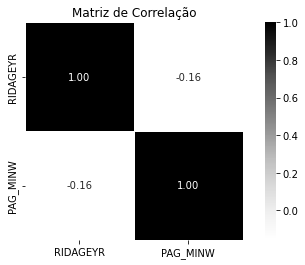

In [1233]:
# Plotando o heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_ols[['RIDAGEYR', 'PAG_MINW']].corr(), annot=True, cmap="Greys", fmt=".2f", square=True, linecolor='white', linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

In [1226]:
df_ols.columns

Index(['RIDAGEYR', 'PAG_MINW', 'DPQ_TOTAL_SCORE', 'genero_Feminino',
       'etnia_mexicano_americano', 'etnia_negro_nao_hispanico', 'etnia_outro',
       'etnia_outro_hispanico', 'escolaridade_ensino_medio',
       'escolaridade_ensino_superior_incompleto',
       'escolaridade_menor_que_9o_ano', 'escolaridade_nao_sabe',
       'escolaridade_superior_completo_ou_maior', 'renda_10000_14999',
       'renda_15000_19999', 'renda_20000_24999', 'renda_25000_34999',
       'renda_35000_44999', 'renda_45000_54999', 'renda_5000_9999',
       'renda_55000_64999', 'renda_65000_74999',
       'renda_maior_ou_igual_a_75000', 'renda_maior_que_20000',
       'renda_menor_que_20000', 'renda_nao_sabe',
       'renda_se_recusou_a_responder', 'atividade_fisica_adequado',
       'atividade_fisica_baixo', 'alimentacao_saudavel_grp_c',
       'alimentacao_saudavel_grp_d', 'alimentacao_saudavel_grp_f'],
      dtype='object')

In [1314]:
preditores = [c for c in df_ols.columns if c != 'DPQ_TOTAL_SCORE' and c != 'sqrt_DPQ_TOTAL_SCORE' and c != 'log_DPQ_TOTAL_SCORE_plus1']
formula = 'DPQ_TOTAL_SCORE ~ ' + ' + '.join(preditores)
formula   

'DPQ_TOTAL_SCORE ~ RIDAGEYR + PAG_MINW + genero_Feminino + etnia_mexicano_americano + etnia_negro_nao_hispanico + etnia_outro + etnia_outro_hispanico + escolaridade_ensino_medio + escolaridade_ensino_superior_incompleto + escolaridade_menor_que_9o_ano + escolaridade_nao_sabe + escolaridade_superior_completo_ou_maior + renda_10000_14999 + renda_15000_19999 + renda_20000_24999 + renda_25000_34999 + renda_35000_44999 + renda_45000_54999 + renda_5000_9999 + renda_55000_64999 + renda_65000_74999 + renda_maior_ou_igual_a_75000 + renda_maior_que_20000 + renda_menor_que_20000 + renda_nao_sabe + renda_se_recusou_a_responder + atividade_fisica_adequado + atividade_fisica_baixo + alimentacao_saudavel_grp_c + alimentacao_saudavel_grp_d + alimentacao_saudavel_grp_f'

In [1315]:
# Modelo inicial para verificar as premissas
mod1 = smf.ols(formula, data = df_ols).fit()

In [1326]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        DPQ_TOTAL_SCORE   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     9.046
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.45e-40
Time:                        23:23:01   Log-Likelihood:                -12837.
No. Observations:                4737   AIC:                         2.574e+04
Df Residuals:                    4705   BIC:                         2.594e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

* #### Homocedasticidade
    * 5 - O termo de erro tem uma média populacional de zero

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

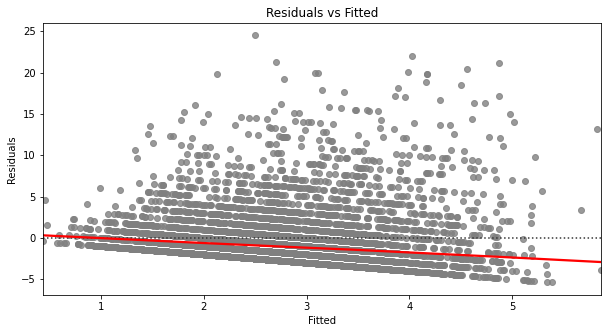

In [1332]:
fig, ax = plt.subplots(figsize=(10,5))
sns.residplot(x=mod1.fittedvalues, y=mod1.resid, color='grey', line_kws=dict(color="r"), lowess=True) #lowess mostra a linha azul em torno da pontilhada
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

* No gráfico acima, a dispersão spread dos resíduos aumenta à medida que o os valores ajustados aumentam. Isto é um indicio de heterocedasticidade (dispersão diferente).
* A heterocedasticidade ocorre com mais frequência em conjuntos de dados que têm um grande intervalo entre o maior e o menor valores observados. 

Mas para termos certeza, vamos realizar o teste de hipóteses Breusch–Pagan.

* Hipóteses:
    * <i>H</i><sub>0</sub> : A homocedasticidade está presente.
    * <i>H</i><sub>a</sub> : A homocedasticidade não está presente (i.e. heterocedasticidade existe).
    * &alpha; = 0,05


In [1319]:
# Teste de hipóteses Breusch–Pagan.
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sms.het_breuschpagan(mod1.resid, mod1.model.exog)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05), 
# reject the null hypothesis of homoscedasticity
print('')
print('----- Resultado -----')
if bp_lm_pvalue < 0.05:
    print(f"- p_valor: {bp_lm_pvalue} < α: 0.05 => Rejeitamos a hipótese nula. A heterocedasticidade está presente.")
else:
    print(f"- p_valor: {bp_lm_pvalue} > α: 0.05 => Não rejeitamos a hipótese nula. A heterocedasticidade não está presente.")        
    

Lagrange multiplier statistic: 157.85543030644254
Lagrange multiplier p-value:   6.220395354824179e-19
F-statistic:                   5.232064694038979
P-value of F-statistic:        2.6340717092576726e-19

----- Resultado -----
- p_valor: 6.220395354824179e-19 < α: 0.05 => Rejeitamos a hipótese nula. A heterocedasticidade está presente.


* Através do teste de hipóteses, pudemos confirmar a presença da heterocedasticidade, a variância residual está crescendo, tem um padrão.
* Uma forma de corrigir o problema é usar transformações na variável dependente (log, box-cox, etc). Essa é a que vamos usar aqui.
* Aqui aplicaremos a função Log na variável dependente DPQ_TOTAL_SCORE.

In [1303]:
df_ols['log_DPQ_TOTAL_SCORE_plus1'] = np.log(df_ols['DPQ_TOTAL_SCORE']+1)

In [1321]:
preditores = [c for c in df_ols.columns if c != 'DPQ_TOTAL_SCORE' and c != 'log_DPQ_TOTAL_SCORE_plus1']
formula = 'log_DPQ_TOTAL_SCORE_plus1 ~ ' + ' + '.join(preditores)
formula   

'log_DPQ_TOTAL_SCORE_plus1 ~ RIDAGEYR + PAG_MINW + genero_Feminino + etnia_mexicano_americano + etnia_negro_nao_hispanico + etnia_outro + etnia_outro_hispanico + escolaridade_ensino_medio + escolaridade_ensino_superior_incompleto + escolaridade_menor_que_9o_ano + escolaridade_nao_sabe + escolaridade_superior_completo_ou_maior + renda_10000_14999 + renda_15000_19999 + renda_20000_24999 + renda_25000_34999 + renda_35000_44999 + renda_45000_54999 + renda_5000_9999 + renda_55000_64999 + renda_65000_74999 + renda_maior_ou_igual_a_75000 + renda_maior_que_20000 + renda_menor_que_20000 + renda_nao_sabe + renda_se_recusou_a_responder + atividade_fisica_adequado + atividade_fisica_baixo + alimentacao_saudavel_grp_c + alimentacao_saudavel_grp_d + alimentacao_saudavel_grp_f'

In [1322]:
# Modelo com a variavel dependente sqrt_DPQ_TOTAL_SCORE
mod2 = smf.ols(formula, data = df_ols).fit()

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

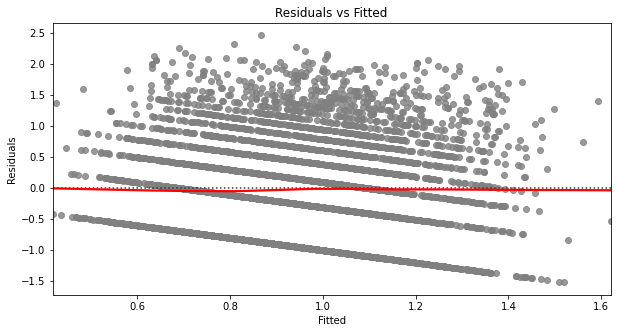

In [1331]:
fig, ax = plt.subplots(figsize=(10,5))
sns.residplot(x=mod2.fittedvalues, y=mod2.resid, color='grey', line_kws=dict(color="r"), lowess=True) #lowess mostra a linha azul em torno da pontilhada
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

* #### Exogeneidade - as variáveis independentes numéricas não estão correlacionadas com o termo de erro (Residuo)

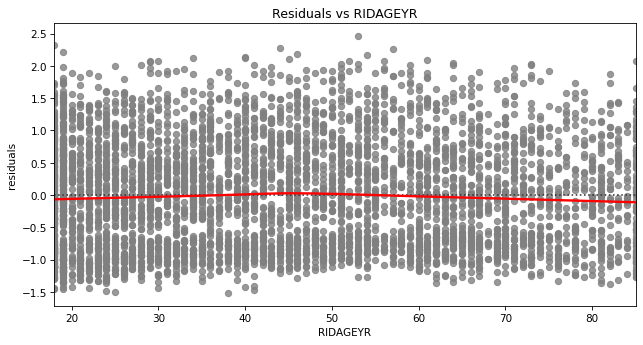

In [1333]:
data = df_ols.copy()
data['residuals'] = mod2.resid
fig, ax = plt.subplots(1, 1, figsize=(10,5),dpi=75)
sns.residplot(data=data, x='RIDAGEYR', y='residuals', color='grey', line_kws=dict(color="r"), lowess=True)
ax.title.set_text('Residuals vs RIDAGEYR')

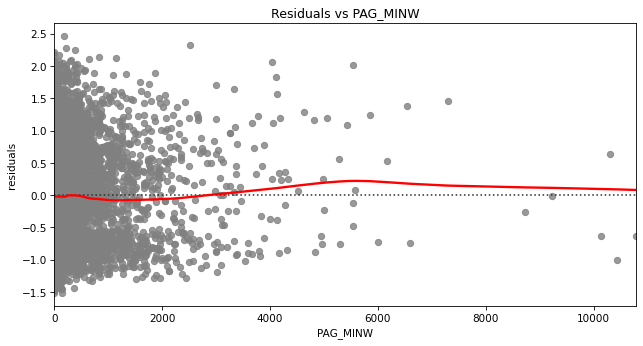

In [1334]:
data = df_ols.copy()
data['residuals'] = mod2.resid
fig, ax = plt.subplots(1, 1, figsize=(10,5),dpi=75)
sns.residplot(data=data, x='PAG_MINW', y='residuals', color='grey', line_kws=dict(color="r"), lowess=True)
ax.title.set_text('Residuals vs PAG_MINW')

* #### As observações do termo de erro não são correlacionadas entre si (autocorrelação de residuos)
* Durbin-Watson

In [1335]:
from statsmodels.stats.stattools import durbin_watson

<AxesSubplot:>

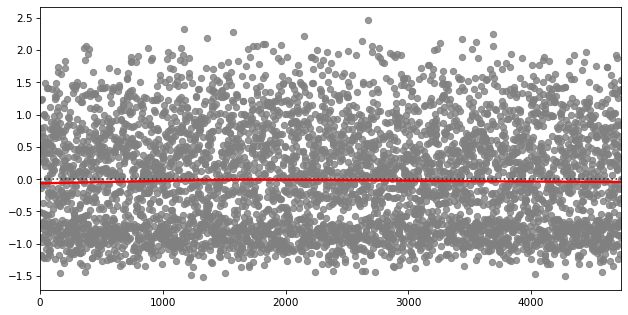

In [1337]:
fig, ax = plt.subplots(1, 1, figsize=(10,5),dpi=75)
sns.residplot(x=mod2.resid.index, y=mod2.resid, color='grey', line_kws=dict(color="r"), lowess=True)

* Como testamos se os resíduos são verdadeiramente não correlacionados?

* No resumo dos resultados da regressão linear, na parte inferior do resumo havia uma linha para o teste de Durbin-Watson. 
* A estatística Durbin-Watson é um teste direto da correlação dos resíduos. Assume um valor de 0 a 4, onde:
    * 2 significa sem autocorrelação.

    * 0 a 2 significa autocorrelação positiva.

    * 2 a 4 significa autocorrelação negativa.

* Como regra geral, valores na faixa de 1,5 a 2,5 são relativamente normais.

In [1339]:
durbin_watson(mod2.resid, axis=0).round(2)

1.98

* O nosso teste Durbin-Watson: 1.98, muito próximo ao valor 2, mostrando que os residuos não estão correlacionados.

* ####  O termo de erro é normalmente distribuído (opcional) - Resíduos tem distribuição normal?


* Kolmogorov-Smirnoff or Jarque-Bera tests
* Histogram of residuals
* QQ-plot

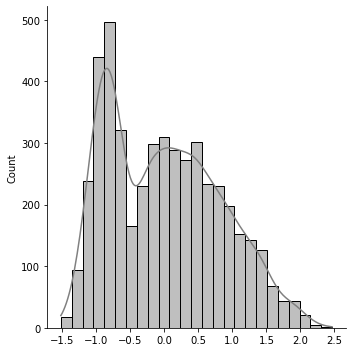

In [1343]:
sns.displot(mod2.resid, color='grey', kde=True)

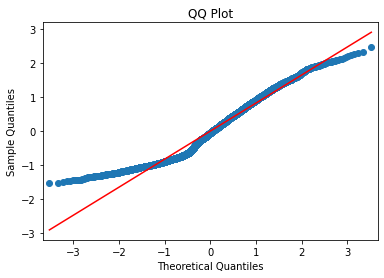

In [1346]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(mod2.resid).qqplot(line='s', ax=ax)
ax.title.set_text('QQ Plot')

* Teste de hipóteses Jarque-Bera e Kolmogorov Smirnoff
    * H0 : distribuição é normal
    * Ha : distribuição não é normal
    * alpha : 0.05

In [1345]:
sms.jarque_bera(mod2.resid)[1]

5.185759402301377e-52

In [1347]:
from scipy import stats
stats.kstest(mod2.resid , 'norm')

KstestResult(statistic=0.0923999070830207, pvalue=1.2031338507316361e-35)

* Em ambos os testes, Kolmogorov Smirnoff e Jarque-Bera, obtivemos o p-valor < 0,05. Isso significa que podemos rejeitar a hipótese nula de que os resíduos são normalmente distribuídos.
* Os gráficos também comprovam a hipótese.
* OLS não exige que o termo de erro siga uma distribuição normal. No entanto, satisfazer essa suposição permite que você realize testes de hipótese (analisar o p-valor) e gerar intervalos de confiança e intervalos de previsão confiáveis.

In [1348]:
print(mod2.summary())

                                OLS Regression Results                               
Dep. Variable:     log_DPQ_TOTAL_SCORE_plus1   R-squared:                       0.055
Model:                                   OLS   Adj. R-squared:                  0.049
Method:                        Least Squares   F-statistic:                     8.897
Date:                       Tue, 13 Feb 2024   Prob (F-statistic):           1.02e-39
Time:                               00:26:52   Log-Likelihood:                -5791.3
No. Observations:                       4737   AIC:                         1.165e+04
Df Residuals:                           4705   BIC:                         1.185e+04
Df Model:                                 31                                         
Covariance Type:                   nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

* Alguns pontos a serem destacados:
    * Quanto maior a idade menor o DPQ_TOTAL_SCORE.
    * Quanto mais atividade física (PAG_MINW), menor o DPQ_TOTAL_SCORE, porém o p-valor obtido (0.395) não é significativo (diferença não é significativa).
    * Mulheres tem o DPQ_TOTAL_SCORE 0.2167 maior que os homens.
    * A etnia mexicano_americano tem o DPQ_TOTAL_SCORE 0.1199 maior que as outras etnias.
    * A etnia negro_nao_hispanico tem o DPQ_TOTAL_SCORE 0.2066 maior que as outras etnias.
    * A escolaridade superior_completo_ou_maior tem o DPQ_TOTAL_SCORE 0.0948 menor que as outras escolaridades.
    * A faixa de renda 5000_9999 tem o DPQ_TOTAL_SCORE 0.1804 maior que as outras faixas.
    * A faixa de renda 55000_64999 tem o DPQ_TOTAL_SCORE 0.1904 menor que as outras faixas.
    * A faixa de renda maior_ou_igual_a_75000 tem o DPQ_TOTAL_SCORE 0.1791 menor que as outras faixas.
    * A pessoa que tem baixa atividade física semanal, tem o DPQ_TOTAL_SCORE 0.1170 maior que os outros grupos de atividade.
    * Com relação aos grupo de alimentação saudável, nenhum obteve um p-valor significativo.
    

* Vamos criar um novo modelo utilizando somente as variáveis independentes cujo p-valor foi menor que 0.05, ou seja significativo.

In [1392]:
dict_ols = {i : v for i, v in mod2.pvalues.round(3).items() if v < 0.05}

In [1393]:
dict_ols

{'Intercept': 0.0,
 'RIDAGEYR': 0.0,
 'genero_Feminino': 0.0,
 'etnia_mexicano_americano': 0.001,
 'etnia_negro_nao_hispanico': 0.005,
 'escolaridade_superior_completo_ou_maior': 0.035,
 'renda_5000_9999': 0.03,
 'renda_55000_64999': 0.021,
 'renda_maior_ou_igual_a_75000': 0.013,
 'atividade_fisica_baixo': 0.0}

In [1394]:
formula = 'log_DPQ_TOTAL_SCORE_plus1 ~ ' + ' + '.join(k for k, v in dict_ols.items() if k != 'Intercept')
formula   

'log_DPQ_TOTAL_SCORE_plus1 ~ RIDAGEYR + genero_Feminino + etnia_mexicano_americano + etnia_negro_nao_hispanico + escolaridade_superior_completo_ou_maior + renda_5000_9999 + renda_55000_64999 + renda_maior_ou_igual_a_75000 + atividade_fisica_baixo'

In [1395]:
# Modelo com as variaveis independentes p-valor < 0,05 
mod3 = smf.ols(formula, data = df_ols).fit()
print(mod3.summary())

                                OLS Regression Results                               
Dep. Variable:     log_DPQ_TOTAL_SCORE_plus1   R-squared:                       0.043
Model:                                   OLS   Adj. R-squared:                  0.041
Method:                        Least Squares   F-statistic:                     23.59
Date:                       Tue, 13 Feb 2024   Prob (F-statistic):           7.50e-40
Time:                               13:43:55   Log-Likelihood:                -5822.1
No. Observations:                       4737   AIC:                         1.166e+04
Df Residuals:                           4727   BIC:                         1.173e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

* #### Avaliando a variável mais importante

In [1385]:
from sklearn.preprocessing import StandardScaler
 

X1 = df_ols[['RIDAGEYR','genero_Feminino','etnia_mexicano_americano','etnia_negro_nao_hispanico','escolaridade_superior_completo_ou_maior','renda_5000_9999','renda_55000_64999','renda_maior_ou_igual_a_75000','atividade_fisica_baixo']]

# Inicializar o scaler
scaler = StandardScaler()

# fitar o modelo de scaler
X_transf = scaler.fit_transform(X1)

df_transform = pd.DataFrame(X_transf, columns = X1.columns)

# juntar com o fev
df_transform["log_DPQ_TOTAL_SCORE_plus1"] = df_ols["log_DPQ_TOTAL_SCORE_plus1"]

In [1386]:
df_transform.head()

,RIDAGEYR,genero_Feminino,etnia_mexicano_americano,etnia_negro_nao_hispanico,escolaridade_superior_completo_ou_maior,renda_5000_9999,renda_55000_64999,renda_maior_ou_igual_a_75000,atividade_fisica_baixo,log_DPQ_TOTAL_SCORE_plus1
0,-0.042478,0.963307,-0.970254,-0.177065,-0.472651,-0.236043,-0.244885,1.966837,-0.850027,0.000000
1,1.267406,-1.038090,1.030658,-0.177065,2.115727,-0.236043,-0.244885,1.966837,-0.850027,0.000000
2,1.418547,-1.038090,1.030658,-0.177065,-0.472651,-0.236043,-0.244885,-0.508431,-0.850027,0.000000
3,-1.352362,0.963307,-0.970254,5.647640,-0.472651,-0.236043,-0.244885,1.966837,-0.850027,1.609438
4,-1.301982,-1.038090,1.030658,-0.177065,-0.472651,-0.236043,-0.244885,1.966837,-0.850027,1.945910


In [1387]:
formula

'log_DPQ_TOTAL_SCORE_plus1 ~ RIDAGEYR + genero_Feminino + etnia_mexicano_americano + etnia_negro_nao_hispanico + escolaridade_superior_completo_ou_maior + renda_5000_9999 + renda_55000_64999 + renda_maior_ou_igual_a_75000 + atividade_fisica_baixo'

In [1388]:
# modelo com as variáveis que passaram pelo processo de scaling.
mod4 = smf.ols(formula, data = df_transform).fit()
print(mod4.summary())

                                OLS Regression Results                               
Dep. Variable:     log_DPQ_TOTAL_SCORE_plus1   R-squared:                       0.043
Model:                                   OLS   Adj. R-squared:                  0.041
Method:                        Least Squares   F-statistic:                     23.59
Date:                       Tue, 13 Feb 2024   Prob (F-statistic):           7.50e-40
Time:                               13:39:40   Log-Likelihood:                -5822.1
No. Observations:                       4737   AIC:                         1.166e+04
Df Residuals:                           4727   BIC:                         1.173e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

* Podemos observar que o gênero feminino é o que mais influencia o DPQ_TOTAL_SCORE, seguido da baixa atividade física semanal, idade e renda maior ou igual a 75.000 anuais, respectivamente.

* ### Perguntas a serem respondidas
    * **Qual o perﬁl de indivíduos (adultos maiores de 18 anos) com  sintomas depressivos nos EUA no período de 2005-2006?**
        * Neste estudo pudemos destacar alguns pontos:
        * Pessoas com mais idade, apresentaram um valor menor do DPQ_TOTAL_SCORE.
        * As mulheres apresentaram um valor maior do DPQ_TOTAL_SCORE em relação aos homens.
        * Negros não-hispânicos foi a etnia que apresentou o maior valor do DPQ_TOTAL_SCORE em relação as outras etnias.
        * Pessoas com escolaridade nível Superior completo ou maior, apresentaram valores menores do DPQ_TOTAL_SCORE em relação aos outros níveis.
        * Pessoas com renda entre 5.000,00 a 9.999,00 tem um valor do DPQ_TOTAL_SCORE maior do que as pessoas com a renda maior ou igual a 75.000,00 e renda entre 55.000,00 a 64.999,00, sendo esta última, com o menor valor do DPQ_TOTAL_SCORE apresentado.
        * Em resumo
          * Pessoas mais jovens.
          * Gênero feminino.
          * Etnia Negro não-hispânico ou Mexicano-americano.
          * Escolaridade inferior a Superior completo ou maior.
          * Renda entre 5.000,00 a 9.999,00 anuais.              
    * **Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?**
        * Com relação ao índice de alimentação saudável, cujo escore total podia variar entre 0 a 100, sendo estes valores, divididos em grupos de A a F, sendo A com melhores escores, podemos concluir que nenhum dos grupos apresentou uma diferença significativa nos valores do DPQ_TOTAL_SCORE.
        * Pessoas classificadas com baixa atividade física aeróbica semanal (< 150 min/semana), apresentaram um valor do DPQ_TOTAL_SCORE maior do que as pessoas classificadas entre outros grupos adequado (150-300 min/semana) e acima (> 300 min/semana).            
    * **Pontos a serem destacados**
        * Entre idade e índice de alimentação saúdavel, existe uma correlação positiva significativa, ou seja, maior a idade, melhor o score de alimentação. Já entre idade e tempo semanal de atividade física, a correlação é negativa, quanto mais velho, menor o tempo gasto com exercícios físicos.
        * Os testes não mostraram uma correlação significativa entre tempo de atividade física e alimentação saudável.
        * De modo geral os resultados dos testes de associação entre as diversas variáveis categóricas se mostraram significativos, porém apresentaram um tamanho do efeito observado muito pequeno.
        * Utilizando a regressão para inferência, detectamos que entre todos fatores significativos associados ao DPQ_TOTAL_SCORE, o gênero feminino foi o que apresentou maior relevância. As mulheres são maioria nas categorias sintomas moderados a severos e sintomas leves.
        * Pessoas de outros grupos de etnia, escolaridade, renda, atividade física e alimentação saudável, não citados no perfil, também apresentaram relação com os valores do DPQ_TOTAL_SCORE, porém o p-valor obtido nesses casos não foi significativo (p-valor > 0,05). 
        
        
    * **Limitações**
       * É importante mencionar que as análises de dados podem identificar associações entre diferentes variáveis, entretanto, podem não determinar relações de causa e efeito. Devemos considerar outras pesquisas para determinar se realmente uma variável tem efeito sobre a outra.
       * Os resultados dessa análise são específicos do contexto em que foram coletados e podem não ser generalizáveis para outras populações.
       * Auto-relato dos participantes para identificar a depressão, o que pode levar a subnotificação.
       * A subnotificação por problemas como estigma social, falta de conecimento sobre a doença ou dificuldade de acesso aos serviços de saúde.
       * A falta de fatores como pobreza, desigualdade social, violência, pode levar a uma compreensão incompleta.
       * A análise sobre índices de depressão é complexa e exige conhecimento técnico específico.
       
    * **Outras informações adicionais**
       * Fatores de risco : Histórico familar, traumas de infância, eventos de vida estressantes.
       * Comorbidades: Doenças físicas ou presença de outros transtornos mentais, como ansiedade e abuso de substâncias.
    * **Melhorias**
        * No contexto da análise, considerar fatores sociais, ambientais e culturais.
        * Buscar outras fontes de dados para aumentar a confiabilidade da análise e resultados.
        * Criar medidas para redução da subnotificação, incluindo campanhas de conscientização e educação sobrea doença.
        * Combater o estigma social para que as pessoas se sintam mais confortáveis na busca de ajuda.
        


Esta análise foi realizada sobre o contexto de indivíduos adultos, maiores de 18 anos, com sintomas depressivos no EUA no périodo de 2005 a 2006, baseado em dados demográficos, estilo de vida e sintomas depressivos. Apesar das limitações descritas, é uma ferramenta poderosa para compreensão, prevenção e tratamento, sendo importante a realização de forma ética e profissional.